#◊§◊ô◊™◊ï◊ó ◊û◊ï◊ì◊ú ◊ú◊ó◊ô◊ñ◊ï◊ô ◊°◊ô◊õ◊ï◊ô◊ô ◊î◊¢◊ñ◊ô◊ë◊î ◊©◊ú ◊¢◊ï◊ë◊ì◊ô◊ù ◊ë◊û◊ï◊ß◊ì◊ô ◊©◊ô◊®◊ï◊™ ◊ò◊ú◊§◊ï◊†◊ô◊ô◊ù ◊ë◊ô◊©◊®◊ê◊ú

# Project Notebook: Survival Analysis (Cox Regression) for Employee Attrition Prediction in Call Centers

# **◊î◊®◊¶◊™ ◊î◊™◊§◊ú◊í◊ï◊™ ◊¢◊ë◊ï◊® ◊õ◊ú◊ú ◊î◊û◊©◊™◊†◊ô◊ù**

In [1]:
#[1]
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ◊ß◊®◊ô◊ê◊™ ◊î◊ß◊ï◊ë◊•
file_path = "/content/DATA.xlsx"
df = pd.read_excel(file_path, sheet_name="data")

# ◊û◊©◊™◊†◊î ◊°◊ò◊ò◊ï◊°
status_col = "status"   # 0=Active, 1=Resigned
TENURE_COL = "time_in_company"

# ◊™◊ô◊ß◊ô◊ô◊™ ◊§◊ú◊ò
OUT_DIR = Path("/content/eda_charts")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ◊¶◊ë◊¢◊ô◊ù ◊ß◊ë◊ï◊¢◊ô◊ù (Active=◊™◊õ◊ú◊™, Resigned=◊ï◊®◊ï◊ì)
status_colors = {0: 'skyblue', 1: 'salmon'}

# ------------------------
# ◊®◊©◊ô◊û◊™ ◊û◊©◊™◊†◊ô◊ù ◊©◊î◊ù ◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù "◊ú◊ï◊í◊ô◊™"
forced_categorical = [
    "resignation_year",
    "resignation_month",
    "resignation_reason",
    'avg_annual_vacation_increase',
    'avg_annual_sick_increase',
    "family_status",
    'gender',
    "children",
    "call_center",
    "Team_size"
]

# ◊ß◊ë◊ô◊¢◊™ ◊û◊©◊™◊†◊ô◊ù ◊ú◊§◊ô ◊ú◊ï◊í◊ô◊ß◊î
categorical_vars = [c for c in df.columns if c in forced_categorical]
continuous_vars = [c for c in df.columns if c not in categorical_vars + [status_col]]

# ---------- 1) ◊û◊©◊™◊†◊ô◊ù ◊®◊¶◊ô◊§◊ô◊ù ----------
for col in continuous_vars:
    plt.figure(figsize=(8,4))
    for s in [0,1]:
        sns.kdeplot(
            df.loc[df[status_col]==s, col].dropna(),
            label=f"{'Active' if s==0 else 'Resigned'} ({s})",
            color=status_colors[s],
            fill=True,
            alpha=0.5
        )
    plt.title(f"Distribution of {col} by Employee Status")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.savefig(OUT_DIR / f"{col}_distribution.png")
    plt.close()

# ---------- 2) ◊û◊©◊™◊†◊ô◊ù ◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù ----------
for col in categorical_vars:
    plt.figure(figsize=(8,4))
    ax = sns.countplot(
        data=df, x=col, hue=status_col,
        palette=[status_colors[0], status_colors[1]],
        dodge=True
    )
    ax.set_title(f"Distribution of {col} by Employee Status")
    ax.set_xlabel(f"{col} (coded values)")
    ax.set_ylabel("Number of Employees")
    plt.xticks(rotation=30, ha="right")

    # ◊î◊ï◊°◊§◊™ ◊¢◊®◊õ◊ô◊ù ◊û◊¢◊ú ◊õ◊ú ◊¢◊û◊ï◊ì◊î
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color='black', rotation=0)

    plt.legend(title="Status", labels=["Active (0)", "Resigned (1)"])
    plt.tight_layout()
    plt.savefig(OUT_DIR / f"{col}_distribution.png")
    plt.close()

print(f"‚úì ◊í◊®◊§◊ô◊ù ◊†◊©◊û◊®◊ï ◊ë◊™◊ô◊ß◊ô◊ô◊î: {OUT_DIR}")


‚úì ◊í◊®◊§◊ô◊ù ◊†◊©◊û◊®◊ï ◊ë◊™◊ô◊ß◊ô◊ô◊î: /content/eda_charts


In [2]:
#[2]
import pandas as pd
from pandas.api.types import (
    is_numeric_dtype, is_datetime64_any_dtype,
    is_categorical_dtype, is_string_dtype, is_bool_dtype
)

def summarize_ranges(df: pd.DataFrame, top_levels: int = 5) -> pd.DataFrame:
    rows = []
    for col in df.columns:
        x = df[col]
        dtype = str(x.dtype)
        n_total = len(x)
        n_missing = int(x.isna().sum())
        n_unique = int(x.nunique(dropna=True))

        if is_numeric_dtype(x):
            min_val = x.min(skipna=True)
            max_val = x.max(skipna=True)
            range_width = (max_val - min_val) if pd.notna(min_val) and pd.notna(max_val) else pd.NA
            rows.append({
                'variable': col, 'dtype': dtype,
                'n_missing': n_missing, 'n_unique': n_unique,
                'min': min_val, 'max': max_val, 'range_width': range_width,
                'example_levels': pd.NA
            })
        elif is_datetime64_any_dtype(x):
            min_val = x.min(skipna=True)
            max_val = x.max(skipna=True)
            rows.append({
                'variable': col, 'dtype': dtype,
                'n_missing': n_missing, 'n_unique': n_unique,
                'min': str(min_val) if pd.notna(min_val) else pd.NA,
                'max': str(max_val) if pd.notna(max_val) else pd.NA,
                'range_width': pd.NA, 'example_levels': pd.NA
            })
        else:
            # ◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô/◊û◊ó◊®◊ï◊ñ◊™/◊ë◊ï◊ú◊ô◊ê◊†◊ô ‚Äì ◊ê◊ô◊ü "◊ò◊ï◊ï◊ó", ◊†◊¶◊ô◊í ◊®◊û◊ï◊™
            vals = x.dropna().astype(str).unique()
            example = ", ".join(sorted(vals)[:top_levels]) if len(vals) > 0 else ""
            rows.append({
                'variable': col, 'dtype': dtype,
                'n_missing': n_missing, 'n_unique': n_unique,
                'min': pd.NA, 'max': pd.NA, 'range_width': pd.NA,
                'example_levels': example
            })
    return pd.DataFrame(rows).sort_values('variable').reset_index(drop=True)

ranges_all = summarize_ranges(df, top_levels=5)
ranges_all


variable    dtype  n_missing  n_unique  \
0                            Team_size    int64          0         5   
1                                  age    int64          0        40   
2            answered_calls_center_avg  float64        462         7   
3          answered_calls_employee_avg  float64        462      1265   
4   answered_calls_employee_avg_3month  float64        462      1187   
5             avg_annual_sick_increase    int64          0         2   
6         avg_annual_vacation_increase    int64          0         2   
7                            bonus_avg  float64          0      1496   
8                          call_center    int64          0         7   
9             call_duration_center_avg  float64        462         7   
10          call_duration_employee_avg  float64        462      1289   
11   call_duration_employee_avg_3month  float64        462      1289   
12            calls_perhour_center_avg  float64        462         7   
13          calls_perhour_employee_avg  float64        462      1278   
14   calls_perhour_employee_avg_3month  float64        462      1258   
15                            children    int64          0         2   
16                       family_status    int64          0         2   
17                              gender    int64          0         2   
18                                  id    int64          0      1751   
19                   part_time_percent  float64          0       758   
20                    pause_center_avg  float64        462         7   
21           pause_center_employee_avg  float64        462      1289   
22    pause_center_employee_avg_3month  float64        462      1286   
23                   resignation_month  float64        412        12   
24                  resignation_reason  float64        412         6   
25                    resignation_year  float64        412         8   
26                     salary_per_hour  float64          0       104   
27                              status    int64          0         2   
28                     time_in_company  float64          0       746   

            min          max  range_width example_levels  
0      1.000000     5.000000     4.000000           <NA>  
1     17.000000    61.000000    44.000000           <NA>  
2    238.473627   648.606518   410.132891           <NA>  
3     27.000000  1358.000000  1331.000000           <NA>  
4      1.000000  1581.666667  1580.666667           <NA>  
5      0.000000     1.000000     1.000000           <NA>  
6      0.000000     1.000000     1.000000           <NA>  
7      0.000000  5780.630000  5780.630000           <NA>  
8      1.000000     7.000000     6.000000           <NA>  
9      6.167656   428.641919   422.474263           <NA>  
10     1.045959  4245.774025  4244.728065           <NA>  
11     0.169552  1884.550700  1884.381148           <NA>  
12     6.773708   773.670273   766.896565           <NA>  
13     1.000000  1869.333333  1868.333333           <NA>  
14     1.000000  1948.000000  1947.000000           <NA>  
15     0.000000     1.000000     1.000000           <NA>  
16     0.000000     1.000000     1.000000           <NA>  
17     0.000000     1.000000     1.000000           <NA>  
18     1.000000  1822.000000  1821.000000           <NA>  
19     0.029800     1.769500     1.739700           <NA>  
20     0.087417     0.107413     0.019996           <NA>  
21     0.000000     0.539485     0.539485           <NA>  
22     0.000000     0.539485     0.539485           <NA>  
23     0.000000    11.000000    11.000000           <NA>  
24     0.000000     5.000000     5.000000           <NA>  
25  2017.000000  2024.000000     7.000000           <NA>  
26    28.490000    44.920000    16.430000           <NA>  
27     0.000000     1.000000     1.000000           <NA>  
28     3.000000   274.133333   271.133333           <NA>

# **◊ò◊¢◊ô◊†◊™ ◊°◊§◊®◊ô◊ï◊™ ◊ï◊ß◊ë◊¶◊ô◊ù ◊ï◊¢◊ô◊ë◊ï◊ì ◊°◊ò◊ò◊ô◊°◊ò◊ô ◊®◊ê◊©◊ï◊†◊ô**

In [3]:
# [4]
!pip -q install lifelines statsmodels plotly openpyxl scikit-learn
import warnings; warnings.filterwarnings("ignore")

# ◊ò◊¢◊ô◊†◊™ ◊°◊§◊®◊ô◊ï◊™
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import proportional_hazard_test
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ◊î◊í◊ì◊®◊ï◊™ ◊í◊®◊§◊ô◊ï◊™
plt.rcParams['font.family'] = 'Arial'
sns.set(style="whitegrid")

# ◊î◊í◊ì◊®◊ï◊™ ◊ß◊ï◊ë◊• ◊ï◊¢◊û◊ï◊ì◊ï◊™ ◊û◊®◊õ◊ñ◊ô◊ï◊™
file_path = "/content/DATA.xlsx"
TENURE_COL = 'time_in_company'
EVENT_COL = 'status'
ID_COL = 'id'

# ◊ß◊®◊ô◊ê◊™ ◊î◊†◊™◊ï◊†◊ô◊ù
df = pd.read_excel(file_path)

# ◊û◊ô◊ì◊¢ ◊õ◊ú◊ú◊ô
print("◊û◊ô◊ì◊¢ ◊õ◊ú◊ú◊ô:")
df.info()  # ‚Üê ◊î◊¶◊í◊î ◊†◊õ◊ï◊†◊î ◊©◊ú info()

# ◊°◊ò◊ò◊ô◊°◊ò◊ô◊ß◊ï◊™ ◊™◊ô◊ê◊ï◊®◊ô◊ï◊™
print("\n ◊°◊ò◊ò◊ô◊°◊ò◊ô◊ß◊ï◊™ ◊™◊ô◊ê◊ï◊®◊ô◊ï◊™:")
display(df.describe(include='all'))

# ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù
print("\n ◊û◊°◊§◊® ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ë◊õ◊ú ◊¢◊û◊ï◊ì◊î:")
missing_summary = df.isnull().sum().to_frame(name='Missing_Values')
missing_summary['% Missing'] = 100 * missing_summary['Missing_Values'] / len(df)
missing_summary = missing_summary[missing_summary['Missing_Values'] > 0]
display(missing_summary.sort_values(by='Missing_Values', ascending=False))

# ◊©◊ï◊†◊ï◊™ ◊©◊ú ◊û◊©◊™◊†◊ô◊ù ◊û◊°◊§◊®◊ô◊ô◊ù
print("\n ◊¢◊û◊ï◊ì◊ï◊™ ◊¢◊ù ◊©◊ï◊†◊ï◊™ ◊†◊û◊ï◊õ◊î (variance < 0.01):")
numeric_df = df.select_dtypes(include=[np.number])
variances = numeric_df.var().sort_values()
low_variance = variances[variances < 0.01]
display(low_variance)


◊û◊ô◊ì◊¢ ◊õ◊ú◊ú◊ô:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  1751 non-null   int64  
 1   status                              1751 non-null   int64  
 2   gender                              1751 non-null   int64  
 3   age                                 1751 non-null   int64  
 4   time_in_company                     1751 non-null   float64
 5   salary_per_hour                     1751 non-null   float64
 6   children                            1751 non-null   int64  
 7   call_center                         1751 non-null   int64  
 8   resignation_year                    1339 non-null   float64
 9   resignation_month                   1339 non-null   float64
 10  resignation_reason                  1339 non-null   float64
 11  family_status           

id       status       gender          age  time_in_company  \
count  1751.000000  1751.000000  1751.000000  1751.000000      1751.000000   
mean    935.478584     0.764706     0.872644    28.106225        17.429697   
std     519.404500     0.424304     0.333466     5.503155        21.722770   
min       1.000000     0.000000     0.000000    17.000000         3.000000   
25%     503.500000     1.000000     1.000000    24.000000         6.066667   
50%     944.000000     1.000000     1.000000    27.000000        11.200000   
75%    1382.500000     1.000000     1.000000    31.000000        21.000000   
max    1822.000000     1.000000     1.000000    61.000000       274.133333   

       salary_per_hour     children  call_center  resignation_year  \
count      1751.000000  1751.000000   1751.00000       1339.000000   
mean         30.808932     0.232439      4.88064       2021.105302   
std           1.888561     0.422508      1.88438          2.158543   
min          28.490000     0.000000      1.00000       2017.000000   
25%          29.120000     0.000000      3.00000       2019.000000   
50%          30.610000     0.000000      5.00000       2021.000000   
75%          32.300000     0.000000      7.00000       2023.000000   
max          44.920000     1.000000      7.00000       2024.000000   

       resignation_month  ...  calls_perhour_employee_avg_3month  \
count        1339.000000  ...                        1289.000000   
mean            5.893204  ...                         251.647513   
std             3.308923  ...                         374.621272   
min             0.000000  ...                           1.000000   
25%             3.000000  ...                           6.858042   
50%             6.000000  ...                           8.734123   
75%             9.000000  ...                         492.666667   
max            11.000000  ...                        1948.000000   

       pause_center_employee_avg_3month  answered_calls_employee_avg  \
count                       1289.000000                  1289.000000   
mean                           0.104060                   487.054593   
std                            0.024571                   204.620559   
min                            0.000000                    27.000000   
25%                            0.093684                   324.154313   
50%                            0.102858                   452.004859   
75%                            0.113524                   617.333333   
max                            0.539485                  1358.000000   

       call_duration_employee_avg  calls_perhour_employee_avg  \
count                 1289.000000                 1289.000000   
mean                   250.039622                  271.464259   
std                    226.190289                  383.024879   
min                      1.045959                    1.000000   
25%                      9.900751                    6.552478   
50%                    330.201507                    8.271026   
75%                    404.152686                  591.888889   
max                   4245.774025                 1869.333333   

       pause_center_employee_avg  answered_calls_center_avg  \
count                1289.000000                1289.000000   
mean                    0.101465                 511.183293   
std                     0.019141                 136.225828   
min                     0.000000                 238.473627   
25%                     0.093390                 362.430722   
50%                     0.100690                 610.129584   
75%                     0.109080                 633.161429   
max                     0.539485                 648.606518   

       call_duration_center_avg  calls_perhour_center_avg  pause_center_avg  
count               1289.000000               1289.000000       1289.000000  
mean                 240.777276                214.232382          0.101233  
std                  182.613222 


 ◊û◊°◊§◊® ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ë◊õ◊ú ◊¢◊û◊ï◊ì◊î:


Missing_Values  % Missing
calls_perhour_employee_avg_3month              462  26.384923
call_duration_employee_avg_3month              462  26.384923
answered_calls_employee_avg_3month             462  26.384923
pause_center_employee_avg_3month               462  26.384923
calls_perhour_employee_avg                     462  26.384923
call_duration_employee_avg                     462  26.384923
answered_calls_employee_avg                    462  26.384923
answered_calls_center_avg                      462  26.384923
call_duration_center_avg                       462  26.384923
calls_perhour_center_avg                       462  26.384923
pause_center_employee_avg                      462  26.384923
pause_center_avg                               462  26.384923
resignation_month                              412  23.529412
resignation_reason                             412  23.529412
resignation_year                               412  23.529412


 ◊¢◊û◊ï◊ì◊ï◊™ ◊¢◊ù ◊©◊ï◊†◊ï◊™ ◊†◊û◊ï◊õ◊î (variance < 0.01):


pause_center_avg                    0.000034
pause_center_employee_avg           0.000366
pause_center_employee_avg_3month    0.000604
dtype: float64

# **◊û◊î ◊î◊û◊©◊™◊†◊ô◊ù ◊©◊û◊©◊§◊ô◊¢◊ô◊ù ◊¢◊ú ◊¢◊ñ◊ô◊ë◊î - ◊™◊ó◊ß◊ô◊® ◊®◊ê◊©◊ï◊†◊ô**

◊ë◊ì◊ô◊ß◊™ ◊ê◊ô◊ñ◊ï◊ü ◊ë◊ì◊ê◊ò◊î - ◊†◊ô◊™◊ü ◊ú◊®◊ê◊ï◊™ ◊ó◊ï◊°◊® ◊ê◊ô◊ñ◊ï◊ü

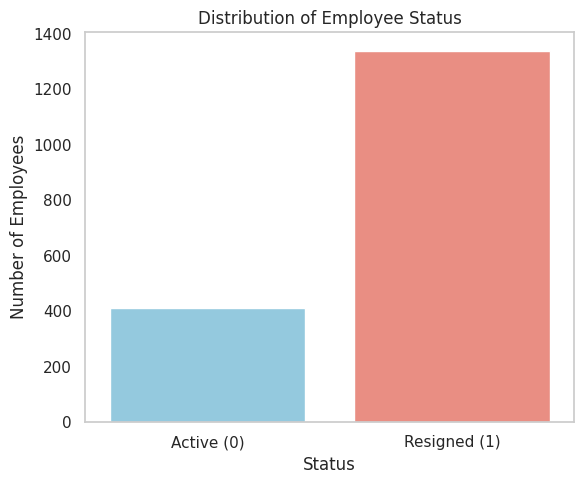

In [4]:
# [5]
status_counts = df['status'].value_counts().sort_index()
status_labels = ['Active (0)', 'Resigned (1)']

plt.figure(figsize=(6, 5))
sns.barplot(x=status_labels, y=status_counts.values, palette=['skyblue', 'salmon'])
plt.title("Distribution of Employee Status")
plt.ylabel("Number of Employees")
plt.xlabel("Status")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


◊î◊™◊§◊ú◊í◊ï◊™ ◊©◊ú ◊ï◊ï◊™◊ß ◊ë◊ê◊®◊í◊ï◊ü ‚Äì ◊¢◊ï◊ë◊ì◊ô◊ù ◊§◊¢◊ô◊ú◊ô◊ù ◊ê◊ú ◊û◊ï◊ú ◊¢◊ï◊ë◊ì◊ô◊ù ◊©◊¢◊ñ◊ë◊ï

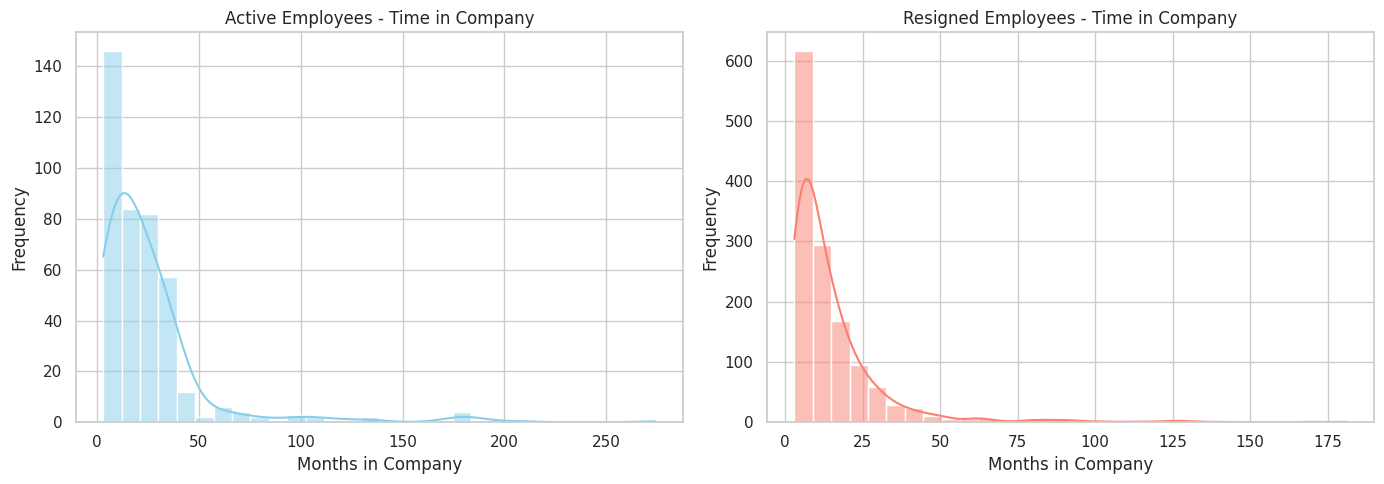

In [5]:
# [6]
# ◊§◊ô◊¶◊ï◊ú ◊ú◊§◊ô ◊°◊ò◊ò◊ï◊°
active = df[df['status'] == 0]
resigned = df[df['status'] == 1]

# ◊¶◊ô◊ï◊® ◊©◊†◊ô ◊í◊®◊§◊ô◊ù ◊ñ◊î ◊ú◊¶◊ì ◊ñ◊î
plt.figure(figsize=(14, 5))

# ◊í◊®◊£ ◊¢◊ë◊ï◊® ◊¢◊ï◊ë◊ì◊ô◊ù ◊§◊¢◊ô◊ú◊ô◊ù
plt.subplot(1, 2, 1)
sns.histplot(active['time_in_company'], bins=30, kde=True, color='skyblue')
plt.title('Active Employees - Time in Company')
plt.xlabel('Months in Company')
plt.ylabel('Frequency')

# ◊í◊®◊£ ◊¢◊ë◊ï◊® ◊¢◊ï◊ë◊ì◊ô◊ù ◊©◊¢◊ñ◊ë◊ï
plt.subplot(1, 2, 2)
sns.histplot(resigned['time_in_company'], bins=30, kde=True, color='salmon')
plt.title('Resigned Employees - Time in Company')
plt.xlabel('Months in Company')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


◊î◊í◊ì◊®◊ï◊™ ◊ë◊°◊ô◊°

In [6]:
# [7]
from lifelines import KaplanMeierFitter, NelsonAalenFitter
from scipy.stats import mannwhitneyu

TENURE_COL = 'time_in_company'   # ◊ó◊ï◊ì◊©◊ô◊ù ◊ë◊ê◊®◊í◊ï◊ü
EVENT_COL  = 'status'            # 1=◊¢◊ñ◊ë, 0=◊¢◊ì◊ô◊ô◊ü ◊û◊ï◊¢◊°◊ß

assert TENURE_COL in df.columns and EVENT_COL in df.columns, "◊ó◊°◊®◊î ◊ê◊ó◊™ ◊û◊¢◊û◊ï◊ì◊ï◊™ ◊î◊ñ◊û◊ü/◊°◊ò◊ò◊ï◊°"
df_km = df[[TENURE_COL, EVENT_COL]].dropna().copy()

# ◊†◊ß◊ï◊ì◊ï◊™ ◊ñ◊û◊ü ◊ú◊ì◊ô◊ï◊ï◊ó
report_times = [6, 12, 18, 24]  # ◊ó◊ï◊ì◊©◊ô◊ù


Kaplan‚ÄìMeier Survival at key times (◊¢◊ù ◊®◊ï◊ï◊ó◊ô ◊°◊û◊ö 95%)

Kaplan‚ÄìMeier Survival at key times (◊¢◊ù ◊®◊ï◊ï◊ó◊ô ◊°◊û◊ö 95%):


months   S(t)  S_lower  S_upper
0       6  0.780    0.759    0.799
1      12  0.539    0.515    0.563
2      18  0.374    0.350    0.398
3      24  0.282    0.259    0.305

Saved to: /content/km_S_at_6_12_24.xlsx


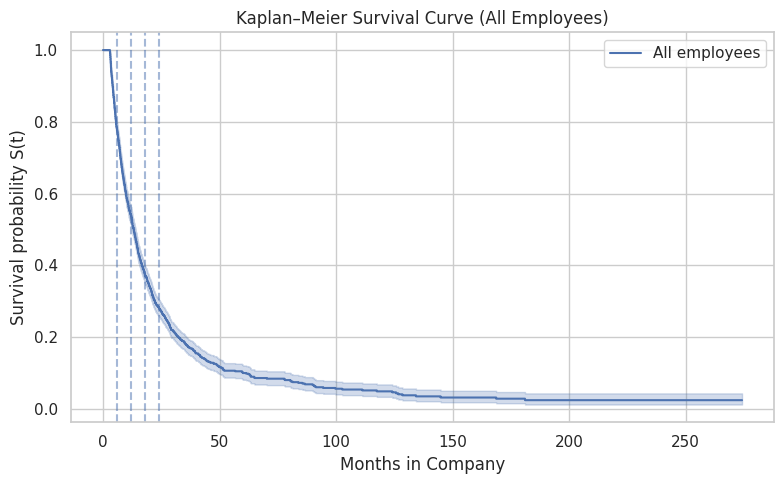

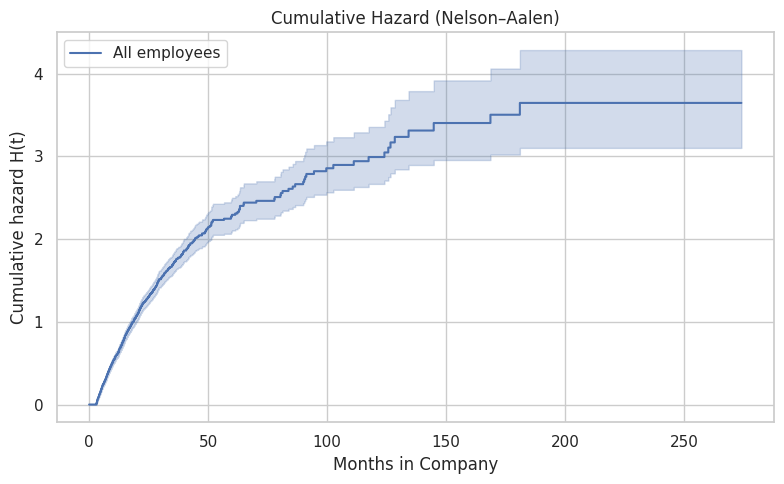

In [7]:
# [8]
from IPython.display import display
from lifelines import KaplanMeierFitter, NelsonAalenFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=df_km[TENURE_COL], event_observed=df_km[EVENT_COL], label="All employees")

# --- ◊¢◊ñ◊®: ◊®◊ï◊ï◊ó◊ô ◊°◊û◊ö ◊ë-Times ◊°◊§◊¶◊ô◊§◊ô◊ô◊ù (◊ú◊ú◊ê confidence_interval_at_times) ---
def km_ci_at_times(kmf_obj, times):
    times = list(times)
    sf = kmf_obj.survival_function_.iloc[:, 0]
    timeline = kmf_obj.survival_function_.index.values

    # ◊†◊°◊î ◊ú◊ê◊™◊® ◊ò◊ë◊ú◊™ CI ◊ú◊§◊ô ◊î◊í◊®◊°◊î
    ci_df = getattr(kmf_obj, "confidence_interval_", None)
    if ci_df is None:
        ci_df = getattr(kmf_obj, "confidence_interval_survival_function_", None)

    if ci_df is not None:
        lower_col = [c for c in ci_df.columns if "lower" in c][0]
        upper_col = [c for c in ci_df.columns if "upper" in c][0]

    rows = []
    for t in times:
        # ◊ß◊ó ◊ê◊™ ◊î◊¢◊®◊ö ◊î◊ê◊ó◊®◊ï◊ü ◊ë-timeline ◊©◊î◊ï◊ê <= t
        idx = np.searchsorted(timeline, t, side="right") - 1
        if idx < 0:  # ◊ú◊§◊†◊ô ◊™◊ó◊ô◊ú◊™ ◊î◊û◊¢◊ß◊ë
            s = 1.0
            lo = up = 1.0 if ci_df is not None else np.nan
        else:
            s = float(sf.iloc[idx])
            if ci_df is not None:
                lo = float(ci_df.iloc[idx][lower_col])
                up = float(ci_df.iloc[idx][upper_col])
            else:
                lo = up = np.nan
        rows.append({"months": t, "S(t)": s, "S_lower": lo, "S_upper": up})
    return pd.DataFrame(rows)

# Survival ◊ï◊®◊ï◊ï◊ó◊ô ◊°◊û◊ö ◊ë◊†◊ß◊ï◊ì◊ï◊™ ◊î◊ñ◊û◊ü
S_at = kmf.survival_function_at_times(report_times).rename("S(t)")
km_table = km_ci_at_times(kmf, report_times)

# ◊ê◊ù ◊™◊®◊¶◊ô ◊ú◊ê◊ó◊ì ◊ú◊ò◊ë◊ú◊î ◊ê◊ó◊™ ◊¢◊ù ◊î◊ê◊ô◊†◊ì◊ß◊° ◊©◊ú S_at:
km_table["S(t)"] = S_at.values

# ◊¢◊ô◊í◊ï◊ú ◊ï◊î◊¶◊í◊î
km_table = km_table[["months", "S(t)", "S_lower", "S_upper"]].round(3)
print("Kaplan‚ÄìMeier Survival at key times (◊¢◊ù ◊®◊ï◊ï◊ó◊ô ◊°◊û◊ö 95%):")
display(km_table)

# ◊©◊û◊ô◊®◊î ◊ú◊ß◊ï◊ë◊• (◊ú◊ì◊ï\"◊ó)
km_table.to_excel("/content/km_S_at_6_12_24.xlsx", index=False)
print("Saved to: /content/km_S_at_6_12_24.xlsx")

# ◊í◊®◊£ KM ◊¢◊ù ◊ß◊ï◊ï◊ô◊ù ◊ê◊†◊õ◊ô◊ô◊ù ◊ë◊†◊ß◊ï◊ì◊ï◊™ ◊î◊ì◊ô◊ï◊ï◊ó
plt.figure(figsize=(8,5))
kmf.plot(ci_show=True)
for t in report_times:
    plt.axvline(t, linestyle='--', alpha=0.5)
plt.title("Kaplan‚ÄìMeier Survival Curve (All Employees)")
plt.xlabel("Months in Company")
plt.ylabel("Survival probability S(t)")
plt.tight_layout()
plt.show()

# Hazard ◊û◊¶◊ò◊ë◊® (Nelson‚ÄìAalen)
naf = NelsonAalenFitter()
naf.fit(durations=df_km[TENURE_COL], event_observed=df_km[EVENT_COL], label="All employees")
plt.figure(figsize=(8,5))
naf.plot()
plt.title("Cumulative Hazard (Nelson‚ÄìAalen)")
plt.xlabel("Months in Company")
plt.ylabel("Cumulative hazard H(t)")
plt.tight_layout()
plt.show()


◊ë◊ì◊ô◊ß◊™ ◊û◊ï◊ë◊î◊ß◊ï◊™ ◊î◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊ï◊ï◊™◊ß ◊î◊¢◊ï◊ë◊ì ◊ë◊ê◊®◊í◊ï◊ü ◊ë◊ô◊ü ◊¢◊ï◊ñ◊ë◊ô◊ù ◊ú◊§◊¢◊ô◊ú◊ô◊ù

In [8]:
# [9]
tenure_active   = df.loc[df[EVENT_COL]==0, TENURE_COL].dropna()
tenure_resigned = df.loc[df[EVENT_COL]==1, TENURE_COL].dropna()

# Mann‚ÄìWhitney U (◊ì◊ï-◊ñ◊†◊ë◊ô)
U, p = mannwhitneyu(tenure_active, tenure_resigned, alternative='two-sided')

# Cliff's delta (◊í◊ï◊ì◊ú ◊ê◊§◊ß◊ò) ◊û◊™◊ï◊ö U
n1, n2 = len(tenure_active), len(tenure_resigned)
delta = (2*U/(n1*n2)) - 1

def cliff_label(d):
    ad = abs(d)
    if ad < 0.147: return "◊ñ◊†◊ô◊ó"
    if ad < 0.33:  return "◊ß◊ò◊ü"
    if ad < 0.474: return "◊ë◊ô◊†◊ï◊†◊ô"
    return "◊í◊ì◊ï◊ú"

print("◊î◊ë◊ì◊ú◊ô ◊ï◊™◊ß ◊ë◊ô◊ü ◊§◊¢◊ô◊ú◊ô◊ù (status=0) ◊ú◊¢◊ï◊ñ◊ë◊ô◊ù (status=1)")
print(f"n_active={n1}, n_resigned={n2}")
print(f"Mann‚ÄìWhitney U={U:,.0f}, p-value={p:.3e}")
print(f"Cliff's delta={delta:.3f}  ‚Üí  ◊í◊ï◊ì◊ú ◊ê◊§◊ß◊ò: {cliff_label(delta)}")

# ◊°◊ô◊õ◊ï◊ù ◊™◊ô◊ê◊ï◊®◊ô ◊ß◊¶◊® (◊ú◊ì◊ï◊¥◊ó)
summary = pd.DataFrame({
    "Group": ["Active (0)", "Resigned (1)"],
    "N": [n1, n2],
    "Median tenure": [np.median(tenure_active), np.median(tenure_resigned)],
    "Mean tenure": [np.mean(tenure_active), np.mean(tenure_resigned)]
})
summary["Median tenure"] = summary["Median tenure"].round(2)
summary["Mean tenure"]   = summary["Mean tenure"].round(2)
display(summary)
summary.to_excel("/content/tenure_by_status_summary.xlsx", index=False)
print("Saved to: /content/tenure_by_status_summary.xlsx")


◊î◊ë◊ì◊ú◊ô ◊ï◊™◊ß ◊ë◊ô◊ü ◊§◊¢◊ô◊ú◊ô◊ù (status=0) ◊ú◊¢◊ï◊ñ◊ë◊ô◊ù (status=1)
n_active=412, n_resigned=1339
Mann‚ÄìWhitney U=363,298, p-value=1.926e-22
Cliff's delta=0.317  ‚Üí  ◊í◊ï◊ì◊ú ◊ê◊§◊ß◊ò: ◊ß◊ò◊ü


Group     N  Median tenure  Mean tenure
0    Active (0)   412          16.98        25.38
1  Resigned (1)  1339           9.83        14.98

Saved to: /content/tenure_by_status_summary.xlsx


◊¢◊ß◊ï◊û◊™ ◊ê◊ß◊°-◊§◊ï◊°◊ò ◊ú◊§◊ô ◊§◊ô◊ú◊ï◊ó ◊ï◊™◊ß

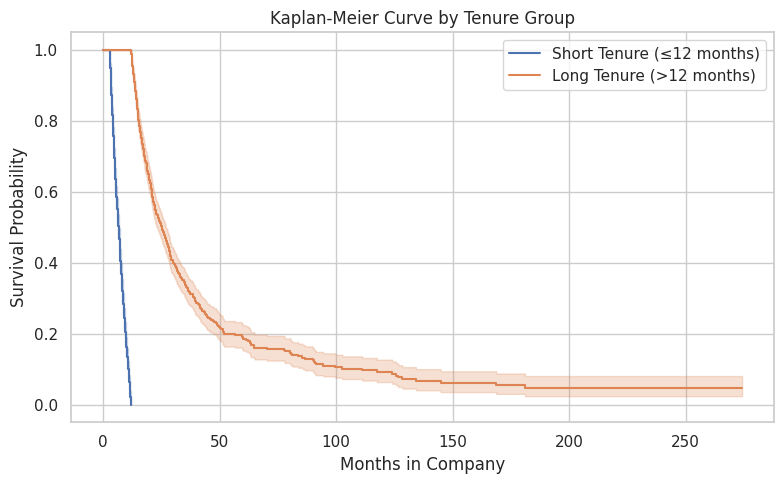

In [9]:
# [10]
# ◊ô◊¶◊ô◊®◊™ ◊¢◊ï◊™◊ß ◊¢◊ù ◊¢◊û◊ï◊ì◊™ ◊§◊ô◊ú◊ï◊ó ◊ú◊ï◊ï◊™◊ß
df['tenure_group'] = df['time_in_company'].apply(lambda x: 'Short Tenure (‚â§12 months)' if x <= 12 else 'Long Tenure (>12 months)')

# ◊ê◊™◊ó◊ï◊ú ◊ê◊ï◊ë◊ô◊ô◊ß◊ò KaplanMeierFitter
kmf = KaplanMeierFitter()

# ◊¶◊ô◊ï◊® ◊í◊®◊£
plt.figure(figsize=(8, 5))

for group in df['tenure_group'].unique():
    mask = df['tenure_group'] == group
    kmf.fit(durations=df[mask]['time_in_company'],
            event_observed=df[mask]['status'],
            label=group)
    kmf.plot(ci_show=True)  # ◊¢◊ù ◊®◊¶◊ï◊¢◊ï◊™ ◊ê◊û◊ï◊ü

plt.title("Kaplan-Meier Curve by Tenure Group")
plt.xlabel("Months in Company")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.tight_layout()
plt.show()


◊ë◊ì◊ô◊ß◊™  ◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊ï◊ï◊™◊ß ◊ë◊ê◊®◊í◊ï◊ü ◊ë◊ô◊ü ◊§◊¢◊ô◊ú◊ô◊ù ◊ú◊¢◊ï◊ñ◊ë◊ô◊ù

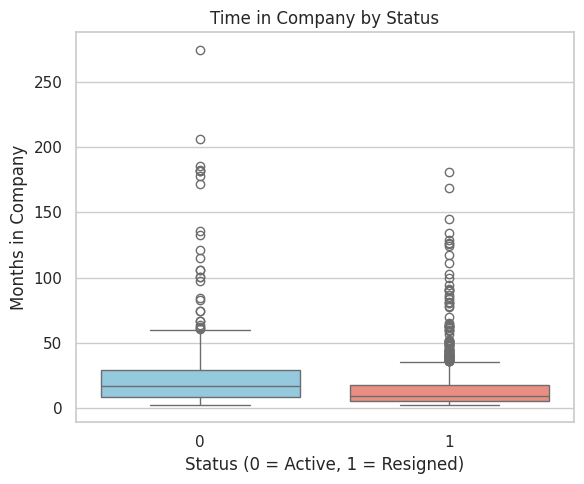

In [10]:
# [11]
plt.figure(figsize=(6, 5))
sns.boxplot(x='status', y='time_in_company', data=df, palette=['skyblue', 'salmon'])
plt.title('Time in Company by Status')
plt.xlabel('Status (0 = Active, 1 = Resigned)')
plt.ylabel('Months in Company')
plt.tight_layout()
plt.show()

◊ë◊ì◊ô◊ß◊™ ◊û◊ï◊ë◊î◊ß◊ï◊™ ◊ú◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊ï◊ï◊™◊ß ◊ë◊ô◊ü ◊§◊¢◊ô◊ú◊ô◊ù ◊ú◊¢◊ï◊ñ◊ë◊ô◊ù

In [11]:
#[12]
from scipy.stats import mannwhitneyu
import numpy as np
import pandas as pd

# ◊§◊ô◊ú◊ï◊ó ◊ú◊§◊ô ◊°◊ò◊ò◊ï◊°
active = df[df['status'] == 0]['time_in_company'].dropna()
resigned = df[df['status'] == 1]['time_in_company'].dropna()

# ◊û◊ë◊ó◊ü Mann‚ÄìWhitney
stat, p_value = mannwhitneyu(active, resigned, alternative='two-sided')

# Cliff's delta
n1, n2 = len(active), len(resigned)
delta = (2*stat/(n1*n2)) - 1

def cliff_label(d):
    ad = abs(d)
    if ad < 0.147: return "◊ñ◊†◊ô◊ó"
    if ad < 0.33:  return "◊ß◊ò◊ü"
    if ad < 0.474: return "◊ë◊ô◊†◊ï◊†◊ô"
    return "◊í◊ì◊ï◊ú"

print("Mann-Whitney U test:")
print(f"U-statistic = {stat:.2f}")
print(f"p-value = {p_value:.4f}")
print(f"Cliff's delta = {delta:.3f}  ‚Üí  ◊í◊ï◊ì◊ú ◊ê◊§◊ß◊ò: {cliff_label(delta)}")

# ◊ò◊ë◊ú◊î ◊™◊ô◊ê◊ï◊®◊ô◊™
summary = pd.DataFrame({
    "Group": ["Active (0)", "Resigned (1)"],
    "N": [n1, n2],
    "Median tenure": [np.median(active), np.median(resigned)],
    "Mean tenure": [np.mean(active), np.mean(resigned)]
}).round(2)

print("\nSummary stats:")
print(summary.to_string(index=False))


Mann-Whitney U test:
U-statistic = 363297.50
p-value = 0.0000
Cliff's delta = 0.317  ‚Üí  ◊í◊ï◊ì◊ú ◊ê◊§◊ß◊ò: ◊ß◊ò◊ü

Summary stats:
       Group    N  Median tenure  Mean tenure
  Active (0)  412          16.98        25.38
Resigned (1) 1339           9.83        14.98


◊î◊™◊§◊í◊ï◊™ ◊î◊í◊ô◊ú◊ê◊ô◊ù - ◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊ô◊ü ◊§◊¢◊ô◊ú◊ô◊ù ◊ú◊¢◊ï◊ñ◊ë◊ô◊ù

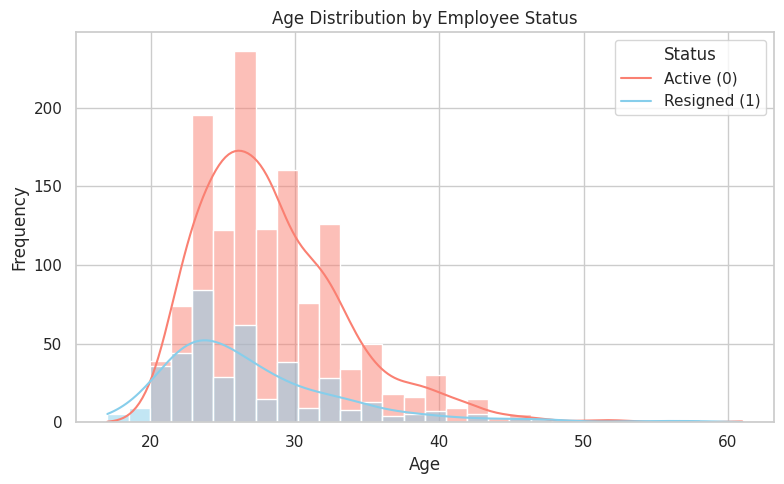

In [12]:
# [13]
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x="age",
    hue="status",
    bins=30,
    kde=True,
    palette={0: "skyblue", 1: "salmon"},  # Active=◊™◊õ◊ú◊™, Resigned=◊ï◊®◊ï◊ì
    alpha=0.5,
    edgecolor=None   # <<< ◊û◊°◊ô◊® ◊û◊°◊í◊®◊ï◊™
)
plt.title("Age Distribution by Employee Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title="Status", labels=["Active (0)", "Resigned (1)"])
plt.tight_layout()
plt.show()


◊î◊ë◊ì◊ú◊ô ◊í◊ô◊ú ◊ë◊ô◊ü ◊§◊¢◊ô◊ú◊ô◊ù ◊ú◊¢◊ï◊ñ◊ë◊ô◊ù - ◊î◊û◊©◊ö

In [13]:
# [14]
from scipy import stats

g0 = df.loc[df['status']==0, 'age'].dropna()  # Active
g1 = df.loc[df['status']==1, 'age'].dropna()  # Resigned

# ◊ë◊ì◊ô◊ß◊™ ◊†◊ï◊®◊û◊ú◊ô◊ï◊™ (◊û◊ì◊í◊ù ◊¢◊ì 500 ◊ú◊û◊†◊ô◊¢◊™ ◊ê◊ñ◊î◊®◊ï◊™)
def shapiro_p(x):
    x = x.sample(min(len(x), 500), random_state=0) if len(x) > 500 else x
    return stats.shapiro(x).pvalue if len(x) >= 3 else np.nan

p0, p1 = shapiro_p(g0), shapiro_p(g1)

if (p0 > 0.05) and (p1 > 0.05):
    # Welch t-test (◊©◊ï◊†◊ï◊™ ◊ú◊ê ◊©◊ï◊ï◊î)
    t, p = stats.ttest_ind(g0, g1, equal_var=False)
    # Cohen's d (◊ê◊§◊ß◊ò ◊°◊ò◊†◊ì◊®◊ò◊ô)
    n0, n1 = len(g0), len(g1)
    s_pooled = np.sqrt(((n0-1)*g0.var(ddof=1) + (n1-1)*g1.var(ddof=1)) / (n0+n1-2))
    d = (g0.mean() - g1.mean()) / s_pooled
    test_line = f"Welch t-test: t={t:.2f}, p={p:.3g} | Cohen's d={d:.2f}"
else:
    # Mann‚ÄìWhitney U (◊ú◊ê ◊§◊®◊û◊ò◊®◊ô) + Cliff's delta
    u, p = stats.mannwhitneyu(g0, g1, alternative='two-sided')
    # Cliff's delta ◊ô◊¢◊ô◊ú ◊ú◊ú◊ê ◊ú◊ï◊ú◊ê◊ï◊™:
    diff = np.subtract.outer(g0.values, g1.values)
    delta = (np.sum(diff > 0) - np.sum(diff < 0)) / (len(g0)*len(g1))
    test_line = f"Mann‚ÄìWhitney U={u:.0f}, p={p:.3g} | Cliff's delta={delta:.2f}"

summary = pd.DataFrame({
    'Group': ['Active (0)', 'Resigned (1)'],
    'N': [len(g0), len(g1)],
    'Mean age': [g0.mean(), g1.mean()],
    'Median age': [g0.median(), g1.median()],
    'SD': [g0.std(ddof=1), g1.std(ddof=1)]
}).round(2)

print(test_line)
summary


Mann‚ÄìWhitney U=216127, p=2.6e-11 | Cliff's delta=-0.22


Group     N  Mean age  Median age    SD
0    Active (0)   412     27.06        25.0  6.34
1  Resigned (1)  1339     28.43        28.0  5.18

◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊í◊ô◊ú ◊ë◊ô◊ü ◊§◊¢◊ô◊ú◊ô◊ù ◊ú◊¢◊ï◊ñ◊ë◊ô◊ù - ◊î◊û◊©◊ö

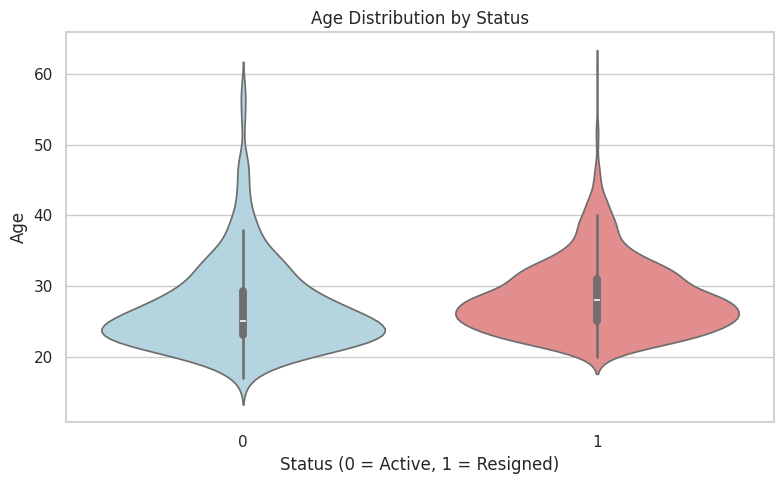

In [14]:
# [15]
plt.figure(figsize=(8, 5))
sns.violinplot(x='status', y='age', data=df, palette=['lightblue', 'lightcoral'])
plt.title('Age Distribution by Status')
plt.xlabel('Status (0 = Active, 1 = Resigned)')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊†◊ô◊¶◊ï◊ú ◊ó◊ï◊§◊©◊î ◊©◊†◊™◊ô◊™ ◊ë◊ô◊ü ◊§◊¢◊ô◊ú◊ô◊ù ◊ú◊¢◊ï◊ñ◊ë◊ô◊ù

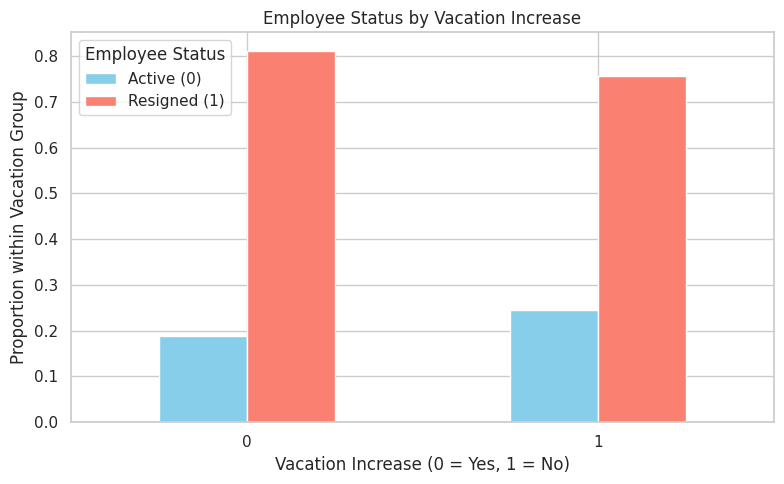

In [15]:
# [16]

# ◊ò◊ë◊ú◊™ ◊©◊õ◊ô◊ó◊ï◊ô◊ï◊™ ◊ô◊ó◊°◊ô◊™ ‚Äì ◊ê◊ó◊ï◊ñ◊ô ◊¢◊ï◊ñ◊ë◊ô◊ù/◊§◊¢◊ô◊ú◊ô◊ù ◊û◊™◊ï◊ö ◊õ◊ú ◊ß◊ë◊ï◊¶◊™ vacation_increase
plot_data = df.groupby('avg_annual_vacation_increase')['status'].value_counts(normalize=True).unstack()

# ◊¶◊ô◊ï◊® ◊í◊®◊£ ◊¢◊û◊ï◊ì◊ï◊™
plot_data.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'salmon'])
plt.title('Employee Status by Vacation Increase')
plt.xlabel('Vacation Increase (0 = Yes, 1 = No)')
plt.ylabel('Proportion within Vacation Group')
plt.xticks(rotation=0)
plt.legend(['Active (0)', 'Resigned (1)'], title='Employee Status')
plt.tight_layout()
plt.show()



◊ë◊ì◊ô◊ß◊™ ◊û◊ï◊ë◊î◊ß◊ï◊™ ◊°◊ò◊ò◊ô◊°◊ò◊ô◊™ ◊ú◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊†◊ô◊¶◊ï◊ú ◊ó◊ï◊§◊©◊î ◊©◊†◊™◊ô◊™ ◊ë◊ô◊ü ◊§◊¢◊ô◊ú◊ô◊ù ◊ú◊¢◊ï◊ñ◊ë◊ô◊ù

In [16]:
# [17]
from scipy.stats import chi2_contingency, fisher_exact

# ◊ò◊ë◊ú◊™ ◊©◊õ◊ô◊ó◊ï◊ô◊ï◊™ ◊ë◊ô◊ü ◊°◊ò◊ò◊ï◊° ◊ú◊î◊ê◊ù ◊î◊ô◊ô◊™◊î ◊¢◊ú◊ô◊ô◊î ◊ë◊ó◊ï◊§◊©◊î
contingency_table = pd.crosstab(df['status'], df['avg_annual_vacation_increase'])
print("◊ò◊ë◊ú◊™ ◊©◊õ◊ô◊ó◊ï◊ô◊ï◊™:")
print(contingency_table)

# ◊†◊ë◊ì◊ï◊ß ◊ê◊ù ◊ô◊© ◊™◊ê◊ô◊ù ◊ß◊ò◊†◊ô◊ù ◊û-5:
if (contingency_table < 5).any().any():
    # ◊û◊ë◊ó◊ü ◊§◊ô◊©◊®
    oddsratio, p_value = fisher_exact(contingency_table)
    print("\n ◊û◊ë◊ó◊ü ◊§◊ô◊©◊® (Fisher's Exact Test):")
    print(f"Odds Ratio = {oddsratio:.4f}")
    print(f"p-value = {p_value:.4f}")
else:
    # ◊û◊ë◊ó◊ü ◊ó◊ô ◊ë◊®◊ô◊ë◊ï◊¢
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print("\n ◊û◊ë◊ó◊ü ◊ó◊ô-◊ë◊®◊ô◊ë◊ï◊¢ (Chi-Square Test):")
    print(f"Chi¬≤ = {chi2:.4f}")
    print(f"Degrees of Freedom = {dof}")
    print(f"p-value = {p_value:.4f}")


◊ò◊ë◊ú◊™ ◊©◊õ◊ô◊ó◊ï◊ô◊ï◊™:
avg_annual_vacation_increase    0     1
status                                 
0                              55   357
1                             236  1103

 ◊û◊ë◊ó◊ü ◊ó◊ô-◊ë◊®◊ô◊ë◊ï◊¢ (Chi-Square Test):
Chi¬≤ = 3.8535
Degrees of Freedom = 1
p-value = 0.0496


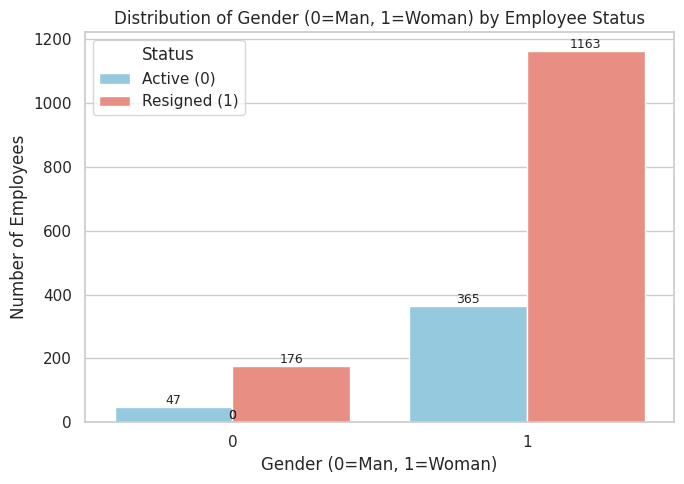

In [17]:
# [18]
plt.figure(figsize=(7,5))
ax = sns.countplot(
    data=df,
    x="gender",
    hue="status",
    palette=['skyblue','salmon'],
    dodge=True
)
# ◊î◊ï◊°◊§◊™ ◊û◊°◊§◊®◊ô◊ù ◊û◊¢◊ú ◊õ◊ú ◊¢◊û◊ï◊ì◊î
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9)

ax.set_title("Distribution of Gender (0=Man, 1=Woman) by Employee Status")
ax.set_xlabel("Gender (0=Man, 1=Woman)")
ax.set_ylabel("Number of Employees")
plt.legend(title="Status", labels=["Active (0)", "Resigned (1)"])
plt.tight_layout()
plt.show()


◊î◊™◊§◊ú◊í◊ï◊™ ◊ô◊ú◊ì◊ô◊ù ◊ú◊§◊ô ◊°◊ò◊ò◊ï◊°

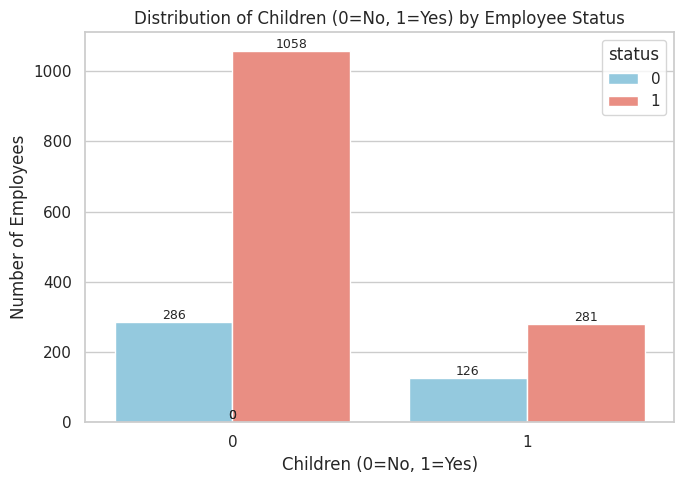

In [18]:
#[19]
plt.figure(figsize=(7,5))
ax = sns.countplot(
    data=df,
    x="children",
    hue="status",
    palette=['skyblue','salmon'],
    dodge=True
)
# ◊î◊ï◊°◊§◊™ ◊û◊°◊§◊®◊ô◊ù ◊û◊¢◊ú ◊õ◊ú ◊¢◊û◊ï◊ì◊î
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9)

ax.set_title("Distribution of Children (0=No, 1=Yes) by Employee Status")
ax.set_xlabel("Children (0=No, 1=Yes)")
ax.set_ylabel("Number of Employees")
plt.tight_layout()
plt.show()


◊õ◊ì◊ô ◊ú◊ë◊ì◊ï◊ß ◊î◊ê◊ù ◊î◊ß◊©◊® ◊ë◊ô◊ü ◊ô◊ú◊ì◊ô◊ù ◊ú◊ë◊ô◊ü ◊°◊ò◊ò◊ï◊° ◊î◊¢◊ï◊ë◊ì ◊î◊ï◊ê ◊û◊ï◊ë◊î◊ß ◊°◊ò◊ò◊ô◊°◊ò◊ô◊™, ◊†◊©◊™◊û◊© ◊ë◊û◊ë◊ó◊ü :
(chi2)

In [19]:
#[20]
from scipy.stats import chi2_contingency, fisher_exact

# ◊ò◊ë◊ú◊™ ◊©◊õ◊ô◊ó◊ï◊ô◊ï◊™ ◊ë◊ô◊ü ◊°◊ò◊ò◊ï◊° ◊ú◊ô◊ú◊ì◊ô◊ù (0=◊ë◊ú◊ô, 1=◊¢◊ù)
contingency_table = pd.crosstab(df['status'], df['children'])
print("◊ò◊ë◊ú◊™ ◊©◊õ◊ô◊ó◊ï◊ô◊ï◊™:")
print(contingency_table)

# ◊ë◊ì◊ô◊ß◊î ◊ê◊ù ◊ô◊© ◊™◊ê◊ô◊ù ◊ß◊ò◊†◊ô◊ù ◊û-5
if (contingency_table < 5).any().any():
    # ◊û◊ë◊ó◊ü ◊§◊ô◊©◊®
    oddsratio, p_value = fisher_exact(contingency_table)
    print("\n◊û◊ë◊ó◊ü ◊§◊ô◊©◊® (Fisher's Exact Test):")
    print(f"Odds Ratio = {oddsratio:.3f}")
    print(f"p-value = {p_value:.4f}")
else:
    # ◊û◊ë◊ó◊ü ◊ó◊ô ◊ë◊®◊ô◊ë◊ï◊¢
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print("\n◊û◊ë◊ó◊ü ◊ó◊ô ◊ë◊®◊ô◊ë◊ï◊¢ (Chi-Square Test):")
    print(f"Chi¬≤ = {chi2:.3f}")
    print(f"Degrees of Freedom = {dof}")
    print(f"p-value = {p_value:.4f}")

# ◊ò◊ë◊ú◊™ ◊ê◊ó◊ï◊ñ◊ô◊ù
summary = pd.crosstab(df['children'], df['status'], normalize='index') * 100
print("\n◊î◊™◊§◊ú◊í◊ï◊™ ◊ë◊ê◊ó◊ï◊ñ◊ô◊ù (◊©◊ï◊®◊ï◊™ ◊û◊°◊õ◊û◊ï◊™ ◊ú-100%):")
print(summary.round(2))


◊ò◊ë◊ú◊™ ◊©◊õ◊ô◊ó◊ï◊ô◊ï◊™:
children     0    1
status             
0          286  126
1         1058  281

◊û◊ë◊ó◊ü ◊ó◊ô ◊ë◊®◊ô◊ë◊ï◊¢ (Chi-Square Test):
Chi¬≤ = 15.730
Degrees of Freedom = 1
p-value = 0.0001

◊î◊™◊§◊ú◊í◊ï◊™ ◊ë◊ê◊ó◊ï◊ñ◊ô◊ù (◊©◊ï◊®◊ï◊™ ◊û◊°◊õ◊û◊ï◊™ ◊ú-100%):
status        0      1
children              
0         21.28  78.72
1         30.96  69.04


◊ë◊ì◊ô◊ß◊™ ◊û◊ï◊ë◊î◊ß◊ï◊™ ◊ú◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊î◊™◊§◊ú◊í◊ï◊™ ◊î◊ô◊ú◊ì◊ô◊ù ◊ë◊ô◊ü ◊§◊¢◊ô◊ú◊ô◊ù ◊ú◊¢◊ï◊ñ◊ë◊ô◊ù - ◊î◊û◊©◊ö

Contingency table (status √ó children):
 children     0    1
status             
0          286  126
1         1058  281
Chi-square = 15.73, p = 0.0001


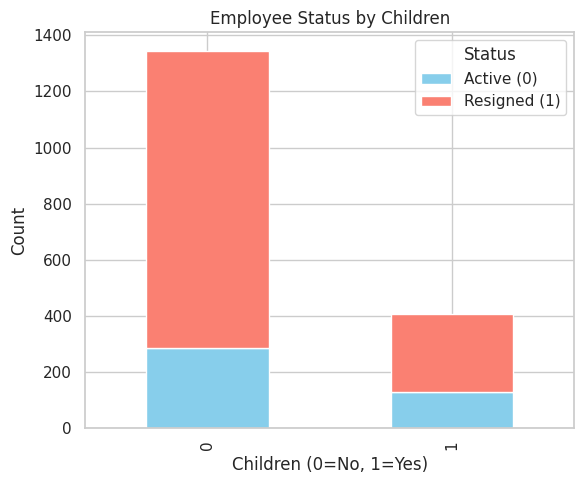

In [20]:
# [21]
import scipy.stats as st

# ◊ò◊ë◊ú◊™ ◊û◊ë◊ó◊ü: ◊°◊ò◊ò◊ï◊° √ó ◊ô◊ú◊ì◊ô◊ù
tbl_test = pd.crosstab(df['status'], df['children'])
chi2, p_chi, _, _ = st.chi2_contingency(tbl_test)

print("Contingency table (status √ó children):\n", tbl_test)
print(f"Chi-square = {chi2:.2f}, p = {p_chi:.4f}")

# ◊í◊®◊£: ◊¶◊ô◊® X = Children, ◊ê◊í◊ì◊î = Status
tbl_plot = pd.crosstab(df['children'], df['status'])
tbl_plot.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(6,5))
plt.title("Employee Status by Children")
plt.xlabel("Children (0=No, 1=Yes)")
plt.ylabel("Count")
plt.legend(["Active (0)", "Resigned (1)"], title="Status")
plt.tight_layout()
plt.show()


◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊ï◊ï◊™◊ß ◊ë◊¢◊™ ◊î◊¢◊ñ◊ô◊ë◊î ◊ë◊ô◊ü ◊î◊û◊ï◊ß◊ì◊ô◊ù

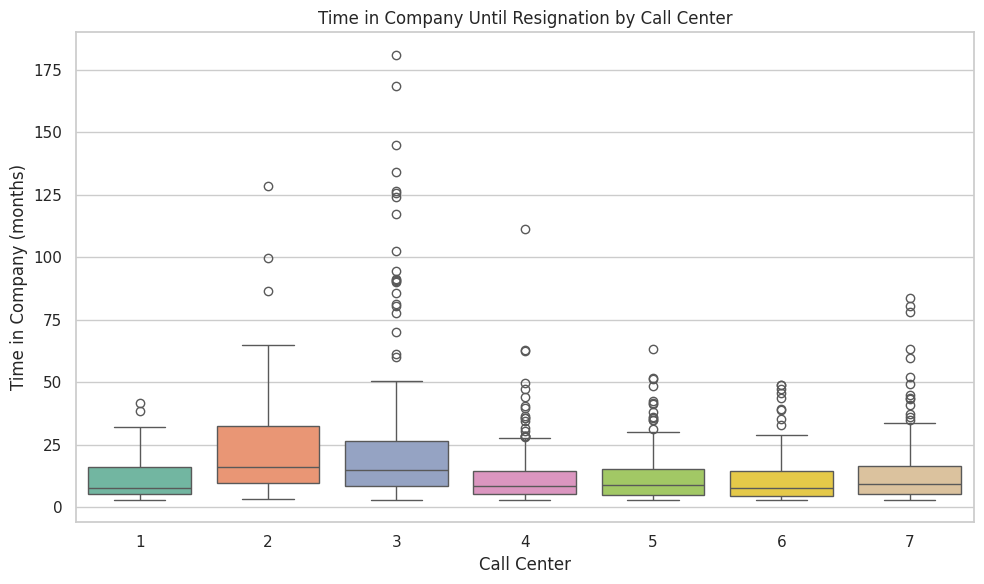

In [21]:
# [22]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['status'] == 1], x='call_center', y='time_in_company', palette='Set2')
plt.title('Time in Company Until Resignation by Call Center')
plt.xlabel('Call Center')
plt.ylabel('Time in Company (months)')
plt.tight_layout()
plt.show()


◊ë◊ì◊ô◊ß◊™ ◊û◊ï◊ë◊î◊ß◊ï◊™ ◊î◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊ï◊ï◊™◊ß ◊ë◊¢◊™ ◊î◊¢◊ñ◊ô◊ë◊î ◊ë◊ô◊ü ◊î◊û◊ï◊ß◊ì◊ô◊ù

In [22]:
# [23]
from scipy.stats import kruskal

# ◊†◊ô◊¶◊ï◊® ◊®◊©◊ô◊û◊î ◊©◊ú ◊ß◊ë◊ï◊¶◊ï◊™ ◊ú◊§◊ô ◊û◊ï◊ß◊ì◊ô◊ù
groups = [group['time_in_company'].values for _, group in df[df['status'] == 1].groupby('call_center')]

# ◊û◊ë◊ó◊ü ◊ß◊®◊ï◊°◊ß◊ú-◊ï◊ê◊ú◊ô◊°
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis Test:\nStatistic = {stat:.4f}, p-value = {p:.4f}")


Kruskal-Wallis Test:
Statistic = 87.7604, p-value = 0.0000


◊ë◊ó◊ô◊†◊™ ◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊ô◊ü ◊î◊û◊ï◊ß◊ì◊ô◊ù - ◊î◊û◊©◊ö

In [23]:
# [24]
# !pip -q install scikit-posthocs

import sys
# ◊û◊™◊ß◊ô◊ü ◊ú◊™◊ï◊ö ◊§◊®◊©◊ü ◊î◊§◊ô◊ô◊™◊ï◊ü ◊©◊ú ◊î◊û◊ó◊ë◊®◊™ ◊î◊†◊ï◊õ◊ó◊ô◊™
!{sys.executable} -m pip install -q --upgrade pip
!{sys.executable} -m pip install -q scikit-posthocs

import scikit_posthocs as sp
print("scikit_posthocs:", sp.__version__)


import numpy as np
import pandas as pd
import scikit_posthocs as sp
from scipy.stats import kruskal

# ◊†◊†◊™◊ó ◊®◊ß ◊¢◊ï◊ñ◊ë◊ô◊ù
df_res = df[df['status'] == 1].copy()

# ◊™◊ô◊ê◊ï◊® ◊ú◊õ◊ú ◊û◊ï◊ß◊ì
by_cc = (df_res.groupby('call_center')['time_in_company']
         .agg(N='size', Median='median', Mean='mean',
              IQR=lambda s: np.subtract(*np.percentile(s.dropna(), [75, 25]))))
display(by_cc)

# Kruskal‚ÄìWallis
groups = [g['time_in_company'].dropna().values for _, g in df_res.groupby('call_center')]
H_stat, p_kw = kruskal(*groups)
print(f"Kruskal‚ÄìWallis: H = {H_stat:.4f}, p = {p_kw:.4f}")

# Dunn post-hoc (Holm)
p_dunn = sp.posthoc_dunn(df_res, val_col='time_in_company', group_col='call_center', p_adjust='holm')
display(p_dunn)

# Epsilon-squared
k = df_res['call_center'].nunique()
N = len(df_res)
epsilon_sq = (H_stat - k + 1) / (N - k)
print(f"Epsilon-squared (overall effect) = {epsilon_sq:.3f}")


scikit_posthocs: 0.11.4


N     Median       Mean        IQR
call_center                                      
1             85   7.833333  11.713725  11.000000
2             73  16.066667  25.080822  22.733333
3            211  14.933333  24.764929  17.866667
4            228   8.416667  12.237135   8.916667
5            172   8.950000  12.566667  10.300000
6            167   7.833333  11.393014   9.966667
7            403   9.466667  12.798428  11.433333

Kruskal‚ÄìWallis: H = 87.7604, p = 0.0000


1             2             3             4             5  \
1  1.000000  3.486853e-05  1.945774e-05  1.000000e+00  1.000000e+00   
2  0.000035  1.000000e+00  1.000000e+00  1.532957e-06  8.140167e-06   
3  0.000019  1.000000e+00  1.000000e+00  1.388989e-08  4.944603e-07   
4  1.000000  1.532957e-06  1.388989e-08  1.000000e+00  1.000000e+00   
5  1.000000  8.140167e-06  4.944603e-07  1.000000e+00  1.000000e+00   
6  1.000000  9.931094e-08  5.720156e-10  1.000000e+00  1.000000e+00   
7  1.000000  6.206980e-06  2.444213e-08  1.000000e+00  1.000000e+00   

              6             7  
1  1.000000e+00  1.000000e+00  
2  9.931094e-08  6.206980e-06  
3  5.720156e-10  2.444213e-08  
4  1.000000e+00  1.000000e+00  
5  1.000000e+00  1.000000e+00  
6  1.000000e+00  6.428100e-01  
7  6.428100e-01  1.000000e+00

Epsilon-squared (overall effect) = 0.061


In [24]:
# [25]
# !pip -q install lifelines

import numpy as np
import pandas as pd
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

# ===== ◊î◊í◊ì◊®◊ï◊™ =====
ORD_VAR = 'Team_size'   # <<< ◊ê◊ù ◊ê◊¶◊ú◊ö ◊ñ◊î 'team_size_cat' - ◊¢◊ì◊õ◊†◊ô ◊õ◊ê◊ü
TIME_COL = 'time_in_company'
EVENT_COL = 'status'

# ===== ◊î◊õ◊†◊™ ◊î◊ì◊ê◊ò◊î =====
cols = [TIME_COL, EVENT_COL, ORD_VAR]
df_cox = (df[cols]
          .dropna()
          .copy())

# ◊ï◊ô◊ì◊ï◊ê ◊ò◊ô◊§◊ï◊°◊ô◊ù
df_cox[ORD_VAR] = pd.to_numeric(df_cox[ORD_VAR], errors='coerce')
df_cox = df_cox.dropna(subset=[ORD_VAR])

# ◊ë◊ì◊ô◊ß◊™ ◊î◊™◊§◊ú◊í◊ï◊™ ◊ê◊ô◊®◊ï◊¢◊ô◊ù ◊ú◊õ◊ú ◊ì◊®◊í◊î (◊õ◊ì◊ô ◊ú◊ê◊™◊® ◊ì◊®◊í◊ï◊™ ◊ì◊ú◊ô◊ú◊ï◊™)
events_by_grade = df_cox.groupby(ORD_VAR)[EVENT_COL].agg(events='sum', n='count')
print('Events / N by grade:\n', events_by_grade, '\n')

# ===== ◊î◊™◊ê◊û◊™ ◊ß◊ï◊ß◊° ◊ó◊ì-◊û◊©◊™◊†◊ô ◊¢◊ù ◊ß◊ô◊ì◊ï◊ì ◊°◊ì◊®◊™◊ô =====
cph_ord = CoxPHFitter()
cph_ord.fit(df_cox[[TIME_COL, EVENT_COL, ORD_VAR]],
            duration_col=TIME_COL, event_col=EVENT_COL, robust=True)
print('\n== CoxPH (ordinal coding) summary ==')
display(cph_ord.summary[['coef','se(coef)','exp(coef)','exp(coef) lower 95%','exp(coef) upper 95%','p']])

# HR ◊ú◊¢◊ú◊ô◊î ◊©◊ú ◊ì◊®◊í◊î ◊ê◊ó◊™
beta = cph_ord.params_[ORD_VAR]
se   = cph_ord.standard_errors_[ORD_VAR]
HR_per_grade      = np.exp(beta)
HR_per_grade_low  = np.exp(beta - 1.96*se)
HR_per_grade_high = np.exp(beta + 1.96*se)
print(f"\nHazard Ratio per one-grade increase in {ORD_VAR}: "
      f"{HR_per_grade:.3f} (95% CI {HR_per_grade_low:.3f}‚Äì{HR_per_grade_high:.3f})")


Events / N by grade:
            events    n
Team_size             
1             215  253
2              92  129
3             383  472
4             520  701
5             129  196 


== CoxPH (ordinal coding) summary ==


coef  se(coef)  exp(coef)  exp(coef) lower 95%  \
covariate                                                       
Team_size  0.032547  0.023948   1.033083             0.985713   

           exp(coef) upper 95%         p  
covariate                                 
Team_size              1.08273  0.174126


Hazard Ratio per one-grade increase in Team_size: 1.033 (95% CI 0.986‚Äì1.083)


◊ô◊¶◊ô◊®◊™ ◊û◊©◊™◊†◊î ◊ó◊ì◊© - ◊©◊õ◊® ◊ô◊ó◊°◊ô (◊ó◊ï◊ì◊©◊ô)

In [25]:
#[26]
import pandas as pd

# ◊ß◊®◊ô◊ê◊™ ◊î◊ì◊ê◊ò◊î
file_path = "/content/DATA.xlsx"
df = pd.read_excel(file_path, sheet_name="data")

# ◊§◊ï◊†◊ß◊¶◊ô◊î ◊ú◊û◊¶◊ô◊ê◊™ ◊©◊õ◊® ◊û◊ô◊†◊ô◊û◊ï◊ù ◊ú◊§◊ô ◊©◊†◊î ◊ï◊ó◊ï◊ì◊©
def get_min_wage(year, month, status):
    if status == 0:  # ◊§◊¢◊ô◊ú
        return 5880.02
    # ◊¢◊ñ◊ë ‚Üí ◊ú◊§◊ô ◊™◊ê◊®◊ô◊ö ◊¢◊ñ◊ô◊ë◊î
    if year == 2017 and month <= 11:
        return 5000
    elif (year == 2017 and month == 12) or (2018 <= year <= 2022) or (year == 2023 and month <= 3):
        return 5300
    elif (year == 2023 and month >= 4) or (year == 2024 and month <= 3):
        return 5571.75
    elif (year == 2024 and month >= 4):
        return 5880.02
    return None

# ◊†◊®◊û◊ï◊ú ◊ú◊û◊©◊®◊î ◊û◊ú◊ê◊î (178 ◊©◊¢◊ï◊™ + ◊§◊®◊û◊ô◊ï◊™)
df["monthly_salary_fulltime"] = (
    (df["salary_per_hour"] * 178) + df["bonus_avg"]
)

# ◊ß◊ë◊ô◊¢◊™ ◊©◊õ◊® ◊û◊ô◊†◊ô◊û◊ï◊ù ◊ú◊õ◊ú ◊¢◊ï◊ë◊ì
df["min_wage_for_period"] = df.apply(
    lambda row: get_min_wage(
        row.get("resignation_year", 2024),
        row.get("resignation_month", 1),
        row["status"]
    ),
    axis=1
)

# ◊ó◊ô◊©◊ï◊ë ◊©◊õ◊® ◊ô◊ó◊°◊ô (◊ô◊ó◊°)
df["relative_salary"] = df["monthly_salary_fulltime"] / df["min_wage_for_period"]

# ◊ó◊ô◊©◊ï◊ë ◊§◊¢◊® ◊ë◊©◊ß◊ú◊ô◊ù (◊ê◊ï◊§◊¶◊ô◊ï◊†◊ú◊ô)
df["wage_gap"] = df["monthly_salary_fulltime"] - df["min_wage_for_period"]

# ◊î◊ì◊§◊°◊™ 5 ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ú◊ë◊ì◊ô◊ß◊î
print(df[["id", "status", "resignation_year", "resignation_month",
          "salary_per_hour", "part_time_percent", "bonus_avg",
          "monthly_salary_fulltime", "min_wage_for_period",
          "relative_salary", "wage_gap"]].head(5))


   id  status  resignation_year  resignation_month  salary_per_hour  \
0   1       0               NaN                NaN            30.00   
1   2       0               NaN                NaN            30.00   
2   3       0               NaN                NaN            30.00   
3   4       0               NaN                NaN            41.25   
4   5       0               NaN                NaN            40.82   

   part_time_percent  bonus_avg  monthly_salary_fulltime  min_wage_for_period  \
0           0.305770     312.00                  5652.00              5880.02   
1           0.468796     518.67                  5858.67              5880.02   
2           0.279720     202.00                  5542.00              5880.02   
3           0.718655    4313.89                 11656.39              5880.02   
4           0.393053    1427.00                  8692.96              5880.02   

   relative_salary  wage_gap  
0         0.961221   -228.02  
1         0.996369    -2

◊î◊™◊§◊ú◊í◊ï◊™ ◊©◊ú ◊©◊õ◊® ◊ô◊ó◊°◊ô ◊ú◊©◊õ◊® ◊û◊ô◊†◊ô◊û◊ï◊ù

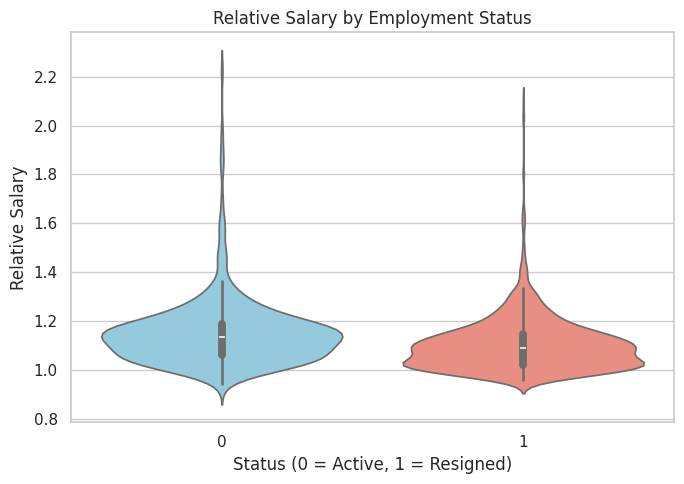

In [26]:
# [27]
import matplotlib.pyplot as plt
import seaborn as sns

col = "relative_salary"

plt.figure(figsize=(7,5))
sns.violinplot(
    x="status", y=col, data=df,
    palette=["skyblue", "salmon"],  # ◊°◊ì◊® ◊ß◊ë◊ï◊¢: [0,1]
    inner="box"
)
plt.title("Relative Salary by Employment Status")
plt.xlabel("Status (0 = Active, 1 = Resigned)")
plt.ylabel("Relative Salary")
plt.tight_layout()
plt.show()




◊ë◊ì◊ô◊ß◊™ ◊û◊ï◊ë◊î◊ß◊ï◊™ ◊î◊î◊ë◊ì◊ú◊ô◊ù ◊ë◊©◊õ◊® ◊ô◊ó◊°◊ô ◊ë◊ô◊ü ◊§◊¢◊ô◊ú◊ô◊ù ◊ú◊¢◊ï◊ñ◊ë◊ô◊ù

In [27]:
# [28]

import numpy as np
import pandas as pd
from scipy import stats

# ◊ó◊ú◊ï◊ß◊î ◊ú◊©◊™◊ô ◊ß◊ë◊ï◊¶◊ï◊™
g0 = df.loc[df["status"]==0, "relative_salary"].dropna()  # ◊§◊¢◊ô◊ú◊ô◊ù
g1 = df.loc[df["status"]==1, "relative_salary"].dropna()  # ◊¢◊ï◊ñ◊ë◊ô◊ù

# ◊ë◊ì◊ô◊ß◊™ ◊†◊ï◊®◊û◊ú◊ô◊ï◊™ (◊©◊ê◊§◊ô◊®◊ï-◊ï◊ô◊ú◊ß; ◊ú◊ï◊ß◊ó◊ô◊ù ◊ì◊í◊ô◊û◊î ◊¢◊ì 500 ◊õ◊ì◊ô ◊ú◊û◊†◊ï◊¢ ◊ê◊ñ◊î◊®◊ï◊™)
def shapiro_p(x):
    x = x.sample(min(len(x), 500), random_state=0) if len(x) > 500 else x
    return stats.shapiro(x).pvalue if len(x) >= 3 else np.nan

p0, p1 = shapiro_p(g0), shapiro_p(g1)

if (p0 > 0.05) and (p1 > 0.05):
    # ◊†◊ï◊®◊û◊ú◊ô◊ï◊™ ‚Äì ◊†◊ë◊¶◊¢ Welch t-test
    t, p = stats.ttest_ind(g0, g1, equal_var=False)
    # ◊í◊ï◊ì◊ú ◊ê◊§◊ß◊ò: Cohen's d
    n0, n1 = len(g0), len(g1)
    s_pooled = np.sqrt(((n0-1)*g0.var(ddof=1) + (n1-1)*g1.var(ddof=1)) / (n0+n1-2))
    d = (g0.mean() - g1.mean()) / s_pooled
    print(f"Welch t-test: t={t:.2f}, p={p:.3g} | Cohen's d={d:.2f}")
else:
    # ◊ú◊ê ◊†◊ï◊®◊û◊ú◊ô ‚Äì ◊û◊ë◊ó◊ü ◊û◊†‚Äì◊ï◊ô◊ò◊†◊ô + Cliff's delta
    u, p = stats.mannwhitneyu(g0, g1, alternative="two-sided")
    diff = np.subtract.outer(g0.values, g1.values)
    delta = (np.sum(diff > 0) - np.sum(diff < 0)) / (len(g0)*len(g1))
    print(f"Mann‚ÄìWhitney U={u:.0f}, p={p:.3g} | Cliff's delta={delta:.2f}")

# ◊ò◊ë◊ú◊™ ◊°◊ô◊õ◊ï◊ù
summary = pd.DataFrame({
    "Group": ["Active (0)", "Resigned (1)"],
    "N": [len(g0), len(g1)],
    "Mean": [g0.mean(), g1.mean()],
    "Median": [g0.median(), g1.median()],
    "SD": [g0.std(ddof=1), g1.std(ddof=1)]
}).round(3)

print("\nSummary table:")
print(summary)



Mann‚ÄìWhitney U=347180, p=1.85e-15 | Cliff's delta=0.26

Summary table:
          Group     N   Mean  Median     SD
0    Active (0)   412  1.151   1.135  0.142
1  Resigned (1)  1339  1.104   1.088  0.113


Mann‚ÄìWhitney U = 395,097

p-value = 2.04e-15 ‚Üí ◊û◊ï◊ë◊î◊ß◊ï◊™ ◊í◊ë◊ï◊î◊î ◊û◊ê◊ï◊ì (p < 0.001).

Cliff‚Äôs delta = 0.25 ‚Üí ◊í◊ï◊ì◊ú ◊ê◊§◊ß◊ò ◊ß◊ò◊ü ◊¢◊ì ◊ë◊ô◊†◊ï◊†◊ô (◊õ◊ú◊ï◊û◊® ◊î◊î◊ë◊ì◊ú ◊ß◊ô◊ô◊ù, ◊ê◊ö ◊ú◊ê ◊¢◊¶◊ï◊ù).  
◊¢◊ï◊ë◊ì◊ô◊ù ◊§◊¢◊ô◊ú◊ô◊ù: ◊©◊õ◊® ◊ô◊ó◊°◊ô ◊û◊û◊ï◊¶◊¢ = 1.146 ‚Üí ◊õ◊ú◊ï◊û◊® ◊ë◊û◊û◊ï◊¶◊¢ ~15% ◊û◊¢◊ú ◊©◊õ◊® ◊î◊û◊ô◊†◊ô◊û◊ï◊ù.

◊¢◊ï◊ë◊ì◊ô◊ù ◊©◊¢◊ñ◊ë◊ï: ◊©◊õ◊® ◊ô◊ó◊°◊ô ◊û◊û◊ï◊¶◊¢ = 1.104 ‚Üí ◊õ◊ú◊ï◊û◊® ◊ë◊û◊û◊ï◊¶◊¢ ~10% ◊û◊¢◊ú ◊©◊õ◊® ◊î◊û◊ô◊†◊ô◊û◊ï◊ù.

◊î◊§◊¢◊®: ◊ë◊¢◊®◊ö 0.04 ◊†◊ß◊ï◊ì◊ï◊™ ◊ô◊ó◊°◊ô◊ï◊™ (◊õ÷æ4% ◊î◊ë◊ì◊ú).  
◊°◊ò◊ò◊ô◊°◊ò◊ô◊™ ‚Äì ◊ô◊© ◊î◊ë◊ì◊ú ◊û◊ï◊ë◊î◊ß: ◊î◊¢◊ï◊ë◊ì◊ô◊ù ◊î◊§◊¢◊ô◊ú◊ô◊ù ◊û◊®◊ï◊ï◊ô◊ó◊ô◊ù ◊ô◊ó◊°◊ô◊™ ◊ô◊ï◊™◊® ◊û◊¢◊ú ◊©◊õ◊® ◊î◊û◊ô◊†◊ô◊û◊ï◊ù ◊ú◊¢◊ï◊û◊™ ◊î◊¢◊ï◊ë◊ì◊ô◊ù ◊©◊¢◊ñ◊ë◊ï.

◊û◊¢◊©◊ô◊™ ‚Äì ◊í◊ï◊ì◊ú ◊î◊ê◊§◊ß◊ò ◊ú◊ê ◊¢◊†◊ß. ◊î◊û◊©◊û◊¢◊ï◊™: ◊ô◊ô◊™◊õ◊ü ◊©◊©◊õ◊® ◊ê◊õ◊ü ◊û◊©◊ó◊ß ◊™◊§◊ß◊ô◊ì ◊ë◊î◊ó◊ú◊ò◊î ◊ú◊¢◊ñ◊ï◊ë, ◊ê◊ë◊ú ◊ñ◊î ◊õ◊†◊®◊ê◊î ◊ú◊ê ◊î◊í◊ï◊®◊ù ◊î◊ô◊ó◊ô◊ì ◊ê◊ú◊ê ◊ó◊ú◊ß ◊û◊™◊û◊ï◊†◊î ◊®◊ó◊ë◊î ◊ô◊ï◊™◊® (◊û◊©◊û◊®◊ï◊™, ◊¢◊ï◊û◊°, ◊†◊ô◊î◊ï◊ú ◊ï◊õ◊ï‚Äô).

◊î◊ò◊ô◊î ◊î◊ï◊°◊®◊î ‚Äì ◊ë◊ñ◊õ◊ï◊™ ◊î◊©◊õ◊® ◊î◊ô◊ó◊°◊ô (◊û◊†◊ï◊®◊û◊ú ◊ú◊§◊ô ◊©◊†◊™ ◊¢◊ñ◊ô◊ë◊î) ◊î◊¶◊ú◊ó◊™ ◊ú◊†◊ò◊®◊ú ◊ê◊™ ◊î◊ë◊¢◊ô◊î ◊©◊ú ◊©◊ô◊†◊ï◊ô◊ô◊ù ◊ë◊©◊õ◊® ◊û◊ô◊†◊ô◊û◊ï◊ù ◊ú◊ê◊ï◊®◊ö ◊ñ◊û◊ü.  


◊ë◊ó◊ô◊†◊™ ◊ß◊©◊® ◊ë◊ô◊ü % ◊û◊©◊®◊î ◊ú◊¢◊ñ◊ô◊ë◊î

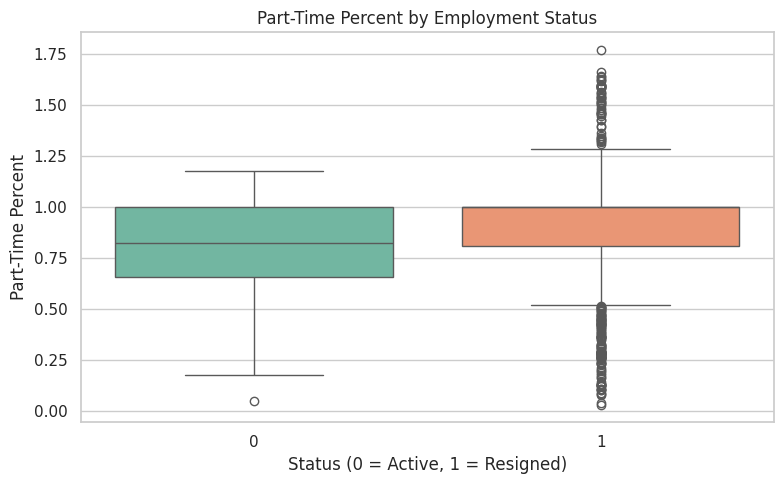

In [28]:
# [29]
plt.figure(figsize=(8, 5))
sns.boxplot(x='status', y='part_time_percent', data=df, palette='Set2')
plt.title('Part-Time Percent by Employment Status')
plt.xlabel('Status (0 = Active, 1 = Resigned)')
plt.ylabel('Part-Time Percent')
plt.tight_layout()
plt.show()


◊ë◊ì◊ô◊ß◊™ ◊û◊ï◊ë◊î◊ß◊ï◊™ ◊î◊î◊ë◊ì◊ú◊ô◊ù ◊ë% ◊û◊©◊®◊î ◊ë◊ô◊ü ◊§◊¢◊ô◊ú◊ô◊ù ◊ú◊¢◊ï◊ñ◊ë◊ô◊ù

In [29]:
# [30]
from scipy.stats import mannwhitneyu
import numpy as np

# ◊ó◊ú◊ï◊ß◊î ◊ú◊§◊ô ◊°◊ò◊ò◊ï◊° ◊ï◊î◊°◊®◊™ ◊ó◊°◊®◊ô◊ù
group_active = df.loc[df['status'] == 0, 'salary_per_hour'].dropna()
group_resigned = df.loc[df['status'] == 1, 'salary_per_hour'].dropna()

# ◊û◊ë◊ó◊ü Mann‚ÄìWhitney U
u_statistic, p_value = mannwhitneyu(group_active, group_resigned, alternative='two-sided')

# ◊ó◊ô◊©◊ï◊ë Z ◊ï◊ê◊§◊ß◊ò (r)
n1, n2 = len(group_active), len(group_resigned)
mean_U = n1 * n2 / 2
std_U = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
z = (u_statistic - mean_U) / std_U
r = z / np.sqrt(n1 + n2)

print(f"U-statistic: {u_statistic:.0f}")
print(f"Z-score: {z:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Effect size (r): {r:.4f}")


U-statistic: 515208
Z-score: 26.6723
p-value: 0.0000
Effect size (r): 0.6374


# **◊î◊©◊ú◊û◊™ ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù**

◊©◊ú◊ë◊ô ◊î◊©◊ú◊û◊™ ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ë◊©◊ô◊ò◊™ MICE
◊ú◊§◊ô ◊û◊ï◊ß◊ì, ◊ú◊û◊©◊™◊†◊ô◊ù ◊î◊ë◊ê◊ô◊ù:  

answered_calls_vs_center_avg, answered_calls_vs_employee_avg, call_duration_vs_center_avg, call_duration_vs_employee_avg, calls_perhour_vs_center_avg, calls_perhour_vs_employee_avg.

In [30]:
# [31] ◊ê◊ô◊û◊§◊ô◊ï◊ò KPI ◊ë◊ú◊ë◊ì (◊§◊®-◊û◊ï◊ß◊ì) ◊ú◊§◊ô ◊î◊î◊í◊ì◊®◊ï◊™ ◊î◊ó◊ì◊©◊ï◊™
import numpy as np
import pandas as pd

from sklearn.experimental import enable_iterative_imputer  # noqa: F401
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler

# ===== ◊ë◊ì◊ô◊ß◊™ ◊ß◊ô◊ï◊ù df =====
try:
    df
except NameError:
    raise RuntimeError("◊ú◊ê ◊†◊û◊¶◊ê df ◊ë◊ñ◊ô◊õ◊®◊ï◊ü. ◊ò◊¢◊†◊ô ◊ê◊™ ◊î◊†◊™◊ï◊†◊ô◊ù ◊ú-DataFrame ◊ë◊©◊ù df ◊ú◊§◊†◊ô ◊î◊®◊¶◊™ ◊î◊™◊ê.")

# ◊†◊¢◊ë◊ï◊ì ◊¢◊ú ◊¢◊ï◊™◊ß
df_imputed = df.copy()

# ===== ◊¢◊ï◊í◊†◊ô◊ù =====
TENURE_COL = "time_in_company"   # ◊û◊©◊ö ◊î◊û◊¢◊ß◊ë (◊ó◊ï◊ì◊©◊ô◊ù)
EVENT_COL  = "status"            # 0=◊û◊¶◊ï◊†◊ñ◊®/◊§◊¢◊ô◊ú, 1=◊¢◊ñ◊ë
GROUP_COL  = "call_center"       # ◊ó◊ú◊ï◊ß◊î ◊ú◊û◊ï◊ß◊ì◊ô◊ù ◊¢◊ë◊ï◊® ◊ê◊ô◊û◊§◊ô◊ï◊ò ◊ú◊§◊ô ◊û◊ï◊ß◊ì

# ===== ◊û◊©◊™◊†◊ô KPI ◊û◊ß◊ï◊®◊ô◊ô◊ù (12 ◊û◊©◊™◊†◊ô◊ù) =====
KPI_COLS_DECLARED = [
    "answered_calls_employee_avg_3month",
    "call_duration_employee_avg_3month",
    "calls_perhour_employee_avg_3month",
    "pause_center_employee_avg_3month",
    "answered_calls_employee_avg",
    "call_duration_employee_avg",
    "calls_perhour_employee_avg",
    "pause_center_employee_avg",
    "answered_calls_center_avg",
    "call_duration_center_avg",
    "calls_perhour_center_avg",
    "pause_center_avg"
]

# ◊ë◊§◊ï◊¢◊ú ◊†◊©◊™◊û◊© ◊®◊ß ◊ë◊û◊î ◊©◊ß◊ô◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊ï◊™
KPI_COLS = [c for c in KPI_COLS_DECLARED if c in df_imputed.columns]
if len(KPI_COLS) == 0:
    raise ValueError("◊ú◊ê ◊†◊û◊¶◊ê◊ï ◊¢◊û◊ï◊ì◊ï◊™ KPI ◊û◊ï◊õ◊®◊ï◊™ ◊ë-DataFrame. ◊ë◊ì◊ß◊ô ◊©◊û◊ï◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊î-KPI.")

# ◊§◊ï◊†◊ß◊¶◊ô◊ô◊™ ◊¢◊ñ◊® ◊ú◊°◊§◊ô◊®◊™ ◊ó◊°◊®◊ô◊ù
def count_missing(cols):
    cols = [c for c in cols if c in df_imputed.columns]
    if not cols:
        return 0
    return int(df_imputed[cols].isna().sum().sum())

print(f"‚Ä¢ ◊ó◊°◊®◊ô◊ù ◊ú◊§◊†◊ô ‚Äî KPI: {count_missing(KPI_COLS):,}")

# ===== ◊î◊í◊ì◊®◊ï◊™ ◊ê◊ú◊í◊ï◊®◊ô◊™◊ù =====
rng = 42
min_rows_for_regression = 5   # ◊§◊ó◊ï◊™ ◊û◊ñ◊î ‚Üí ◊û◊ô◊ú◊ï◊ô ◊ó◊¶◊ô◊ï◊†◊ô◊ù (fallback)
max_iter = 25
tol = 1e-3

# ◊ê◊ù ◊ê◊ô◊ü ◊¢◊û◊ï◊ì◊™ ◊û◊ï◊ß◊ì, ◊†◊ë◊¶◊¢ ◊ê◊ô◊û◊§◊ô◊ï◊ò ◊í◊ú◊ï◊ë◊ú◊ô
if GROUP_COL not in df_imputed.columns:
    print(f"'{GROUP_COL}' ◊ú◊ê ◊ß◊ô◊ô◊û◊™ ‚Äî ◊†◊ë◊¶◊¢ ◊ê◊ô◊û◊§◊ô◊ï◊ò ◊í◊ú◊ï◊ë◊ú◊ô (◊†◊í◊ì◊ô◊® ◊ß◊ë◊ï◊¶◊™ ALL).")
    df_imputed[GROUP_COL] = "ALL"

centers = df_imputed[GROUP_COL].astype(str).fillna("ALL").unique()

used_mice, used_median = [], []
iters_by_center = {}

for center in centers:
    mask = (df_imputed[GROUP_COL].astype(str) == str(center))
    block_num = df_imputed.loc[mask, KPI_COLS].copy()

    # ◊ê◊ù ◊õ◊ú ◊©◊ï◊®◊î ◊®◊ô◊ß◊î ◊ú◊í◊û◊®◊ô
    n_non_all_na_rows = block_num.dropna(how='all').shape[0]

    # ◊¢◊û◊ï◊ì◊ï◊™ NaN ◊ú◊ó◊ú◊ï◊ò◊ô◊ü ◊ë◊û◊ï◊ß◊ì
    all_na_cols = [c for c in KPI_COLS if block_num[c].isna().all()]
    for c in all_na_cols:
        global_med = df_imputed[c].median()
        block_num[c] = block_num[c].fillna(global_med)

    # ◊û◊ï◊ß◊ì ◊ß◊ò◊ü ◊û◊ì◊ô ‚Üí ◊û◊ô◊ú◊ï◊ô ◊ó◊¶◊ô◊ï◊†◊ô◊ù
    if n_non_all_na_rows < max(2, min_rows_for_regression):
        for c in block_num.columns:
            med_center = block_num[c].median()
            if pd.isna(med_center):
                med_center = df_imputed[c].median()
            block_num[c] = block_num[c].fillna(med_center)
        df_imputed.loc[mask, KPI_COLS] = block_num.values
        used_median.append(str(center))
        iters_by_center[str(center)] = -1
        print(f"[{center}] n={n_non_all_na_rows} ◊ß◊ò◊ü ‚Äî ◊û◊ô◊ú◊ï◊ô KPI ◊ë◊ó◊¶◊ô◊ï◊†◊ô◊ù (fallback).")
        continue

    # ◊°◊ò◊†◊ì◊®◊ò◊ô◊ñ◊¶◊ô◊î + MICE
    scaler = StandardScaler(with_mean=True, with_std=True)
    num_scaled = pd.DataFrame(
        scaler.fit_transform(block_num),
        columns=block_num.columns, index=block_num.index
    )

    mice = IterativeImputer(
        estimator=BayesianRidge(),
        max_iter=max_iter,
        tol=tol,
        random_state=rng,
        initial_strategy="median",
        sample_posterior=False,
        imputation_order="ascending",
        skip_complete=True
    )

    try:
        imputed_scaled = pd.DataFrame(
            mice.fit_transform(num_scaled),
            columns=num_scaled.columns, index=num_scaled.index
        )
        iters_by_center[str(center)] = int(getattr(mice, "n_iter_", 0))

        imputed_num = pd.DataFrame(
            scaler.inverse_transform(imputed_scaled.values),
            columns=imputed_scaled.columns, index=imputed_scaled.index
        )

        # ◊í◊ô◊ë◊ï◊ô ◊†◊ß◊ï◊ì◊™◊ô ◊ê◊ù ◊†◊ï◊™◊®◊ï NaN
        for c in imputed_num.columns:
            if imputed_num[c].isna().any():
                med = imputed_num[c].median()
                if pd.isna(med):
                    med = df_imputed[c].median()
                imputed_num[c] = imputed_num[c].fillna(med)

        df_imputed.loc[mask, KPI_COLS] = imputed_num.values
        used_mice.append(str(center))

    except Exception as e:
        print(f"[{center}] ◊õ◊©◊ú ◊ë◊ê◊ô◊û◊§◊ô◊ï◊ò MICE ({type(e).__name__}: {e}) ‚Äî ◊†◊ï◊§◊ú ◊ú◊ó◊¶◊ô◊ï◊†◊ô◊ù.")
        fill = block_num.copy()
        for c in fill.columns:
            med = fill[c].median()
            if pd.isna(med):
                med = df_imputed[c].median()
            fill[c] = fill[c].fillna(med)
        df_imputed.loc[mask, KPI_COLS] = fill.values
        used_median.append(str(center))
        iters_by_center[str(center)] = -1

# ◊í◊ô◊ë◊ï◊ô ◊í◊ú◊ï◊ë◊ú◊ô ◊ê◊ó◊®◊ï◊ü
for c in KPI_COLS:
    if df_imputed[c].isna().any():
        df_imputed[c] = df_imputed[c].fillna(df_imputed[c].median())

print(f"‚Ä¢ ◊ó◊°◊®◊ô◊ù ◊ê◊ó◊®◊ô ‚Äî KPI: {count_missing(KPI_COLS):,}")
print("‚úì ◊ê◊ô◊û◊§◊ô◊ï◊ò ◊î◊ï◊©◊ú◊ù: ◊†◊ï◊û◊®◊ô◊ô◊ù (12 KPI ◊û◊ß◊ï◊®◊ô◊ô◊ù) ◊§◊®-◊û◊ï◊ß◊ì: MICE+BayesianRidge; fallback=◊ó◊¶◊ô◊ï◊†◊ô◊ù.\n")

# ◊ì◊ï◊ó ◊ß◊¶◊®
print("◊°◊ô◊õ◊ï◊ù ◊ê◊ô◊û◊§◊ô◊ï◊ò:")
print(f"- ◊û◊ï◊ß◊ì◊ô◊ù ◊©-MICE ◊¢◊ë◊ì ◊ë◊î◊ù: {len(used_mice)} ‚Üí {sorted(used_mice)}")
print(f"- ◊û◊ï◊ß◊ì◊ô◊ù ◊©◊†◊§◊ú◊ï ◊ú-Median: {len(used_median)} ‚Üí {sorted(used_median)}")
print("\n◊ê◊ô◊ò◊®◊¶◊ô◊ï◊™ ◊ë◊§◊ï◊¢◊ú (n_iter_) ◊ú◊§◊ô ◊û◊ï◊ß◊ì:")
for k in sorted(iters_by_center):
    print(f"  {k}: {iters_by_center[k]} ◊°◊ô◊ë◊ï◊ë◊ô◊ù")
# ===== ◊©◊û◊ô◊®◊™ ◊î◊ß◊ï◊ë◊• ◊¢◊ù ◊î◊¢◊®◊õ◊ô◊ù ◊©◊î◊ï◊©◊ú◊û◊ï =====
output_path = "/content/kpi_imputed.xlsx"
df_imputed.to_excel(output_path, index=False)

print(f"\n‚úì ◊ß◊ï◊ë◊• ◊î◊†◊™◊ï◊†◊ô◊ù ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊û◊ï◊©◊ú◊û◊ô◊ù ◊†◊©◊û◊® ◊õ: {output_path}")


‚Ä¢ ◊ó◊°◊®◊ô◊ù ◊ú◊§◊†◊ô ‚Äî KPI: 5,544
‚Ä¢ ◊ó◊°◊®◊ô◊ù ◊ê◊ó◊®◊ô ‚Äî KPI: 0
‚úì ◊ê◊ô◊û◊§◊ô◊ï◊ò ◊î◊ï◊©◊ú◊ù: ◊†◊ï◊û◊®◊ô◊ô◊ù (12 KPI ◊û◊ß◊ï◊®◊ô◊ô◊ù) ◊§◊®-◊û◊ï◊ß◊ì: MICE+BayesianRidge; fallback=◊ó◊¶◊ô◊ï◊†◊ô◊ù.

◊°◊ô◊õ◊ï◊ù ◊ê◊ô◊û◊§◊ô◊ï◊ò:
- ◊û◊ï◊ß◊ì◊ô◊ù ◊©-MICE ◊¢◊ë◊ì ◊ë◊î◊ù: 7 ‚Üí ['1', '2', '3', '4', '5', '6', '7']
- ◊û◊ï◊ß◊ì◊ô◊ù ◊©◊†◊§◊ú◊ï ◊ú-Median: 0 ‚Üí []

◊ê◊ô◊ò◊®◊¶◊ô◊ï◊™ ◊ë◊§◊ï◊¢◊ú (n_iter_) ◊ú◊§◊ô ◊û◊ï◊ß◊ì:
  1: 8 ◊°◊ô◊ë◊ï◊ë◊ô◊ù
  2: 13 ◊°◊ô◊ë◊ï◊ë◊ô◊ù
  3: 18 ◊°◊ô◊ë◊ï◊ë◊ô◊ù
  4: 25 ◊°◊ô◊ë◊ï◊ë◊ô◊ù
  5: 5 ◊°◊ô◊ë◊ï◊ë◊ô◊ù
  6: 12 ◊°◊ô◊ë◊ï◊ë◊ô◊ù
  7: 6 ◊°◊ô◊ë◊ï◊ë◊ô◊ù

‚úì ◊ß◊ï◊ë◊• ◊î◊†◊™◊ï◊†◊ô◊ù ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊û◊ï◊©◊ú◊û◊ô◊ù ◊†◊©◊û◊® ◊õ: /content/kpi_imputed.xlsx


◊ë◊ì◊ô◊ß◊™ ◊©◊û◊ô◊®◊î ◊¢◊ú ◊î◊™◊§◊ú◊í◊ï◊™ (◊ú◊§◊†◊ô ◊ï◊ê◊ó◊®◊ô ◊î◊©◊ú◊û◊™ ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù)

In [ ]:
# [33] ‚Äì Distribution Before vs. After Imputation (◊û◊ï◊™◊ê◊ù ◊ú-12 KPI ◊û◊ß◊ï◊®◊ô◊ô◊ù)

import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from pathlib import Path
import warnings

# ----- ◊ê◊ô◊û◊ï◊™ ◊ß◊ô◊ï◊ù ◊î÷æDF◊ô◊ù -----
if 'df' not in globals() or 'df_imputed' not in globals():
    raise RuntimeError("◊ó◊°◊®◊ô◊ù df ◊ï/◊ê◊ï df_imputed ◊ë◊ñ◊ô◊õ◊®◊ï◊ü. ◊ï◊ì◊ê◊ô ◊©◊ò◊¢◊†◊™ ◊ê◊™ ◊©◊†◊ô ◊î◊û◊°◊í◊®◊ï◊™.")

# ----- ◊¢◊û◊ï◊ì◊ï◊™ ◊®◊¶◊ô◊§◊ï◊™ ◊ú◊û◊¢◊ß◊ë (12 KPI ◊û◊ß◊ï◊®◊ô◊ô◊ù) -----
continuous_cols = [
    "answered_calls_employee_avg_3month",
    "call_duration_employee_avg_3month",
    "calls_perhour_employee_avg_3month",
    "pause_center_employee_avg_3month",
    "answered_calls_employee_avg",
    "call_duration_employee_avg",
    "calls_perhour_employee_avg",
    "pause_center_employee_avg",
    "answered_calls_center_avg",
    "call_duration_center_avg",
    "calls_perhour_center_avg",
    "pause_center_avg"
]

# ◊ú◊©◊û◊ï◊® ◊®◊ß ◊¢◊ú ◊¢◊û◊ï◊ì◊ï◊™ ◊©◊ß◊ô◊ô◊û◊ï◊™ ◊ë◊§◊ï◊¢◊ú
continuous_cols = [c for c in continuous_cols if c in df.columns and c in df_imputed.columns]
if not continuous_cols:
    raise ValueError("◊ú◊ê ◊†◊û◊¶◊ê◊ï ◊¢◊û◊ï◊ì◊ï◊™ ◊®◊¶◊ô◊§◊ï◊™ ◊û◊©◊ï◊™◊§◊ï◊™ ◊ë◊ô◊ü df ◊ú-df_imputed.")

# ----- ◊™◊¶◊ï◊®◊™ ◊§◊ú◊ò -----
OUT_DIR = Path(globals().get('OUT_DIR', '/content/cox_fs_runs_final'))
OUT_DIR.mkdir(parents=True, exist_ok=True)

IMPUTATION_METHOD = globals().get('IMPUTATION_METHOD', 'MICE + BayesianRidge')

# ----- ◊§◊ï◊†◊ß◊¶◊ô◊ô◊™ ◊¢◊ñ◊® -----
def can_kde(series: pd.Series) -> bool:
    s = pd.to_numeric(series, errors='coerce').dropna()
    return (len(s) >= 10) and (s.nunique(dropna=True) >= 2)

# ----- ◊í◊®◊ô◊ì ◊¶◊ô◊ï◊® -----
n = len(continuous_cols)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4*nrows))
axes = np.array(axes).reshape(nrows, ncols)
fig.suptitle(f"Distribution Before vs. After Imputation ‚Äì {IMPUTATION_METHOD}",
             fontsize=14, fontweight='bold')

summary_rows = []

for ax, col in zip(axes.flatten(), continuous_cols):
    before = pd.to_numeric(df[col], errors='coerce').dropna()
    after  = pd.to_numeric(df_imputed[col], errors='coerce').dropna()

    # ◊ò◊ï◊ï◊ó X ◊ó◊ñ◊ß (◊ß◊ï◊ï◊†◊ò◊ô◊ú◊ô◊ù)
    both = pd.concat([before, after], axis=0)
    if len(both):
        try:
            xmin = float(np.nanpercentile(both, 1))
            xmax = float(np.nanpercentile(both, 99))
            if not np.isfinite(xmin) or not np.isfinite(xmax) or xmin == xmax:
                raise ValueError
        except Exception:
            xmin = float(np.nanmin(both)) if np.isfinite(np.nanmin(both)) else -1.0
            xmax = float(np.nanmax(both)) if np.isfinite(np.nanmax(both)) else  1.0
            if not np.isfinite(xmin) or not np.isfinite(xmax) or xmin == xmax:
                xmin, xmax = -1.0, 1.0
    else:
        xmin, xmax = -1.0, 1.0

    # KDE / Hist
    try:
        import seaborn as sns
        if can_kde(before):
            sns.kdeplot(before, ax=ax, fill=True, alpha=0.35, label='Before')
        else:
            ax.hist(before, bins='auto', density=True, alpha=0.4, label='Before')

        if can_kde(after):
            sns.kdeplot(after, ax=ax, fill=True, alpha=0.35, label='After')
        else:
            ax.hist(after,  bins='auto', density=True, alpha=0.4, label='After')
    except Exception:
        ax.hist(before, bins='auto', density=True, alpha=0.4, label='Before')
        ax.hist(after,  bins='auto', density=True, alpha=0.4, label='After')

    # ◊ß◊ï◊ï◊ô ◊ó◊¶◊ô◊ï◊ü
    if len(before):
        ax.axvline(float(np.median(before)), linestyle='--', linewidth=1, alpha=0.9, label='Median (Before)')
    if len(after):
        ax.axvline(float(np.median(after)),  linestyle='-.', linewidth=1, alpha=0.9, label='Median (After)')

    ax.set_xlim(xmin, xmax)
    ax.set_title(f"{col}", fontsize=11)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

    # ◊ò◊ë◊ú◊™ ◊°◊ô◊õ◊ï◊ù ◊ú◊û◊ì◊ì ◊ñ◊î
    summary_rows.append({
        "column": col,
        "n_before": int(before.shape[0]),
        "n_after":  int(after.shape[0]),
        "missing_before": int(df[col].isna().sum()),
        "missing_after":  int(df_imputed[col].isna().sum()),
        "mean_before": float(np.nanmean(before)) if len(before) else np.nan,
        "mean_after":  float(np.nanmean(after))  if len(after)  else np.nan,
        "median_before": float(np.nanmedian(before)) if len(before) else np.nan,
        "median_after":  float(np.nanmedian(after))  if len(after)  else np.nan,
        "std_before": float(np.nanstd(before, ddof=1)) if len(before) > 1 else np.nan,
        "std_after":  float(np.nanstd(after,  ddof=1)) if len(after)  > 1 else np.nan,
    })

# ◊î◊°◊™◊®◊™ ◊°◊ê◊ë◊§◊ú◊ï◊ò◊ô◊ù ◊®◊ô◊ß◊ô◊ù
for i in range(n, nrows*ncols):
    axes.flatten()[i].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])

# ◊©◊û◊ô◊®◊î: ◊™◊®◊©◊ô◊ù + CSV ◊°◊ô◊õ◊ï◊ù
safe_tag = IMPUTATION_METHOD.replace(' ', '_').replace('/', '-')
fig_path = OUT_DIR / f"imputation_distributions_{safe_tag}.png"
plt.savefig(fig_path, dpi=140)
plt.show()

summary_df = pd.DataFrame(summary_rows)
sum_path = OUT_DIR / f"imputation_distributions_summary_{safe_tag}.csv"
summary_df.to_csv(sum_path, index=False)

print(f"◊†◊©◊û◊® ◊î◊™◊®◊©◊ô◊ù ◊ê◊ú: {fig_path}")
print(f"◊†◊©◊û◊®◊î ◊ò◊ë◊ú◊™ ◊î◊°◊ô◊õ◊ï◊ù ◊ê◊ú: {sum_path}")


◊ô◊¶◊ô◊®◊™ ◊û◊©◊™◊†◊ô◊ù ◊ó◊ì◊©◊ô◊ù ◊©◊ú ◊§◊¢◊®

In [ ]:
# ◊ó◊ô◊©◊ï◊ë ◊ï◊©◊û◊ô◊®◊™ ◊û◊©◊™◊†◊ô ◊î◊§◊¢◊®◊ô◊ù/◊ô◊ó◊°◊ô◊ù ◊ô◊©◊ô◊®◊ï◊™ ◊ë◊™◊ï◊ö df

# ◊§◊¢◊®◊ô◊ù
df['answered_calls_vs_center_avg'] = (
    df['answered_calls_employee_avg_3month'] - df['answered_calls_center_avg']
)

df['answered_calls_vs_employee_avg'] = (
    df['answered_calls_employee_avg_3month'] - df['answered_calls_employee_avg']
)

df['call_duration_vs_center_avg'] = (
    df['call_duration_employee_avg_3month'] - df['call_duration_center_avg']
)

df['call_duration_vs_employee_avg'] = (
    df['call_duration_employee_avg_3month'] - df['call_duration_employee_avg']
)

df['calls_perhour_vs_center_avg'] = (
    df['calls_perhour_employee_avg_3month'] - df['calls_perhour_center_avg']
)

df['calls_perhour_vs_employee_avg'] = (
    df['calls_perhour_employee_avg_3month'] - df['calls_perhour_employee_avg']
)

# ◊ô◊ó◊° (◊ï◊ú◊ê ◊§◊¢◊®)
df['pause_self3m_vs_selfannual'] = (
    df['pause_center_employee_avg_3month'] / df['pause_center_employee_avg']
)

print("‚úì ◊û◊©◊™◊†◊ô◊ù ◊ó◊ì◊©◊ô◊ù ◊†◊ï◊°◊§◊ï ◊ô◊©◊ô◊®◊ï◊™ ◊ú-df")


In [ ]:
#[3]
import matplotlib.pyplot as plt
import seaborn as sns

# ◊®◊©◊ô◊û◊™ ◊õ◊ú ◊û◊©◊™◊†◊ô KPI (◊§◊¢◊®◊ô◊ù ◊ï◊ô◊ó◊°◊ô◊ù)
kpi_vars = [
    "calls_perhour_vs_employee_avg",
    "answered_calls_vs_employee_avg",
    "call_duration_vs_employee_avg",
    "calls_perhour_vs_center_avg",
    "call_duration_vs_center_avg",
    "answered_calls_vs_center_avg",
    "pause_self3m_vs_selfannual"   # ‚Üê ◊î◊û◊©◊™◊†◊î ◊î◊ó◊ì◊© ◊©◊ú ◊î◊î◊§◊°◊ß◊î (◊ô◊ó◊°)
]

# ◊¶◊ô◊ï◊® ◊§◊ô◊ñ◊ï◊®◊ô◊ù ◊ú◊õ◊ú ◊û◊©◊™◊†◊î
for col in kpi_vars:
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=df,
        x="time_in_company",
        y=col,
        hue="status",
        palette={0:"skyblue", 1:"salmon"},
        alpha=0.6
    )
    plt.axhline(0, linestyle="--", color="gray")  # ◊ß◊ï ◊ê◊§◊° ◊ú◊§◊¢◊®
    plt.title(f"{col} vs Time in Company")
    plt.xlabel("Months in Company")
    plt.ylabel(col)
    plt.legend(title="Status", labels=["Active (0)", "Resigned (1)"])
    plt.tight_layout()
    plt.show()


# **◊ë◊ì◊ô◊ß◊™ ◊û◊ï◊ú◊ò◊ô◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™**

VIF ◊ï◊ë◊ó◊ô◊®◊™ ◊û◊©◊™◊†◊ô◊ù ◊¢◊ù VIF < 10

In [ ]:
# ◊ß◊ï◊ì◊ù ◊ú◊ï◊ï◊ì◊ê ◊©◊î◊û◊©◊™◊†◊ô◊ù ◊î◊ó◊ì◊©◊ô◊ù ◊†◊ï◊¶◊®◊ô◊ù ◊í◊ù ◊ë◊™◊ï◊ö df_imputed
df_imputed['answered_calls_vs_center_avg'] = df_imputed['answered_calls_employee_avg_3month'] - df_imputed['answered_calls_center_avg']
df_imputed['answered_calls_vs_employee_avg'] = df_imputed['answered_calls_employee_avg_3month'] - df_imputed['answered_calls_employee_avg']
df_imputed['call_duration_vs_center_avg'] = df_imputed['call_duration_employee_avg_3month'] - df_imputed['call_duration_center_avg']
df_imputed['call_duration_vs_employee_avg'] = df_imputed['call_duration_employee_avg_3month'] - df_imputed['call_duration_employee_avg']
df_imputed['calls_perhour_vs_center_avg'] = df_imputed['calls_perhour_employee_avg_3month'] - df_imputed['calls_perhour_center_avg']
df_imputed['calls_perhour_vs_employee_avg'] = df_imputed['calls_perhour_employee_avg_3month'] - df_imputed['calls_perhour_employee_avg']
df_imputed['pause_self3m_vs_selfannual'] = df_imputed['pause_center_employee_avg_3month'] / df_imputed['pause_center_employee_avg']


In [ ]:
# [34] ◊ë◊ì◊ô◊ß◊™ ◊û◊ï◊ú◊ò◊ô◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™ (VIF) ‚Äì ◊ë◊ì◊ô◊ï◊ß ◊õ◊û◊ï ◊î◊ß◊ï◊ì ◊î◊û◊ß◊ï◊®◊ô ◊©◊ú◊ö

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- 1) ◊ë◊°◊ô◊° ◊û◊©◊™◊†◊ô◊ù ◊ú◊ë◊ì◊ô◊ß◊™ VIF (◊ê◊ó◊®◊ô ◊ê◊ô◊û◊§◊ô◊ï◊ò) ---
base_df = df_imputed.copy()
feature_bases = [c for c in base_df.columns if c not in [ID_COL, TENURE_COL, EVENT_COL]]

# --- 2) one-hot ◊ú◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù + ◊†◊ô◊ß◊ï◊ô ◊ú◊¢◊û◊ï◊ì◊ï◊™ ◊ß◊ë◊ï◊¢◊ï◊™/◊®◊ô◊ß◊ï◊™ ---
X_vif = base_df[feature_bases].copy()

# ◊ú◊ñ◊î◊ï◊™ ◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù
cat_cols = [c for c in X_vif.columns if (X_vif[c].dtype == 'O') or str(X_vif[c].dtype).startswith('category')]
if cat_cols:
    X_vif = pd.get_dummies(X_vif, columns=cat_cols, drop_first=True)

# ◊ú◊î◊°◊ô◊® ◊¢◊û◊ï◊ì◊ï◊™ ◊ß◊ë◊ï◊¢◊ï◊™/◊®◊ô◊ß◊ï◊™
nuniq = X_vif.nunique()
X_vif = X_vif.loc[:, nuniq > 1]
X_vif = X_vif.dropna(axis=1, how='all')

# --- 3) ◊ú◊î◊ë◊ò◊ô◊ó ◊ò◊ô◊§◊ï◊° ◊û◊°◊§◊®◊ô ◊ï◊ú◊†◊ß◊ï◊™ NaN/Inf ---
X_vif = X_vif.apply(pd.to_numeric, errors='coerce')
X_vif = X_vif.replace([np.inf, -np.inf], np.nan)

# ◊ú◊û◊ú◊ê NaN ◊ë◊û◊û◊ï◊¶◊¢ ◊ê◊ï 0
col_means = X_vif.mean(numeric_only=True)
X_vif = X_vif.fillna(col_means).fillna(0.0)

# float
X_vif = X_vif.astype(float)

# ◊ú◊î◊°◊ô◊® ◊¢◊û◊ï◊ì◊ï◊™ ◊ß◊ë◊ï◊¢◊ï◊™ ◊í◊ù ◊ê◊ó◊®◊ô ◊î◊û◊ô◊ú◊ï◊ô
nuniq = X_vif.nunique()
X_vif = X_vif.loc[:, nuniq > 1]

# --- 4) ◊ú◊†◊ò◊®◊ú ◊û◊©◊™◊†◊ô ◊©◊õ◊® ◊ï◊û◊©◊™◊†◊ô◊ù ◊©◊ê◊ó◊®◊ô ◊¢◊ñ◊ô◊ë◊î ---
drop_cols = [
    'salary_per_hour',
    'bonus_avg',
    'monthly_salary_fulltime',
    'min_wage_for_period',
    'wage_gap',
    'resignation_year',
    'resignation_reason',
    'resignation_month',
        "answered_calls_employee_avg_3month",
    "call_duration_employee_avg_3month",
    "calls_perhour_employee_avg_3month",
    "pause_center_employee_avg_3month",
    "answered_calls_employee_avg",
    "call_duration_employee_avg",
    "calls_perhour_employee_avg",
    "pause_center_employee_avg",
    "answered_calls_center_avg",
    "call_duration_center_avg",
    "calls_perhour_center_avg",
    "pause_center_avg"
]
X_vif = X_vif.drop(columns=[c for c in drop_cols if c in X_vif.columns], errors="ignore")

print(f"X_vif shape after cleaning: {X_vif.shape}")

# --- 5) ◊ó◊ô◊©◊ï◊ë VIF ---
vif_list = []
X_for_vif = sm.add_constant(X_vif)
for i, col in enumerate(X_for_vif.columns):
    if col == 'const':
        continue
    vif_value = variance_inflation_factor(X_for_vif.values, i)
    vif_list.append((col, vif_value))

vif_data = pd.DataFrame(vif_list, columns=["feature", "VIF"]).sort_values("VIF", ascending=False)

# --- 6) ◊°◊ô◊†◊ï◊ü ◊ï◊î◊¶◊í◊î ---
filtered_features = vif_data.loc[vif_data["VIF"] < 10, "feature"].tolist()

# ◊™◊û◊ô◊ì ◊†◊ó◊ñ◊ô◊® age ◊ê◊ù ◊ô◊®◊ì ◊ë◊ò◊¢◊ï◊™
if "age" not in filtered_features and "age" in X_vif.columns:
    filtered_features.append("age")

display(vif_data.head(20))

# ◊í◊®◊£
plt.figure(figsize=(10, 6))
sns.barplot(y="feature", x="VIF", data=vif_data, order=vif_data["feature"].tolist(), palette="viridis")
plt.title("VIF Scores by Feature (◊ê◊ó◊®◊ô ◊†◊ô◊ß◊ï◊ô, ◊ú◊ú◊ê ◊û◊©◊™◊†◊ô ◊©◊õ◊® ◊ï◊ú◊ú◊ê ◊û◊©◊™◊†◊ô◊ù ◊©◊ê◊ó◊®◊ô ◊¢◊ñ◊ô◊ë◊î)")
plt.xlabel("VIF"); plt.ylabel("Feature")
plt.tight_layout(); plt.show()


# **◊ë◊ó◊ô◊®◊™** **◊û◊©◊™◊†◊ô◊ù** **◊ú◊û◊ï◊ì◊ú**

◊©◊ô◊ò◊î 1   
Random Forest

In [ ]:
# [35]

import numpy as np
import pandas as pd
from collections import Counter

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
from lifelines.statistics import proportional_hazard_test

# ◊¢◊û◊ï◊ì◊ï◊™ ◊ë◊û◊ê◊í◊®
ID_COL     = "id"
TENURE_COL = "time_in_company"  # ◊ú◊ê ◊†◊ì◊®◊© ◊ú-RF, ◊®◊ß ◊ú◊û◊†◊ô◊¢◊™ ◊ì◊ú◊ô◊§◊ï◊™
EVENT_COL  = "status"           # 1=◊¢◊ñ◊ë, 0=◊§◊¢◊ô◊ú

# ◊î◊°◊®◊ï◊™ ◊ú◊û◊†◊ô◊¢◊™ ◊ì◊ú◊ô◊§◊î/◊û◊ô◊ì◊¢ ◊§◊ï◊°◊ò-◊ê◊ô◊®◊ï◊¢
EXCLUDE_POST_ATTRITION = ["resignation_year","resignation_month","resignation_reason"]
LEAK_PATTERNS = ("tenure_group","tenure_bucket")
# ◊†◊ï◊°◊§◊ï ◊í◊ù ◊î◊ô◊ó◊°◊ô◊ù ◊î◊†◊í◊ñ◊®◊ô◊ù ◊õ◊ì◊ô ◊ú◊û◊†◊ï◊¢ ◊ì◊ú◊ô◊§◊î ◊¢◊ß◊ô◊§◊î
SALARY_DROP = {
    "salary_per_hour","monthly_salary_fulltime","bonus_avg",
    "min_wage_for_period","wage_gap","relative_salary_pt"
}

# ◊¢◊û◊ï◊ì◊ï◊™ ◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ï◊™ ◊©◊û◊ß◊ï◊ì◊ì◊ï◊™ ◊û◊°◊§◊®◊ô◊™
EXPLICIT_CATEGORICAL = ["call_center","Team_size","avg_annual_vacation_increase","avg_annual_sick_increase","family_statu","gende","children"]

def prep_X_y_for_rf(df: pd.DataFrame):
    """◊û◊õ◊ô◊ü X,y ◊ú-RF ◊ë◊ú◊ô ◊ì◊ú◊ô◊§◊ï◊™ ◊ï◊ë-one-hot ◊ú◊ß◊ò◊í◊ï◊®◊ô◊ï◊™."""
    feats = [c for c in df.columns
             if c not in {ID_COL, TENURE_COL, EVENT_COL}
             and c not in EXCLUDE_POST_ATTRITION
             and c not in SALARY_DROP
             and not str(c).startswith("_")
             and not any(p in str(c) for p in LEAK_PATTERNS)]
    if not feats:
        raise ValueError("◊ú◊ê ◊†◊ï◊™◊®◊ï ◊§◊ô◊¶'◊®◊ô◊ù ◊ú◊ê◊ó◊® ◊°◊ô◊†◊ï◊ü ◊ì◊ú◊ô◊§◊ï◊™. ◊ë◊ì◊ß◊ô ◊ê◊™ ◊î◊®◊©◊ô◊û◊ï◊™/◊©◊û◊ï◊™ ◊î◊¢◊û◊ï◊ì◊ï◊™.")

    X = df[feats].copy()

    # ◊ß◊ò◊í◊ï◊®◊ô◊ï◊™ ‚Üí one-hot
    for c in EXPLICIT_CATEGORICAL:
        if c in X.columns:
            X[c] = X[c].astype("category")
    cat_cols = [c for c in X.columns if (X[c].dtype == "O") or str(X[c].dtype).startswith("category")]
    if cat_cols:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    # ◊†◊ô◊ß◊ï◊ô ◊û◊°◊§◊®◊ô
    X = X.apply(pd.to_numeric, errors="coerce").replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.mean(numeric_only=True)).fillna(0.0)

    # ◊î◊°◊®◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊ß◊ë◊ï◊¢◊ï◊™
    X = X.loc[:, X.nunique(dropna=False) > 1]

    if X.shape[1] == 0:
        raise ValueError("◊ú◊ê ◊†◊ï◊™◊®◊ï ◊¢◊û◊ï◊ì◊ï◊™ ◊ú◊ê◊ó◊® ◊†◊ô◊ß◊ï◊ô/one-hot. ◊ë◊ì◊ß◊ô ◊ê◊™ ◊î◊ì◊ê◊ò◊î.")

    y = df[EVENT_COL].astype(int).values
    return X, y

def rf_auc_cv_with_infold_selection(
    X: pd.DataFrame, y: np.ndarray,
    top_frac: float = 0.2, n_splits: int = 5, seed: int = 42, min_top_k: int = 10
):
    """
    ◊ë◊õ◊ú ◊ß◊§◊ú: ◊û◊ì◊®◊í◊ô◊ù ◊ó◊©◊ô◊ë◊ï◊ô◊ï◊™ ◊ë-train, ◊ë◊ï◊ó◊®◊ô◊ù ◊ò◊ï◊§, ◊û◊ê◊û◊†◊ô◊ù RF ◊ó◊ì◊© ◊¢◊ú ◊î-train ◊î◊†◊ë◊ó◊®,
    ◊ï◊û◊ï◊ì◊ì◊ô◊ù AUC ◊¢◊ú ◊î-val. ◊õ◊ö ◊†◊û◊†◊¢◊™ ◊ì◊ú◊ô◊§◊î ◊û◊ë◊ó◊ô◊®◊™ ◊§◊ô◊¶'◊®◊ô◊ù.
    ◊û◊ó◊ñ◊ô◊® ◊í◊ù ◊©◊õ◊ô◊ó◊ï◊™ ◊ë◊ó◊ô◊®◊™ ◊§◊ô◊¶‚Äô◊®◊ô◊ù ◊ú◊ê◊ï◊®◊ö ◊î◊ß◊§◊ú◊ô◊ù.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    aucs = []
    selected_by_fold = []
    importance_sum = pd.Series(0.0, index=X.columns)

    for tr, va in skf.split(X, y):
        Xtr, Xva = X.iloc[tr], X.iloc[va]
        ytr, yva = y[tr], y[va]

        rf0 = RandomForestClassifier(
            n_estimators=400, min_samples_leaf=10, n_jobs=-1,
            class_weight="balanced", random_state=seed
        )
        rf0.fit(Xtr, ytr)

        imp = pd.Series(rf0.feature_importances_, index=X.columns)
        importance_sum = importance_sum.add(imp, fill_value=0.0)

        K = max(min_top_k, int(top_frac * Xtr.shape[1]))
        cols = list(imp.sort_values(ascending=False).head(K).index)
        selected_by_fold.append(cols)

        rf = RandomForestClassifier(
            n_estimators=400, min_samples_leaf=10, n_jobs=-1,
            class_weight="balanced", random_state=seed
        )
        rf.fit(Xtr[cols], ytr)

        p = rf.predict_proba(Xva[cols])[:, 1]
        aucs.append(roc_auc_score(yva, p))

    # ◊©◊õ◊ô◊ó◊ï◊™ ◊ë◊ó◊ô◊®◊î ◊ú◊ê◊ï◊®◊ö ◊ß◊§◊ú◊ô◊ù
    cnt = Counter([c for lst in selected_by_fold for c in lst])
    freq = pd.Series({k: cnt[k] / n_splits for k in cnt}).sort_values(ascending=False)

    # ◊ó◊©◊ô◊ë◊ï◊™ ◊û◊û◊ï◊¶◊¢◊™ (◊û◊ï◊¢◊ô◊ú ◊ú◊ì◊ô◊ï◊ï◊ó)
    mean_importance = (importance_sum / n_splits).sort_values(ascending=False)

    return float(np.mean(aucs)), float(np.std(aucs)), freq, mean_importance, selected_by_fold

# --- ◊î◊§◊¢◊ú◊î ---
X_all, y_all = prep_X_y_for_rf(df_imputed)

mean_auc, sd_auc, sel_freq, mean_imp, selected_by_fold = rf_auc_cv_with_infold_selection(
    X_all, y_all, top_frac=0.20, n_splits=5, seed=42, min_top_k=10
)

print(f"RF AUC (5-fold CV, in-fold feature selection) = {mean_auc:.3f} ¬± {sd_auc:.3f}")

# ◊ë◊ï◊ó◊®◊ô◊ù ◊§◊ô◊¶'◊®◊ô◊ù "◊ô◊¶◊ô◊ë◊ô◊ù": ◊†◊ë◊ó◊®◊ï ‚â•60% ◊û◊î◊ß◊§◊ú◊ô◊ù. ◊ê◊ù ◊û◊¢◊ò ◊û◊ì◊ô, ◊†◊ô◊ß◊ó ◊ò◊ï◊§-10 ◊ú◊§◊ô ◊©◊õ◊ô◊ó◊ï◊™.
rf_cols = sel_freq[sel_freq >= 0.60].index.tolist()
if len(rf_cols) < 10:
    rf_cols = list(sel_freq.head(10).index)

print("\nRandom Forest ‚Äì Stable Selected Features (freq‚â•60% or top-10):")
print(rf_cols)

# ◊ê◊ô◊û◊ï◊ü ◊û◊ï◊ì◊ú ◊°◊ï◊§◊ô ◊¢◊ú ◊õ◊ú ◊î◊ì◊ê◊ò◊î (◊ú◊ì◊ô◊ï◊ï◊ó ◊ë◊ú◊ë◊ì; AUC ◊ñ◊î ◊ê◊ï◊§◊ò◊ô◊û◊ô)
rf_final = RandomForestClassifier(
    n_estimators=400, min_samples_leaf=10, n_jobs=-1,
    class_weight="balanced", random_state=42
).fit(X_all[rf_cols], y_all)

rf_auc_insample = roc_auc_score(y_all, rf_final.predict_proba(X_all[rf_cols])[:, 1])
print(f"\nRF in-sample AUC (sanity only) = {rf_auc_insample:.3f}")

# ---- Cox ◊¢◊ú ◊§◊ô◊¶'◊®◊ô◊ù ◊©◊ú RF: CV C-index + PH-test (◊ú◊ú◊ê ◊ì◊ú◊ô◊§◊î) ----
def cox_cv_cindex_and_ph(
    df: pd.DataFrame, duration_col: str, event_col: str, features: list,
    n_splits: int = 5, seed: int = 42, penalizer: float = 0.01
):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
    cidxs, ph_ps = [], []

    for tr, va in skf.split(df[features], df[event_col].values):
        train = df.iloc[tr][[duration_col, event_col] + features].copy()
        valid = df.iloc[va][[duration_col, event_col] + features].copy()

        # ◊†◊ô◊ß◊ï◊ô
        train = train.replace([np.inf, -np.inf], np.nan).dropna()
        valid = valid.replace([np.inf, -np.inf], np.nan).dropna()
        if train.empty or valid.empty:
            continue

        cph = CoxPHFitter(penalizer=penalizer)
        cph.fit(train, duration_col=duration_col, event_col=event_col, show_progress=False)

        # ◊ó◊ô◊©◊ï◊ë C-index ◊¢◊ú ◊°◊ò ◊î◊ï◊ú◊ô◊ì◊¶◊ô◊î
        scores = cph.predict_partial_hazard(valid[features]).values.ravel()
        # ◊û◊ô◊†◊ï◊° ◊¢◊ú ◊û◊†◊™ ◊©"◊í◊ë◊ï◊î ◊ô◊ï◊™◊®" ◊ô◊¶◊ë◊ô◊¢ ◊¢◊ú ◊î◊ô◊©◊®◊ì◊ï◊™ ◊ê◊®◊ï◊õ◊î ◊ô◊ï◊™◊® (◊ß◊ï◊†◊°◊ô◊°◊ò◊†◊ò◊ô ◊¢◊ù ◊î◊î◊í◊ì◊®◊î ◊î◊†◊§◊ï◊¶◊î)
        cidx = concordance_index(valid[duration_col], -scores, event_observed=valid[event_col])
        cidxs.append(cidx)

        # PH test: p ◊û◊ô◊†◊ô◊û◊ú◊ô ◊ë◊ô◊ü ◊î◊ß◊ï◊ï◊®◊ô◊ê◊ò◊ô◊ù ◊ë◊ß◊§◊ú ◊î◊ñ◊î (◊©◊û◊®◊†◊ô)
        res = proportional_hazard_test(cph, train, time_transform='rank')
        ph_ps.append(float(res.summary['p'].min()))

    return float(np.mean(cidxs)), float(np.std(cidxs)), float(np.median(ph_ps)) if ph_ps else np.nan

cidx_rf, cidx_rf_sd, ph_rf = cox_cv_cindex_and_ph(
    df_imputed, TENURE_COL, EVENT_COL, rf_cols, n_splits=5, seed=42, penalizer=0.01
)

print(f"\nCox on RF-features: CV C-index = {cidx_rf:.3f} ¬± {cidx_rf_sd:.3f}, PH global p (median of mins) = {ph_rf:.3g}")

# ◊ê◊ï◊§◊¶◊ô◊ï◊†◊ú◊ô: ◊ò◊ë◊ú◊™ ◊©◊õ◊ô◊ó◊ï◊™ ◊ë◊ó◊ô◊®◊î ◊ï◊ó◊©◊ô◊ë◊ï◊™ ◊û◊û◊ï◊¶◊¢◊™ ◊ú◊ì◊ï◊¥◊ó
rf_feature_summary = (pd.DataFrame({
    "selection_freq": sel_freq,
    "mean_importance": mean_imp.reindex(sel_freq.index)
}).sort_values(["selection_freq", "mean_importance"], ascending=[False, False]))
# display(rf_feature_summary.head(25))


In [ ]:
import pandas as pd

# ◊û◊û◊¶◊ê◊ô Random Forest
rf_results = {
    "RF AUC (5-fold CV)": ["0.839 ¬± 0.008"],
    "RF in-sample AUC (sanity only)": ["0.955"],
    "Selected Features (freq‚â•60% or top-10)": [[
        'part_time_percent',
        'relative_salary',
        'age',
        'calls_perhour_vs_center_avg',
        'call_duration_vs_employee_avg',
        'call_duration_vs_center_avg',
        'calls_perhour_vs_employee_avg',
        'answered_calls_vs_center_avg',
        'answered_calls_vs_employee_avg',
        'family_status'
    ]],
    "Cox on RF-features: CV C-index": ["0.700 ¬± 0.012"],
    "PH global p (median of mins)": ["1.82e-07"]
}

# ◊ô◊¶◊ô◊®◊™ DataFrame
rf_df = pd.DataFrame(rf_results)

# ◊î◊¶◊í◊î
display(rf_df.T)  # ◊û◊¶◊ô◊í ◊õ◊ò◊ë◊ú◊î ◊û◊°◊ï◊ë◊ë◊™ (◊û◊ê◊ï◊†◊ö), ◊†◊ï◊ó ◊ú◊ß◊®◊ô◊ê◊î

# ◊©◊û◊ô◊®◊î ◊ú◊ê◊ß◊°◊ú
rf_df.to_excel("/content/RF_summary.xlsx", index=False)
print("‚úÖ ◊ò◊ë◊ú◊™ RF ◊†◊©◊û◊®◊î ◊õ◊ß◊ï◊ë◊•: /content/RF_summary.xlsx")


| ◊û◊ì◊ì                                    | ◊™◊ï◊¶◊ê◊î                                                                                                                                                                                                                                                                    |
| -------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| RF AUC (5-fold CV)                     | 0.839 ¬± 0.008                                                                                                                                                                                                                                                            |
| RF in-sample AUC (sanity only)         | 0.955                                                                                                                                                                                                                                                                    |
| Selected Features (freq‚â•60% or top-10) | part\_time\_percent, relative\_salary, age, calls\_perhour\_vs\_center\_avg, call\_duration\_vs\_employee\_avg, call\_duration\_vs\_center\_avg, calls\_perhour\_vs\_employee\_avg, answered\_calls\_vs\_center\_avg, answered\_calls\_vs\_employee\_avg, family\_status |
| Cox on RF-features: CV C-index         | 0.700 ¬± 0.012                                                                                                                                                                                                                                                            |
| PH global p (median of mins)           | 1.82e-07                                                                                                                                                                                                                                                                 |


◊©◊ô◊ò◊î 2   
LASSO

In [ ]:
# [36]

import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from IPython.display import display

import matplotlib.pyplot as plt
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test
from sklearn.model_selection import KFold

# -------------------------------------------------------------
# 0) Configuration & I/O
# -------------------------------------------------------------
ID_COL     = "id"
TENURE_COL = "time_in_company"   # ◊ñ◊û◊ü ◊¢◊ì ◊ê◊ô◊®◊ï◊¢/◊¶◊†◊ñ◊ï◊®
EVENT_COL  = "status"            # 1=◊ê◊ô◊®◊ï◊¢ (◊¢◊ñ◊ô◊ë◊î), 0=◊¶◊†◊ñ◊ï◊®

OUT_DIR = Path("/content/cox_fs_runs_final")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ◊ê◊ù df_imputed ◊ú◊ê ◊ß◊ô◊ô◊ù ◊ë◊°◊ë◊ô◊ë◊î ‚Äì ◊†◊†◊°◊î ◊ú◊ò◊¢◊ï◊ü ◊û◊ß◊ï◊ë◊• (◊û◊í◊ô◊ú◊ô◊ï◊ü "data")
if "df_imputed" not in globals():
    _tried = []
    loaded = False
    for p in ["/content/final_prepared_for_cox.xlsx", "/content/DATA.xlsx"]:
        try:
            if p.endswith("DATA.xlsx"):
                df_imputed = pd.read_excel(p, sheet_name="data")
            else:
                # ◊ê◊ù ◊î◊ß◊ï◊ë◊• ◊î◊°◊ï◊§◊ô ◊ë◊†◊ï◊ô ◊õ◊ì◊£ ◊ô◊ó◊ô◊ì ‚Äì ◊†◊ó◊ñ◊ô◊® ◊ú◊ú◊ê sheet_name
                df_imputed = pd.read_excel(p)
            print(f"Loaded df_imputed from: {p} (shape={df_imputed.shape})")
            loaded = True
            break
        except Exception as e:
            _tried.append((p, str(e)))
    if not loaded:
        raise RuntimeError(
            "df_imputed ◊ú◊ê ◊î◊ï◊í◊ì◊® ◊ï◊ú◊ê ◊†◊û◊¶◊ê ◊ß◊ï◊ë◊• ◊ò◊¢◊ô◊†◊î ◊ë◊®◊ô◊®◊™-◊û◊ó◊ì◊ú.\n"
            f"◊†◊ô◊°◊ô◊ï◊†◊ï◊™ ◊ò◊¢◊ô◊†◊î: {_tried}\n"
            "◊ô◊© ◊ú◊î◊í◊ì◊ô◊® df_imputed ◊ê◊ï ◊ú◊¢◊ì◊õ◊ü ◊†◊™◊ô◊ë/◊©◊ù ◊í◊ô◊ú◊ô◊ï◊ü."
        )

# -------------------------------------------------------------
# 1) Guards & Exclusions (Anti-Leakage)
# -------------------------------------------------------------
EXCLUDE_POST_ATTRITION = [
    "resignation_year",
    "resignation_month",
    "resignation_reason",
]

# ◊ì◊§◊ï◊°◊ô ◊ì◊ú◊ô◊§◊î ◊©◊†◊í◊ñ◊®◊ï ◊û-tenure
LEAK_PATTERNS = ("tenure_group", "tenure_bucket")

# ◊û◊©◊™◊†◊ô ◊©◊õ◊®/◊†◊í◊ñ◊®◊ô◊ù ◊©◊ê◊†◊ï ◊û◊°◊ô◊®◊ï◊™ ◊û◊®◊ê◊© ◊õ◊ì◊ô ◊ú◊û◊†◊ï◊¢ ◊ì◊ú◊ô◊§◊î ◊¢◊ß◊ô◊§◊î
SALARY_DROP = {
    "salary_per_hour", "monthly_salary_fulltime", "bonus_avg",
    "min_wage_for_period", "wage_gap", "relative_salary_pt"
}

# ◊û◊©◊™◊†◊ô◊ù ◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù ◊©◊†◊ß◊ï◊ì◊ì◊ï ◊õ◊û◊°◊§◊®◊ô◊ù ◊ê◊ö ◊ë◊§◊ï◊¢◊ú ◊ß◊ò◊í◊ï◊®◊ô◊î
EXPLICIT_CATEGORICAL = ["call_center","Team_size","avg_annual_vacation_increase","avg_annual_sick_increase","family_statu","gende","children"]

def build_feature_bases(df: pd.DataFrame) -> list:
    """◊ë◊ó◊ô◊®◊™ ◊ë◊°◊ô◊° ◊û◊©◊™◊†◊ô◊ù ◊ó◊ï◊ß◊ô (◊ú◊ú◊ê ◊ì◊ú◊ô◊§◊î, ◊ú◊ú◊ê ◊û◊ñ◊î◊ô◊ù, ◊ú◊ú◊ê ◊©◊õ◊®, ◊ú◊ú◊ê ◊¢◊û◊ï◊ì◊ï◊™ ◊û◊™◊ó◊ô◊ú◊ï◊™ _)."""
    feats = [
        c for c in df.columns
        if c not in {ID_COL, TENURE_COL, EVENT_COL}
        and c not in EXCLUDE_POST_ATTRITION
        and c not in SALARY_DROP
        and not str(c).startswith("_")
        and not any(pat in str(c) for pat in LEAK_PATTERNS)
    ]
    return feats

def make_design(df_in: pd.DataFrame, feature_bases: list):
    """
    ◊ë◊ï◊†◊î ◊û◊ò◊®◊ô◊¶◊™ ◊§◊ô◊¶'◊®◊ô◊ù ◊ú◊û◊ï◊ì◊ú Cox:
      - ◊ë◊ó◊ô◊®◊™ ◊§◊ô◊¶'◊®◊ô◊ù ◊û◊ï◊™◊®◊ô◊ù
      - ◊î◊û◊®◊™ ◊ß◊ò◊í◊ï◊®◊ô◊ï◊™ ◊ú-one-hot (drop_first=True)
      - ◊î◊°◊®◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊ß◊ë◊ï◊¢◊ï◊™/◊®◊ô◊ß◊ï◊™
      - ◊†◊ô◊ß◊ï◊ô NaN/Inf
    ◊û◊ó◊ñ◊ô◊®: X (DataFrame ◊û◊°◊§◊®◊ô), y_time (ndarray), y_event (ndarray)
    """
    feats = [c for c in feature_bases if c in df_in.columns]
    X = df_in[[TENURE_COL, EVENT_COL] + feats].dropna(subset=[TENURE_COL, EVENT_COL]).copy()

    # ◊î◊û◊®◊î ◊û◊§◊ï◊®◊©◊™ ◊ú◊ß◊ò◊í◊ï◊®◊ô◊î ◊î◊ô◊õ◊ü ◊©◊†◊ì◊®◊©
    for c in EXPLICIT_CATEGORICAL:
        if c in X.columns:
            X[c] = X[c].astype("category")

    # one-hot: ◊¢◊û◊ï◊ì◊ï◊™ ◊ê◊ï◊ë◊ô◊ô◊ß◊ò/◊ß◊ò◊í◊ï◊®◊ô◊î
    cat_cols = [c for c in feats if (X[c].dtype == "O") or str(X[c].dtype).startswith("category")]
    if cat_cols:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    # ◊î◊°◊®◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊ß◊ë◊ï◊¢◊ï◊™/◊û◊®◊ô◊ß (◊™◊ï◊ö ◊î◊ë◊ò◊ó◊™ ◊©◊û◊ô◊®◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊î◊ñ◊û◊ü/◊°◊ò◊ò◊ï◊°)
    nunique = X.nunique()
    keep_mask = (nunique > 1) | pd.Index(nunique.index).isin([TENURE_COL, EVENT_COL])
    X = X.loc[:, keep_mask.values]

    # Targets
    y_time  = X[TENURE_COL].values
    y_event = X[EVENT_COL].values

    # ◊î◊©◊ê◊®◊™ ◊§◊ô◊¶'◊®◊ô◊ù ◊ë◊ú◊ë◊ì
    X = X.drop(columns=[TENURE_COL, EVENT_COL], errors="ignore")

    # ◊†◊ô◊ß◊ï◊ô ◊ò◊ô◊§◊ï◊°◊ô◊ù/NaN/Inf
    X = X.apply(pd.to_numeric, errors="coerce").replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.mean(numeric_only=True)).fillna(0.0).astype(float)

    # ◊î◊°◊®◊î ◊†◊ï◊°◊§◊™ ◊©◊ú ◊ß◊ë◊ï◊¢◊ï◊™
    X = X.loc[:, X.nunique() > 1]
    return X, y_time, y_event

def drop_leakage_cols(X: pd.DataFrame) -> (pd.DataFrame, list):
    """◊î◊°◊®◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊ó◊©◊ï◊ì◊ï◊™ ◊ú◊ì◊ú◊ô◊§◊î ◊ú◊§◊ô ◊©◊û◊ï◊™/◊ì◊§◊ï◊°◊ô◊ù/◊©◊õ◊®."""
    remove = []
    for c in X.columns:
        n = str(c)
        if (n in EXCLUDE_POST_ATTRITION) or (n in SALARY_DROP) or any(p in n for p in LEAK_PATTERNS):
            remove.append(c)
    if remove:
        X = X.drop(columns=remove, errors="ignore")
    return X, remove

# -------------------------------------------------------------
# 2) Fit & Metrics helpers
# -------------------------------------------------------------
def fit_cox(X: pd.DataFrame, y_time: np.ndarray, y_event: np.ndarray, penalizer=0.01) -> CoxPHFitter:
    df_fit = X.copy()
    df_fit[TENURE_COL] = y_time
    df_fit[EVENT_COL]  = y_event
    cph = CoxPHFitter(penalizer=penalizer)
    cph.fit(df_fit, duration_col=TENURE_COL, event_col=EVENT_COL)
    return cph

def cindex_cv_from_cols(X: pd.DataFrame, y_time: np.ndarray, y_event: np.ndarray,
                        cols: list, k: int = 4, penalizer: float = 0.01, seed: int = 42):
    """
    C-index ◊ë-CV ◊¢◊ë◊ï◊® ◊°◊ò ◊¢◊û◊ï◊ì◊ï◊™ ◊†◊™◊ï◊ü.
    ◊õ◊ï◊ú◊ú Z-score ◊ë◊õ◊ú ◊ß◊§◊ú ◊¢◊ú train ◊ë◊ú◊ë◊ì, ◊õ◊ì◊ô ◊ú◊î◊ô◊û◊†◊¢ ◊û◊ì◊ú◊ô◊§◊™ ◊û◊ô◊ì◊¢.
    """
    if len(cols) == 0:
        return np.nan, np.nan, []
    kf = KFold(n_splits=k, shuffle=True, random_state=seed)
    scores = []
    per_fold_cols = []  # ◊ú◊ê◊ó◊°◊ï◊ü ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊ë◊§◊ï◊¢◊ú (◊ô◊õ◊ï◊ú◊ï◊™ ◊ú◊î◊ô◊ó◊™◊ö ◊ê◊ù ◊ß◊ë◊ï◊¢◊ï◊™ ◊ë-fold)
    for tr, va in kf.split(np.arange(len(y_time))):
        X_tr, X_va = X.iloc[tr][cols].copy(), X.iloc[va][cols].copy()

        # Z-score ◊¢◊ú ◊î-train ◊ë◊ú◊ë◊ì
        mu = X_tr.mean()
        sigma = X_tr.std(ddof=0).replace(0, 1.0)
        X_tr_z = ((X_tr - mu) / sigma).fillna(0.0)
        X_va_z = ((X_va - mu) / sigma).fillna(0.0)

        # ◊î◊°◊®◊™ ◊ß◊ë◊ï◊¢◊ï◊™ ◊©◊†◊ï◊¶◊®◊ï ◊ë◊™◊ï◊ö fold
        keep_cols = X_tr_z.columns[X_tr_z.nunique() > 1]
        X_tr_z = X_tr_z[keep_cols]
        X_va_z = X_va_z[keep_cols]

        if X_tr_z.shape[1] == 0:
            continue

        cph = fit_cox(X_tr_z, y_time[tr], y_event[tr], penalizer=penalizer)
        val_df = X_va_z.copy()
        val_df[TENURE_COL] = y_time[va]
        val_df[EVENT_COL]  = y_event[va]
        cidx = cph.score(val_df, scoring_method="concordance_index")
        scores.append(float(cidx))
        per_fold_cols.append(list(keep_cols))

    if len(scores) == 0:
        return np.nan, np.nan, []
    return float(np.mean(scores)), float(np.std(scores)), per_fold_cols

def global_ph_pvalue(cph: CoxPHFitter, X: pd.DataFrame, y_time: np.ndarray, y_event: np.ndarray) -> float:
    d = X.copy()
    d[TENURE_COL] = y_time
    d[EVENT_COL]  = y_event
    summ = proportional_hazard_test(cph, d, time_transform="rank").summary
    return float(summ.loc["global", "p"]) if "global" in summ.index else np.nan

def hr_table(cph: CoxPHFitter, out_path=None) -> pd.DataFrame:
    s = cph.summary.copy()
    s["HR"]       = np.exp(s["coef"])
    s["HR_lower"] = np.exp(s["coef lower 95%"])
    s["HR_upper"] = np.exp(s["coef upper 95%"])
    tbl = s[["HR","HR_lower","HR_upper","p","z","coef","se(coef)"]].sort_values("p")
    if out_path is not None:
        tbl.to_excel(out_path, index=True)
    return tbl

# -------------------------------------------------------------
# 3) Build X/y and enforce de-leakage
# -------------------------------------------------------------
FEATURES_BASES = build_feature_bases(df_imputed)
X_all, y_t_all, y_e_all = make_design(df_imputed, FEATURES_BASES)
X_all, removed_leak = drop_leakage_cols(X_all)
if removed_leak:
    print("Removed suspected leakage columns:", removed_leak)
if X_all.shape[1] == 0:
    raise ValueError("◊ê◊ô◊ü ◊§◊ô◊¶'◊®◊ô◊ù ◊ó◊ï◊ß◊ô◊ô◊ù ◊ú◊ê◊ó◊® ◊°◊ô◊†◊ï◊†◊ô◊ù. ◊ë◊ì◊ß◊ô ◊ê◊™ ◊î◊†◊™◊ï◊†◊ô◊ù/◊î◊ó◊®◊í◊ï◊™.")

# -------------------------------------------------------------
# 4) Univariate screening (p-values) helper
# -------------------------------------------------------------
def univariate_screening(X: pd.DataFrame, y_time: np.ndarray, y_event: np.ndarray, top_m: int = 30) -> list:
    pvals = []
    for col in X.columns:
        try:
            tmp = pd.DataFrame({col: X[col], TENURE_COL: y_time, EVENT_COL: y_event})
            cph_uni = CoxPHFitter(penalizer=0.0)
            cph_uni.fit(tmp, duration_col=TENURE_COL, event_col=EVENT_COL)
            pvals.append((col, float(cph_uni.summary.loc[col, "p"])))
        except Exception:
            pvals.append((col, 1.0))
    pvals_sorted = sorted(pvals, key=lambda x: x[1])
    return [c for c, p in pvals_sorted[:min(top_m, len(pvals_sorted))]]

# -------------------------------------------------------------
# 5) Nested CV to choose Œª (L1) and estimate C-index without leakage
# -------------------------------------------------------------
lambdas = np.logspace(-3, 1, 12)  # 0.001 .. 10, 12 values
k_outer = 4
rng_seed = 42

kf_outer = KFold(n_splits=k_outer, shuffle=True, random_state=rng_seed)
lambda_scores = {lam: [] for lam in lambdas}
lambda_selected_cols = {lam: [] for lam in lambdas}  # ◊®◊©◊ô◊û◊™ ◊°◊ò◊ô◊ù ◊©◊†◊ë◊ó◊®◊ï ◊ë◊õ◊ú ◊ß◊§◊ú

for tr, va in kf_outer.split(np.arange(len(y_t_all))):
    X_tr, X_va = X_all.iloc[tr].copy(), X_all.iloc[va].copy()
    y_t_tr, y_t_va = y_t_all[tr], y_t_all[va]
    y_e_tr, y_e_va = y_e_all[tr], y_e_all[va]

    # ◊°◊ô◊†◊ï◊ü ◊ó◊ì-◊û◊©◊™◊†◊ô ◊¢◊ú train ◊ë◊ú◊ë◊ì
    top_cols = univariate_screening(X_tr, y_t_tr, y_e_tr, top_m=30)
    if len(top_cols) == 0:
        top_cols = list(X_tr.columns)

    # Z-score ◊¢◊ú train ◊ë◊ú◊ë◊ì (◊ú◊§◊†◊ô L1)
    mu = X_tr[top_cols].mean()
    sigma = X_tr[top_cols].std(ddof=0).replace(0, 1.0)
    X_tr_z = ((X_tr[top_cols] - mu) / sigma).fillna(0.0)

    # ◊î◊°◊®◊™ ◊ß◊ë◊ï◊¢◊ï◊™ ◊ë-train
    keep_cols = X_tr_z.columns[X_tr_z.nunique() > 1]
    X_tr_z = X_tr_z[keep_cols]
    if X_tr_z.shape[1] == 0:
        continue

    for lam in lambdas:
        try:
            # L1-Cox ◊¢◊ú ◊î-train ◊î◊û◊†◊ï◊®◊û◊ú
            tmp_train = X_tr_z.copy()
            tmp_train[TENURE_COL] = y_t_tr
            tmp_train[EVENT_COL]  = y_e_tr

            cph_l1 = CoxPHFitter(penalizer=lam, l1_ratio=1.0)
            cph_l1.fit(tmp_train, duration_col=TENURE_COL, event_col=EVENT_COL)

            coefs = cph_l1.params_.copy()
            nonzero = list(coefs.index[np.abs(coefs.values) > 1e-8])

            if len(nonzero) == 0:
                continue

            # ◊î◊¢◊®◊õ◊™ ◊ë◊ô◊¶◊ï◊¢◊ô◊ù ◊¢◊ú val:
            # ◊†◊®◊û◊ï◊ú ◊©◊ú train->val ◊¢◊ë◊ï◊® ◊î◊§◊ô◊¶'◊®◊ô◊ù ◊©◊†◊ë◊ó◊®◊ï, ◊ï◊î◊¢◊®◊õ◊™ C-index ◊¢◊ù L2
            Xtr_sel = X_tr[nonzero].copy()
            Xva_sel = X_va[nonzero].copy()

            mu2 = Xtr_sel.mean()
            sigma2 = Xtr_sel.std(ddof=0).replace(0, 1.0)
            Xtr_sel_z = ((Xtr_sel - mu2) / sigma2).fillna(0.0)
            Xva_sel_z = ((Xva_sel - mu2) / sigma2).fillna(0.0)

            # ◊î◊°◊®◊™ ◊ß◊ë◊ï◊¢◊ï◊™ ◊ë-train ◊¢◊ë◊ï◊® ◊°◊ò ◊ñ◊î
            keep2 = Xtr_sel_z.columns[Xtr_sel_z.nunique() > 1]
            Xtr_sel_z = Xtr_sel_z[keep2]
            Xva_sel_z = Xva_sel_z[keep2]
            if Xtr_sel_z.shape[1] == 0:
                continue

            cph_l2 = fit_cox(Xtr_sel_z, y_t_tr, y_e_tr, penalizer=0.01)
            val_df = Xva_sel_z.copy()
            val_df[TENURE_COL] = y_t_va
            val_df[EVENT_COL]  = y_e_va
            cidx = cph_l2.score(val_df, scoring_method="concordance_index")

            lambda_scores[lam].append(float(cidx))
            lambda_selected_cols[lam].append(list(keep2))
        except Exception:
            # ◊ê◊ù ◊î◊™◊ê◊û◊î ◊†◊õ◊©◊ú◊î ◊¢◊ë◊ï◊® Œª ◊ñ◊î ‚Äì ◊ì◊ï◊ú◊í◊ô◊ù
            continue

# ◊ë◊ó◊ô◊®◊™ Œª ◊¢◊ù ◊û◊û◊ï◊¶◊¢ C-index ◊î◊ò◊ï◊ë ◊ë◊ô◊ï◊™◊®
best_lambda = None
best_score_mean, best_score_sd = -np.inf, np.nan
for lam, sc in lambda_scores.items():
    if len(sc) == 0:
        continue
    m, s = float(np.mean(sc)), float(np.std(sc))
    if m > best_score_mean:
        best_score_mean, best_score_sd = m, s
        best_lambda = lam

if best_lambda is None:
    print("Warning: no Œª produced a valid model in CV; falling back to simple screening.")
    best_lambda = np.nan
    best_cols_final = univariate_screening(X_all, y_t_all, y_e_all, top_m=20)
else:
    # ◊ê◊ô◊ó◊ï◊ì/◊ê◊í◊®◊í◊¶◊ô◊î ◊©◊ú ◊§◊ô◊¶'◊®◊ô◊ù ◊©◊†◊ë◊ó◊®◊ï ◊ë-Œª ◊î◊û◊†◊¶◊ó ◊ú◊ê◊ï◊®◊ö ◊î◊ß◊§◊ú◊ô◊ù
    chosen_sets = lambda_selected_cols.get(best_lambda, [])
    freq = Counter([c for sub in chosen_sets for c in sub])
    min_freq = max(1, int(np.ceil(k_outer / 2)))  # ◊ó◊¶◊ô ◊û◊û◊°' ◊î◊ß◊§◊ú◊ô◊ù ◊î◊ó◊ô◊¶◊ï◊†◊ô◊ô◊ù
    best_cols_final = [c for c, cnt in freq.items() if cnt >= min_freq]
    if len(best_cols_final) == 0:
        best_cols_final = [c for c, _ in freq.most_common(20)]

# -------------------------------------------------------------
# 6) Final model on full data (L2 for stability) + diagnostics
# -------------------------------------------------------------
if len(best_cols_final) == 0:
    best_cols_final = univariate_screening(X_all, y_t_all, y_e_all, top_m=20)

X_final = X_all[best_cols_final].copy()
# ◊î◊°◊®◊™ ◊ß◊ë◊ï◊¢◊ï◊™ ◊ê◊ó◊®◊ï◊†◊ï◊™
X_final = X_final.loc[:, X_final.nunique() > 1]
if X_final.shape[1] == 0:
    raise ValueError("◊ú◊ê ◊†◊ï◊™◊®◊ï ◊§◊ô◊¶'◊®◊ô◊ù ◊ú◊ê◊ó◊® ◊°◊ô◊†◊ï◊†◊ô◊ù. ◊ë◊ì◊ß◊ô ◊ê◊™ ◊î◊†◊™◊ï◊†◊ô◊ù.")

# ◊û◊ï◊ì◊ú ◊°◊ï◊§◊ô (L2 ◊ß◊ò◊ü ◊ú◊ô◊¶◊ô◊ë◊ï◊™) ‚Äì ◊ë◊°◊ß◊ú◊î ◊î◊û◊ß◊ï◊®◊ô◊™
cph_final = fit_cox(X_final, y_t_all, y_e_all, penalizer=0.01)
ph_p = global_ph_pvalue(cph_final, X_final, y_t_all, y_e_all)
hr_path = OUT_DIR / "HR_LASSO.xlsx"
hr_tbl = hr_table(cph_final, out_path=hr_path)

# ◊î◊¢◊®◊õ◊™ ◊ë◊ô◊¶◊ï◊¢◊ô◊ù ◊ú◊°◊ò ◊î◊°◊ï◊§◊ô (CV ◊ú◊ú◊ê ◊ì◊ú◊ô◊§◊î, ◊¢◊ù Z ◊ë◊õ◊ú ◊ß◊§◊ú)
cidx_mean, cidx_sd, _ = cindex_cv_from_cols(
    X_all, y_t_all, y_e_all,
    cols=list(X_final.columns),
    k=4, penalizer=0.01, seed=42
)

# -------------------------------------------------------------
# 7) Report
# -------------------------------------------------------------
lam_str = f"{best_lambda:.4g}" if (best_lambda is not None and not np.isnan(best_lambda)) else "N/A"
print("\n===== LASSO-Cox Selection Summary =====")
print(f"Best Œª (CV): {lam_str}")
print(f"Selected features (final model): {len(X_final.columns)}")
print("Features:", list(X_final.columns))
print(f"CV C-index (final features): {cidx_mean:.3f} ¬± {cidx_sd:.3f}")
print(f"PH global p-value (final model): {ph_p:.3g}")
print(f"HR table saved to: {hr_path}")

display(hr_tbl.head(10))


◊©◊ô◊ò◊î 3   
Stepwise

In [ ]:
# [37]

import numpy as np, pandas as pd, warnings
from pathlib import Path
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test
from sklearn.model_selection import StratifiedKFold
from IPython.display import display
warnings.filterwarnings("ignore")

# ===================== Config & I/O =====================
ID_COL     = "id"
TENURE_COL = "time_in_company"   # ◊ñ◊û◊ü ◊¢◊ì ◊ê◊ô◊®◊ï◊¢/◊¶◊†◊ñ◊ï◊®◊î
EVENT_COL  = "status"            # 1=◊ê◊ô◊®◊ï◊¢ (◊¢◊ñ◊ô◊ë◊î), 0=◊¶◊†◊ñ◊ï◊®◊î

OUT_DIR = Path("/content/cox_fs_runs_final"); OUT_DIR.mkdir(parents=True, exist_ok=True)

# ◊ê◊ù df_imputed ◊ú◊ê ◊ß◊ô◊ô◊ù ‚Äî ◊†◊†◊°◊î ◊ú◊ò◊¢◊ï◊ü ◊û◊ß◊ï◊ë◊• ◊†◊§◊ï◊• (◊õ◊ï◊ú◊ú sheet_name="data" ◊ú-DATA.xlsx)
if "df_imputed" not in globals():
    _tried = []
    loaded = False
    for p in ["/content/final_prepared_for_cox.xlsx", "/content/DATA.xlsx"]:
        try:
            if p.endswith("DATA.xlsx"):
                df_imputed = pd.read_excel(p, sheet_name="data")
            else:
                df_imputed = pd.read_excel(p)   # ◊ß◊ï◊ë◊• ◊û◊ï◊õ◊ü ◊ú◊®◊ï◊ë ◊ì◊£ ◊ô◊ó◊ô◊ì
            print(f"Loaded df_imputed from: {p} (shape={df_imputed.shape})")
            loaded = True
            break
        except Exception as e:
            _tried.append((p, str(e)))
    if not loaded:
        raise RuntimeError(
            "df_imputed ◊ú◊ê ◊î◊ï◊í◊ì◊® ◊ï◊ú◊ê ◊†◊ò◊¢◊ü ◊û◊ß◊ï◊ë◊•. ◊¢◊ì◊õ◊†◊ô ◊†◊™◊ô◊ë ◊ú◊ß◊ï◊ë◊• ◊ê◊ï ◊î◊í◊ì◊ô◊®◊ô df_imputed ◊ô◊ì◊†◊ô◊™.\n"
            f"◊†◊ô◊°◊ô◊ï◊†◊ï◊™ ◊ò◊¢◊ô◊†◊î: {_tried}"
        )

# ===================== Anti‚Äëleak rules =====================
EXCLUDE_POST_ATTRITION = {
    "resignation_year", "resignation_month", "resignation_reason",
    "tenure_group", "tenure_bucket"  # ◊†◊í◊ñ◊® ◊û‚ÄëTENURE_COL
}
SALARY_DROP = {
    "salary_per_hour", "monthly_salary_fulltime", "bonus_avg",
    "min_wage_for_period", "wage_gap",
     "relative_salary_pt",        "answered_calls_employee_avg_3month",
    "call_duration_employee_avg_3month",
    "calls_perhour_employee_avg_3month",
    "pause_center_employee_avg_3month",
    "answered_calls_employee_avg",
    "call_duration_employee_avg",
    "calls_perhour_employee_avg",
    "pause_center_employee_avg",
    "answered_calls_center_avg",
    "call_duration_center_avg",
    "calls_perhour_center_avg",
    "pause_center_avg"   # ‚Üê ◊†◊ï◊°◊§◊ï ◊õ◊ì◊ô ◊ú◊ó◊°◊ï◊ù ◊ì◊ú◊ô◊§◊î ◊¢◊ß◊ô◊§◊î
}
LEAK_PATTERNS = ("tenure_group", "tenure_bucket")
EXPLICIT_CATEGORICAL = ["call_center","Team_size","avg_annual_vacation_increase","avg_annual_sick_increase","family_statu","gende","children"]

def build_feature_bases(df: pd.DataFrame):
    return [c for c in df.columns
            if c not in {ID_COL, TENURE_COL, EVENT_COL}
            and c not in EXCLUDE_POST_ATTRITION
            and c not in SALARY_DROP
            and not str(c).startswith("_")
            and not any(p in str(c) for p in LEAK_PATTERNS)]

FEATURES_BASES = build_feature_bases(df_imputed)

# ===================== Design, Fit & Metrics =====================
def make_design(df_in: pd.DataFrame, feature_bases):
    """
    ◊ë◊ï◊†◊î ◊û◊ò◊®◊ô◊¶◊™ ◊§◊ô◊¶'◊®◊ô◊ù:
      - ◊ë◊ó◊ô◊®◊™ ◊§◊ô◊¶'◊®◊ô◊ù ◊û◊ï◊™◊®◊ô◊ù
      - one-hot ◊ú◊ß◊ò◊í◊ï◊®◊ô◊ï◊™ (drop_first=True)
      - ◊†◊ô◊ß◊ï◊ô NaN/Inf, ◊î◊°◊®◊™ ◊ß◊ë◊ï◊¢◊ï◊™
    ◊û◊ó◊ñ◊ô◊®: X (◊û◊°◊§◊®◊ô), y_time, y_event
    """
    feats = [c for c in feature_bases if c in df_in.columns]
    X = df_in[[TENURE_COL, EVENT_COL] + feats].dropna(subset=[TENURE_COL, EVENT_COL]).copy()

    # ◊ß◊ò◊í◊ï◊®◊ô◊ï◊™ ◊û◊§◊ï◊®◊©◊ï◊™
    for c in EXPLICIT_CATEGORICAL:
        if c in X.columns:
            X[c] = X[c].astype("category")

    # one-hot ◊ú◊ß◊ò◊í◊ï◊®◊ô◊ï◊™/◊ê◊ï◊ë◊ô◊ô◊ß◊ò
    cat_cols = [c for c in feats if (X[c].dtype == "O") or str(X[c].dtype).startswith("category")]
    if cat_cols:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    # ◊î◊°◊®◊™ ◊ß◊ë◊ï◊¢◊ï◊™/◊®◊ô◊ß◊ï◊™ (◊™◊ï◊ö ◊©◊û◊ô◊®◊î ◊¢◊ú ◊¢◊û◊ï◊ì◊ï◊™ ◊î◊ñ◊û◊ü/◊°◊ò◊ò◊ï◊°)
    nunique = X.nunique()
    keep = nunique.index[(nunique > 1) | (nunique.index.isin([TENURE_COL, EVENT_COL]))]
    X = X[keep]

    y_time  = X[TENURE_COL].values
    y_event = X[EVENT_COL].astype(int).values
    X = X.drop(columns=[TENURE_COL, EVENT_COL], errors="ignore")

    # ◊†◊ô◊ß◊ï◊ô ◊ò◊ô◊§◊ï◊°◊ô◊ù/NaN/Inf
    X = X.apply(pd.to_numeric, errors="coerce").replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.mean(numeric_only=True)).fillna(0.0).astype(float)

    # ◊î◊°◊®◊™ ◊ß◊ë◊ï◊¢◊ï◊™ ◊ú◊ê◊ó◊® ◊†◊ô◊ß◊ï◊ô
    X = X.loc[:, X.nunique() > 1]
    return X, y_time, y_event

def fit_cox(X: pd.DataFrame, y_time: np.ndarray, y_event: np.ndarray, penalizer=0.01) -> CoxPHFitter:
    df_fit = X.copy()
    df_fit[TENURE_COL] = y_time
    df_fit[EVENT_COL]  = y_event
    cph = CoxPHFitter(penalizer=penalizer)
    cph.fit(df_fit, duration_col=TENURE_COL, event_col=EVENT_COL)
    return cph

def cindex_cv(X: pd.DataFrame, y_time: np.ndarray, y_event: np.ndarray,
              k=5, penalizer=0.01, seed=42):
    """
    C-index ◊ë-CV ◊¢◊ù Z-score ◊ë◊õ◊ú ◊ß◊§◊ú ◊¢◊ú ◊°◊ò ◊î◊ê◊ô◊û◊ï◊ü ◊ë◊ú◊ë◊ì (◊ú◊ú◊ê ◊ì◊ú◊ô◊§◊î).
    ◊©◊ô◊û◊ï◊© ◊ë-StratifiedKFold ◊ú◊§◊ô y_event ◊õ◊ì◊ô ◊ú◊î◊ë◊ò◊ô◊ó ◊ê◊ô◊®◊ï◊¢◊ô◊ù/◊¶◊†◊ñ◊ï◊® ◊ë◊õ◊ú ◊ß◊§◊ú.
    """
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
    scores = []
    for tr, va in skf.split(np.arange(len(y_time)), y_event):
        # guard: ◊ï◊ì◊ê◊ô ◊©◊ô◊© ◊í◊ù ◊ê◊ô◊®◊ï◊¢◊ô◊ù ◊ï◊í◊ù ◊¶◊†◊ñ◊ï◊® ◊ë-train
        y_tr = y_event[tr]
        if y_tr.sum() == 0 or y_tr.sum() == len(y_tr):
            continue

        Xtr, Xva = X.iloc[tr].copy(), X.iloc[va].copy()

        # Z-score ◊¢◊ú train ◊ë◊ú◊ë◊ì
        mu = Xtr.mean()
        sigma = Xtr.std(ddof=0).replace(0, 1.0)
        Xtr = ((Xtr - mu) / sigma).fillna(0.0)
        Xva = ((Xva - mu) / sigma).fillna(0.0)

        # ◊î◊°◊®◊™ ◊ß◊ë◊ï◊¢◊ï◊™ ◊ë-train
        keep = Xtr.columns[Xtr.nunique() > 1]
        Xtr = Xtr[keep]; Xva = Xva[keep]
        if Xtr.shape[1] == 0:
            continue

        cph = fit_cox(Xtr, y_time[tr], y_event[tr], penalizer=penalizer)
        val_df = Xva.copy()
        val_df[TENURE_COL] = y_time[va]
        val_df[EVENT_COL]  = y_event[va]
        scores.append(float(cph.score(val_df, scoring_method="concordance_index")))
    if len(scores) == 0:
        return np.nan, np.nan
    return float(np.mean(scores)), float(np.std(scores))

def hr_table(cph: CoxPHFitter, out_path=None) -> pd.DataFrame:
    s = cph.summary.copy()
    s["HR"]       = np.exp(s["coef"])
    s["HR_lower"] = np.exp(s["coef lower 95%"])
    s["HR_upper"] = np.exp(s["coef upper 95%"])
    tbl = s[["HR","HR_lower","HR_upper","p","z","coef","se(coef)"]].sort_values("p")
    if out_path is not None:
        tbl.to_excel(out_path, index=True)
    return tbl

# ===================== Stepwise (Forward + Backward) =====================
def stepwise_selection_bases(df_in: pd.DataFrame, bases,
                             delta_min=1e-3, k_cv=5, penalizer=0.01,
                             max_steps=60, seed=42, verbose=True):
    """
    Stepwise ◊¢◊ú ◊ë◊°◊ô◊° C-index ◊ë-CV:
      - Forward: ◊û◊ï◊°◊ô◊§◊ô◊ù ◊û◊©◊™◊†◊î ◊©◊û◊¢◊ú◊î ◊î◊õ◊ô ◊î◊®◊ë◊î ◊ê◊™ ◊î-C-index
      - Backward: ◊û◊°◊ô◊®◊ô◊ù ◊û◊©◊™◊†◊î ◊ê◊ù ◊î◊°◊®◊î ◊û◊¢◊ú◊î ◊¢◊ï◊ì ◊ê◊™ ◊î-C-index
    ◊†◊¢◊¶◊® ◊õ◊©◊ê◊ô◊ü ◊©◊ô◊§◊ï◊® ‚â• delta_min.
    """
    remain = [b for b in list(bases) if b in df_in.columns]
    selected, best_score, step = [], -np.inf, 0

    while step < max_steps:
        step += 1
        improved = False

        # -------- Forward --------
        best_add, best_add_score = None, best_score
        for cand in list(remain):
            try:
                X_try, y_t, y_e = make_design(df_in, selected + [cand])
                if X_try.shape[1] == 0:
                    continue
                mean_c, _ = cindex_cv(X_try, y_t, y_e, k=k_cv, penalizer=penalizer, seed=seed)
                if np.isfinite(mean_c) and mean_c > best_add_score:
                    best_add, best_add_score = cand, mean_c
            except Exception:
                continue

        if (best_add is not None) and ((best_add_score - best_score) >= delta_min):
            selected.append(best_add)
            remain.remove(best_add)
            gain = best_add_score - best_score
            best_score = best_add_score
            improved = True
            if verbose:
                print(f"[step {step} | forward] +{best_add} | C-index={best_score:.4f} | Œî=+{gain:.4f}")

        # -------- Backward --------
        best_drop, best_drop_score = None, best_score
        for cand in list(selected):
            try:
                trial = [f for f in selected if f != cand]
                if len(trial) == 0:
                    continue
                X_try, y_t, y_e = make_design(df_in, trial)
                if X_try.shape[1] == 0:
                    continue
                mean_c, _ = cindex_cv(X_try, y_t, y_e, k=k_cv, penalizer=penalizer, seed=seed)
                if np.isfinite(mean_c) and mean_c > best_drop_score:
                    best_drop, best_drop_score = cand, mean_c
            except Exception:
                continue

        if (best_drop is not None) and ((best_drop_score - best_score) >= delta_min):
            selected.remove(best_drop)
            gain = best_drop_score - best_score
            best_score = best_drop_score
            improved = True
            if verbose:
                print(f"[step {step} | backward] ‚àí{best_drop} | C-index={best_score:.4f} | Œî=+{gain:.4f} | ◊†◊©◊ê◊®◊ï={len(selected)}")

        if not improved:
            if verbose:
                print(f"[stop] ◊ê◊ô◊ü ◊©◊ô◊§◊ï◊® ‚â• {delta_min:.1e}. C-index ◊°◊ï◊§◊ô (CV) ‚âà {best_score:.4f} | ◊û◊©◊™◊†◊ô◊ù: {selected}")
            break

    return selected, best_score

# ===================== Run Stepwise =====================
bases_ok = [c for c in FEATURES_BASES if c in df_imputed.columns]

stepwise_bases, step_cv_best = stepwise_selection_bases(
    df_imputed, bases_ok,
    delta_min=1e-3, k_cv=5, penalizer=0.01,
    max_steps=60, seed=42, verbose=True
)

if len(stepwise_bases) == 0:
    raise RuntimeError("Stepwise ◊ú◊ê ◊ë◊ó◊® ◊û◊©◊™◊†◊ô◊ù. ◊ë◊ì◊ß◊ô FEATURES / ◊ê◊ô◊û◊§◊ô◊ï◊ò / ◊ì◊ú◊ô◊§◊î.")

# ◊û◊ï◊ì◊ú ◊°◊ï◊§◊ô + ◊ì◊ï◊ó◊ï◊™
X_step, y_t_step, y_e_step = make_design(df_imputed, stepwise_bases)
cph_step = fit_cox(X_step, y_t_step, y_e_step, penalizer=0.01)

hr_path = OUT_DIR / "HR_Stepwise.xlsx"
hr_tbl = hr_table(cph_step, hr_path)

# ◊ë◊ô◊¶◊ï◊¢◊ô◊ù (CV) ◊¢◊ú ◊î◊°◊ò ◊î◊†◊ë◊ó◊®
cidx_mean, cidx_sd = cindex_cv(X_step, y_t_step, y_e_step, k=5, penalizer=0.01, seed=42)

# PH ◊í◊ú◊ï◊ë◊ú◊ô ◊¢◊ú ◊û◊ï◊ì◊ú ◊ú◊ê-◊û◊ï◊¢◊†◊© (fallback ◊ê◊ù ◊†◊õ◊©◊ú)
def global_ph_pvalue_unpenalized(X: pd.DataFrame, y_time, y_event):
    df_fit = X.copy()
    df_fit[TENURE_COL] = y_time
    df_fit[EVENT_COL]  = y_event
    try:
        cph_unpen = CoxPHFitter(penalizer=0.0)
        cph_unpen.fit(df_fit, duration_col=TENURE_COL, event_col=EVENT_COL)
    except Exception:
        # fallback ◊¢◊ì◊ô◊ü (◊û◊ï◊¢◊†◊© ◊ó◊ú◊©)
        cph_unpen = CoxPHFitter(penalizer=1e-6)
        cph_unpen.fit(df_fit, duration_col=TENURE_COL, event_col=EVENT_COL)
    ph_tbl = proportional_hazard_test(cph_unpen, df_fit, time_transform="rank").summary
    ph_global = float(ph_tbl.loc["global","p"]) if "global" in ph_tbl.index else np.nan
    return ph_global, ph_tbl, cph_unpen

ph_global, ph_tbl, _ = global_ph_pvalue_unpenalized(X_step, y_t_step, y_e_step)

print("\n[Stepwise Cox] Results")
print(f"- Selected bases: {stepwise_bases}")
print(f"- Cox CV C-index = {cidx_mean:.3f} ¬± {cidx_sd:.3f}")
print(f"- PH global p (unpenalized) = {ph_global:.3g}")
print(f"- HR table saved to: {hr_path}")

# ◊ê◊ï◊ë◊ô◊ô◊ß◊ò◊ô◊ù ◊ñ◊û◊ô◊†◊ô◊ù ◊ú◊©◊ô◊û◊ï◊© ◊ë◊î◊û◊©◊ö
X_stepwise   = X_step.copy()
y_t_stepwise = pd.Series(y_t_step, index=X_step.index)
y_e_stepwise = pd.Series(y_e_step, index=X_step.index)
cph_stepwise = cph_step
cidx_stepwise, cidx_stepwise_sd = cidx_mean, cidx_sd
ph_stepwise  = ph_global

# ◊î◊¶◊¶◊î ◊û◊î◊ô◊®◊î ◊ú◊ò◊ë◊ú◊™ HR
display(hr_tbl.head(10))


In [ ]:
# ◊î◊§◊ß◊™ Forest Plot ◊û◊ò◊ë◊ú◊™ HR_Stepwise.xlsx
import pandas as pd, matplotlib.pyplot as plt, numpy as np
df = pd.read_excel("/content/cox_fs_runs_final/HR_Stepwise.xlsx")  # ◊¢◊û◊ï◊ì◊ï◊™: covariate, HR, HR_lower, HR_upper, p
df = df.sort_values("HR")  # ◊ú◊©◊ô◊ß◊ï◊ú◊ö: ◊ú◊§◊ô |z| ◊ê◊ï ◊ú◊§◊ô HR
y = np.arange(len(df))
plt.figure(figsize=(7, 0.45*len(df)+2))
plt.errorbar(df["HR"], y, xerr=[df["HR"]-df["HR_lower"], df["HR_upper"]-df["HR"]], fmt="o")
plt.axvline(1, ls="--")
plt.yticks(y, df["covariate"]); plt.xlabel("Hazard Ratio (95% CI)")
plt.title("Cox PH (Stepwise) ‚Äì Forest Plot")
plt.tight_layout(); plt.show()


In [ ]:
import pandas as pd
hr = pd.read_excel("/content/cox_fs_runs_final/HR_Stepwise.xlsx")
def stars(p):
    return '***' if p<0.001 else '**' if p<0.01 else '*' if p<0.05 else ''
hr_out = (hr
  .rename(columns={'covariate':'◊û◊©◊™◊†◊î','HR':'HR','HR_lower':'CI_lower','HR_upper':'CI_upper','p':'p'})
  .assign(sig=lambda d: d['p'].apply(stars))
  .loc[:, ['◊û◊©◊™◊†◊î','HR','CI_lower','CI_upper','p','sig']]
  .round({'HR':3,'CI_lower':3,'CI_upper':3,'p':3})
)
hr_out.to_excel("/content/HR_for_report.xlsx", index=False)


# **◊î◊©◊ï◊ï◊ê◊î ◊û◊°◊õ◊û◊™ ◊ë◊ô◊ü ◊î◊û◊ï◊ì◊ú◊ô◊ù ◊ë 3 ◊©◊ô◊ò◊ï◊™ ◊©◊ï◊†◊ï◊™ ◊©◊ú ◊ë◊ó◊ô◊®◊™ ◊î◊û◊©◊™◊†◊ô◊ù**


In [ ]:
# [38] ‚Äî CLEAN ROOM AGGREGATOR (works even if some objects are missing)

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test
from sklearn.model_selection import StratifiedKFold

# ------------------ Config & I/O ------------------
TENURE_COL = "time_in_company"
EVENT_COL  = "status"
OUT_DIR = Path("/content/cox_fs_runs_final"); OUT_DIR.mkdir(parents=True, exist_ok=True)

# Load df_imputed or Excel
if "df_imputed" not in globals():
    try:
        df_imputed = pd.read_excel("/content/DATA.xlsx", sheet_name="data")
        print(f"Loaded df_imputed from /content/DATA.xlsx (sheet='data'), shape={df_imputed.shape}")
    except Exception as e:
        raise RuntimeError("◊ú◊ê ◊†◊û◊¶◊ê df_imputed ◊ï◊ú◊ê ◊†◊ô◊™◊ü ◊ú◊ò◊¢◊ï◊ü /content/DATA.xlsx (sheet='data').") from e

# ------------------ Anti-leak rules ------------------
EXCLUDE_POST_ATTRITION = {"resignation_year","resignation_month","resignation_reason"}
LEAK_PATTERNS = ("tenure_group","tenure_bucket")
SALARY_DROP = {
    "salary_per_hour","monthly_salary_fulltime","bonus_avg",
    "min_wage_for_period","wage_gap","relative_salary_pt"
}
EXPLICIT_CATEGORICAL = ["call_center","Team_size","avg_annual_vacation_increase","avg_annual_sick_increase","family_statu","gende","children"]

def build_feature_bases(df):
    return [c for c in df.columns
            if c not in {TENURE_COL, EVENT_COL}
            and c not in EXCLUDE_POST_ATTRITION
            and c not in SALARY_DROP
            and not str(c).startswith("_")
            and not any(p in str(c) for p in LEAK_PATTERNS)]

# ------------------ Design builders ------------------
def make_design(df_in: pd.DataFrame, feature_bases: list):
    """Base design (one-hot for cats, numeric cleaning, drop constants)."""
    feats = [c for c in feature_bases if c in df_in.columns]
    X = df_in[[TENURE_COL, EVENT_COL] + feats].dropna(subset=[TENURE_COL, EVENT_COL]).copy()

    # explicit categorical
    for c in EXPLICIT_CATEGORICAL:
        if c in X.columns:
            X[c] = X[c].astype("category")

    # one-hot
    cat_cols = [c for c in feats if (X[c].dtype == "O") or str(X[c].dtype).startswith("category")]
    if cat_cols:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    # keep non-constant + targets
    nunique = X.nunique()
    keep = nunique.index[(nunique > 1) | (nunique.index.isin([TENURE_COL, EVENT_COL]))]
    X = X[keep]

    y_t = X[TENURE_COL].values
    y_e = X[EVENT_COL].astype(int).values
    X = X.drop(columns=[TENURE_COL, EVENT_COL], errors="ignore")

    # numeric cleaning
    X = X.apply(pd.to_numeric, errors="coerce").replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.mean(numeric_only=True)).fillna(0.0).astype(float)

    # drop constants after cleaning
    X = X.loc[:, X.nunique() > 1]
    return X, y_t, y_e

def subset_design(X_base: pd.DataFrame, feats: list):
    """Subset base design to given feature names (intersection only)."""
    feats_ok = [c for c in feats if c in X_base.columns]
    X = X_base[feats_ok].copy()
    # drop constants (safety)
    X = X.loc[:, X.nunique() > 1]
    return X, feats_ok

# ------------------ Metrics helpers ------------------
def fit_cox(X, y_t, y_e, penalizer=0.01):
    df_fit = X.copy()
    df_fit[TENURE_COL] = y_t
    df_fit[EVENT_COL]  = y_e
    cph = CoxPHFitter(penalizer=penalizer)
    cph.fit(df_fit, duration_col=TENURE_COL, event_col=EVENT_COL)
    return cph

def cindex_cv(X, y_t, y_e, k=5, penalizer=0.01, seed=42):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
    y_e_series = pd.Series(y_e, index=X.index)
    y_t_series = pd.Series(y_t, index=X.index)
    scores = []
    for tr, va in skf.split(np.arange(len(X)), y_e_series.values):
        y_tr = y_e_series.iloc[tr].values
        if y_tr.sum() == 0 or y_tr.sum() == len(y_tr):  # guard: must have events & censoring
            continue
        Xtr, Xva = X.iloc[tr].copy(), X.iloc[va].copy()
        # Z-score on train only
        mu, sigma = Xtr.mean(), Xtr.std(ddof=0).replace(0, 1.0)
        Xtr = ((Xtr - mu) / sigma).fillna(0.0)
        Xva = ((Xva - mu) / sigma).fillna(0.0)
        keep = Xtr.columns[Xtr.nunique() > 1]
        if len(keep) == 0:
            continue
        cph = fit_cox(Xtr[keep], y_t_series.iloc[tr].values, y_e_series.iloc[tr].values, penalizer=penalizer)
        val_df = Xva[keep].copy()
        val_df[TENURE_COL] = y_t_series.iloc[va].values
        val_df[EVENT_COL]  = y_e_series.iloc[va].values
        scores.append(float(cph.score(val_df, scoring_method="concordance_index")))
    return (float(np.mean(scores)), float(np.std(scores))) if scores else (np.nan, np.nan)

def ph_global_p(X, y_t, y_e):
    """Unpenalized PH test with tiny-penalty fallback."""
    df = X.copy(); df[TENURE_COL] = y_t; df[EVENT_COL] = y_e
    try:
        cph = CoxPHFitter(penalizer=0.0)
        cph.fit(df, duration_col=TENURE_COL, event_col=EVENT_COL)
    except Exception:
        cph = CoxPHFitter(penalizer=1e-6)
        cph.fit(df, duration_col=TENURE_COL, event_col=EVENT_COL)
    summ = proportional_hazard_test(cph, df, time_transform="rank").summary
    return float(summ.loc["global","p"]) if "global" in summ.index else np.nan

# ------------------ Build unified base design ------------------
FEATURES_BASES = build_feature_bases(df_imputed)
X_base, y_t_all, y_e_all = make_design(df_imputed, FEATURES_BASES)
print(f"Base design built: X_base shape={X_base.shape}")

# ------------------ Assemble methods (only those available) ------------------
methods = []  # list of dicts {name, X, y_t, y_e, note, feats_used}

# RF
rf_list = globals().get("rf_cols", None)
if rf_list:
    X_rf, rf_used = subset_design(X_base, list(map(str, rf_list)))
    if X_rf.shape[1] > 0:
        cidx_rf, cidx_rf_sd = cindex_cv(X_rf, y_t_all, y_e_all, k=5, penalizer=0.01)
        ph_rf = ph_global_p(X_rf, y_t_all, y_e_all)
        rf_auc_val = globals().get("rf_auc", np.nan)
        note = f"Top-{X_rf.shape[1]}; RF AUC(train)={rf_auc_val:.3f}" if isinstance(rf_auc_val, (int,float)) and np.isfinite(rf_auc_val) else f"Top-{X_rf.shape[1]}"
        methods.append({"name":"RandomForest (proxy ‚Üí Top-K ‚Üí Cox)",
                        "X":X_rf, "y_t":y_t_all, "y_e":y_e_all,
                        "cidx":cidx_rf, "cidx_sd":cidx_rf_sd, "ph":ph_rf,
                        "note":note, "feats":set(map(str, rf_used))})

# LASSO
lasso_list = globals().get("best_cols_final", None) or globals().get("best_cols", None)
if lasso_list:
    X_lasso, lasso_used = subset_design(X_base, list(map(str, lasso_list)))
    if X_lasso.shape[1] > 0:
        cidx_lasso, cidx_lasso_sd = cindex_cv(X_lasso, y_t_all, y_e_all, k=5, penalizer=0.01)
        ph_lasso = ph_global_p(X_lasso, y_t_all, y_e_all)
        lam = globals().get("best_lambda", "‚Äî")
        note = f"best Œª={lam}; selected={len(lasso_used)}"
        methods.append({"name":"LASSO (screen+z ‚Üí Cox L1)",
                        "X":X_lasso, "y_t":y_t_all, "y_e":y_e_all,
                        "cidx":cidx_lasso, "cidx_sd":cidx_lasso_sd, "ph":ph_lasso,
                        "note":note, "feats":set(map(str, lasso_used))})

# Stepwise
step_bases = globals().get("stepwise_bases", None)
if step_bases:
    X_stepwise, y_t_sw, y_e_sw = make_design(df_imputed, list(map(str, step_bases)))
    if X_stepwise.shape[1] > 0:
        cidx_sw, cidx_sw_sd = cindex_cv(X_stepwise, y_t_sw, y_e_sw, k=5, penalizer=0.01)
        ph_sw = ph_global_p(X_stepwise, y_t_sw, y_e_sw)
        note = f"Selected bases: {len(step_bases)}"
        methods.append({"name":"Stepwise (ŒîC-index add/drop)",
                        "X":X_stepwise, "y_t":y_t_sw, "y_e":y_e_sw,
                        "cidx":cidx_sw, "cidx_sd":cidx_sw_sd, "ph":ph_sw,
                        "note":note, "feats":set(map(str, X_stepwise.columns))})

# Guard: at least one method
if not methods:
    raise RuntimeError("◊ú◊ê ◊†◊û◊¶◊ê◊ï ◊©◊ô◊ò◊ï◊™ ◊ú◊î◊®◊¶◊î (◊ê◊ô◊ü rf_cols / best_cols(_final) / stepwise_bases ◊ë◊ñ◊ô◊õ◊®◊ï◊ü). ◊î◊®◊ô◊¶◊ô ◊ß◊ï◊ì◊ù ◊ê◊™ ◊™◊ê◊ô ◊î◊ë◊ó◊ô◊®◊î.")

# ------------------ Comparison table ------------------
comp = pd.DataFrame({
    "Method":              [m["name"] for m in methods],
    "Num_features_design": [m["X"].shape[1] for m in methods],
    "C-index_CV_mean":     [m["cidx"] for m in methods],
    "C-index_CV_sd":       [m["cidx_sd"] for m in methods],
    "Global_PH_p":         [m["ph"] for m in methods],
    "Notes":               [m["note"] for m in methods],
})
comp_path = OUT_DIR / "models_comparison_3methods.xlsx"
comp.to_excel(comp_path, index=False)
display(comp)
print(f"\nSaved comparison table: {comp_path}")

# ------------------ Plots ------------------
plt.rcParams["figure.dpi"] = 120

# Plot 1: CV C-index bar (only finite rows)
mask_metrics = np.isfinite(comp["C-index_CV_mean"].values)
if mask_metrics.any():
    comp_m = comp.loc[mask_metrics]
    fig, ax = plt.subplots(figsize=(9, 5))
    x = np.arange(comp_m.shape[0])
    ax.bar(x, comp_m["C-index_CV_mean"].astype(float),
           yerr=comp_m["C-index_CV_sd"].astype(float).fillna(0.0).values,
           capsize=4)
    ax.set_xticks(x); ax.set_xticklabels(comp_m["Method"], rotation=15, ha="right")
    ax.set_ylabel("CV C-index (mean ¬± sd)")
    ax.set_title("Model Comparison ‚Äì CV C-index")
    ax.set_ylim(0.0, 1.0)
    ax.grid(axis="y", alpha=0.25, linestyle="--", linewidth=0.5)
    fig.tight_layout()
    fig.savefig(OUT_DIR / "cmp_cindex_bar.png")
    plt.show()
else:
    print("◊ê◊ô◊ü ◊¢◊®◊õ◊ô C-index ◊™◊ß◊§◊ô◊ù; ◊û◊ì◊ú◊í ◊¢◊ú ◊™◊®◊©◊ô◊ù CV.")

# Plot 2: Size vs Performance (same mask)
if mask_metrics.any():
    comp_m = comp.loc[mask_metrics]
    fig, ax = plt.subplots(figsize=(8, 5))
    sizes = comp_m["Num_features_design"].astype(float).values
    means = comp_m["C-index_CV_mean"].astype(float).values
    ax.scatter(sizes, means, s=90)
    for i, row in comp_m.reset_index().iterrows():
        ax.annotate(row["Method"].split()[0], (sizes[i], means[i]),
                    xytext=(6,5), textcoords="offset points", fontsize=9)
    ax.set_xlabel("#Design Features"); ax.set_ylabel("CV C-index")
    ax.set_title("Performance vs Model Size")
    ax.grid(True, alpha=0.3, linestyle="--", linewidth=0.5)
    fig.tight_layout()
    fig.savefig(OUT_DIR / "cmp_size_vs_perf.png")
    plt.show()

# Plot 3: -log10(Global PH p) ‚Äî only if at least 2 valid p's (◊õ◊ì◊ô ◊ú◊ê ◊ú◊î◊¶◊ô◊í ◊¢◊û◊ï◊ì◊î ◊ë◊ï◊ì◊ì◊™)
ph_vals = comp["Global_PH_p"].values
valid_ph_mask = np.array([isinstance(v,(int,float)) and np.isfinite(v) and (v>0) for v in ph_vals])
if valid_ph_mask.sum() >= 2:
    comp_p = comp.loc[valid_ph_mask]
    fig, ax = plt.subplots(figsize=(8, 4.5))
    vals = -np.log10(comp_p["Global_PH_p"].astype(float).values)
    labs = comp_p["Method"].values
    ax.bar(np.arange(len(vals)), vals)
    ax.set_xticks(np.arange(len(vals))); ax.set_xticklabels(labs, rotation=15, ha="right")
    ax.set_ylabel("-log10(Global PH p)"); ax.set_title("PH Assumption ‚Äì Global Test")
    ax.axhline(-np.log10(0.05), ls="--", lw=1, color="gray")
    fig.tight_layout(); fig.savefig(OUT_DIR / "cmp_ph_global.png"); plt.show()
else:
    print("PH: ◊§◊ó◊ï◊™ ◊û-2 ◊¢◊®◊õ◊ô◊ù ◊™◊ß◊§◊ô◊ù ‚Äî ◊û◊ì◊ú◊í ◊¢◊ú ◊î◊™◊®◊©◊ô◊ù ◊õ◊ì◊ô ◊ú◊ê ◊ú◊î◊¶◊ô◊í ◊¢◊û◊ï◊ì◊î ◊ë◊ï◊ì◊ì◊™.")

# UpSet: overlap of features (only if ‚â•2 methods)
feature_sets = {m["name"].split()[0]: m["feats"] for m in methods if len(m["feats"]) > 0}
if len(feature_sets) >= 2:
    try:
        import sys, subprocess
        try:
            import upsetplot  # noqa
        except Exception:
            subprocess.check_call([sys.executable, "-m", "pip", "install", "upsetplot", "-q"])
        from upsetplot import UpSet, from_contents
        upset_data = from_contents(feature_sets)
        plt.figure(figsize=(10,6))
        UpSet(upset_data, subset_size='count', show_counts=True).plot()
        plt.suptitle("Feature Selection Overlap Across Methods", fontsize=13)
        plt.tight_layout()
        plt.savefig(OUT_DIR / "features_upset.png", dpi=140)
        plt.show()
        print(f"Saved UpSet: {OUT_DIR / 'features_upset.png'}")
    except Exception as e:
        print(f"UpSet plot unavailable ({e}). Drawing fallback sizes bar.")
        import matplotlib.pyplot as plt
        sizes_alt = {k: len(v) for k, v in feature_sets.items()}
        fig, ax = plt.subplots(figsize=(6,4))
        ax.barh(list(sizes_alt.keys()), list(sizes_alt.values()))
        ax.set_xlabel("#Features"); ax.set_title("Feature Set Sizes (fallback)")
        fig.tight_layout(); fig.savefig(OUT_DIR / "features_sizes_fallback.png", dpi=140)
        plt.show()
else:
    print("◊ê◊ô◊ü ◊û◊°◊§◊ô◊ß ◊°◊ò◊ô◊ù ◊©◊ï◊†◊ô◊ù ◊ú‚ÄëUpSet (◊¶◊®◊ô◊ö ◊ú◊§◊ó◊ï◊™ 2).")

print(f"\n◊õ◊ú ◊î◊ß◊ë◊¶◊ô◊ù ◊†◊©◊û◊®◊ï ◊ë: {OUT_DIR}")


# ◊î◊û◊ï◊ì◊ú ◊©◊ë◊ó◊®◊™◊ô ◊ë◊ï ◊î◊ï◊ê
# Stepwise
  
  ◊î◊ï◊ê ◊ô◊¶◊ê ◊¢◊ù ◊û◊°‚Äô ◊§◊ô◊¶‚Äô◊®◊ô◊ù ◊ß◊ò◊ü   

 ◊î◊°◊ë◊® ◊©◊ß◊ú ◊ú◊§◊®◊©◊†◊ï◊™ ◊û◊ë◊ó◊ô◊†◊î ◊†◊ô◊î◊ï◊ú◊ô◊™  (◊©◊õ◊®/◊í◊ô◊ú/◊ê◊ó◊ï◊ñ ◊û◊©◊®◊î/◊û◊¶◊ë ◊û◊©◊§◊ó◊™◊ô + ◊û◊ì◊ì◊ô◊ù ◊ë◊ô◊¶◊ï◊¢ ◊†◊ë◊ó◊®◊ô◊ù).  

 ◊ô◊© ◊û◊ß◊ì◊û◊ô◊ù ◊ë◊®◊ï◊®◊ô◊ù ◊ú◊õ◊ú ◊û◊©◊™◊†◊î ◊ï◊¢◊ù ◊û◊ß◊ì◊û◊ô Œ≤/HR

In [ ]:
# [41]
import warnings, math
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import proportional_hazard_test
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings("ignore")

# ===== ◊ì◊®◊ô◊©◊ï◊™ ◊ß◊ú◊ò =====
if 'df_imputed' not in globals():
    raise RuntimeError("df_imputed ◊ú◊ê ◊û◊ï◊í◊ì◊®. ◊ï◊ì◊ê◊ô ◊©◊î◊ê◊ô◊û◊§◊ô◊ï◊ò ◊®◊• ◊ß◊ï◊ì◊ù.")

TENURE_COL = globals().get('TENURE_COL', 'time_in_company')
EVENT_COL  = globals().get('EVENT_COL',  'status')
ID_COL     = globals().get('ID_COL', 'id')

OUT_DIR = Path(globals().get('OUT_DIR', '/content/cox_stepwise_report'))
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ◊ó◊°◊ô◊û◊ï◊™ ◊ì◊ú◊ô◊§◊î / ◊ì◊§◊ï◊°◊ô◊ù
EXCLUDE_POST_ATTRITION = {'resignation_year','resignation_month','resignation_reason',
                          'tenure_group','tenure_bucket'}
SALARY_DROP = {
    "salary_per_hour","monthly_salary_fulltime","bonus_avg",
    "min_wage_for_period","wage_gap","relative_salary_pt"
}
LEAK_PATTERNS = ("tenure_group","tenure_bucket")

# ◊ß◊ò◊í◊ï◊®◊ô◊ô◊ù ◊û◊°◊§◊®◊ô◊ô◊ù ◊û◊§◊ï◊®◊©◊ô◊ù
EXPLICIT_CATEGORICAL = ["call_center","Team_size","avg_annual_vacation_increase","avg_annual_sick_increase","family_statu","gende","children"]

# ◊ë◊°◊ô◊° ◊§◊ô◊¶'◊®◊ô◊ù
if 'FEATURES_BASES' in globals():
    bases_all = [c for c in FEATURES_BASES
                 if c not in EXCLUDE_POST_ATTRITION
                 and c not in SALARY_DROP
                 and c != ID_COL
                 and not any(p in str(c) for p in LEAK_PATTERNS)]
else:
    bases_all = [c for c in df_imputed.columns
                 if c not in {TENURE_COL, EVENT_COL, ID_COL}
                 and c not in EXCLUDE_POST_ATTRITION
                 and c not in SALARY_DROP
                 and not str(c).startswith('_')
                 and not any(p in str(c) for p in LEAK_PATTERNS)]

# ===== ◊¢◊ñ◊® =====
def make_design(df_in: pd.DataFrame, feature_bases, tenure_col=TENURE_COL, event_col=EVENT_COL):
    feats = [c for c in feature_bases if c in df_in.columns]
    if len(feats) == 0:
        return pd.DataFrame(index=df_in.index), pd.Series(dtype=float), pd.Series(dtype=float)

    X = df_in[[tenure_col, event_col] + feats].dropna(subset=[tenure_col, event_col]).copy()

    # ◊ß◊ò◊í◊ï◊®◊ô◊ô◊ù ◊û◊§◊ï◊®◊©◊ô◊ù
    for c in EXPLICIT_CATEGORICAL:
        if c in X.columns:
            X[c] = X[c].astype("category")

    # one-hot ◊ú◊ß◊ò◊í◊ï◊®◊ô◊ô◊ù/◊ê◊ï◊ë◊ô◊ô◊ß◊ò
    cat_cols = [c for c in feats if (X[c].dtype == 'O') or str(X[c].dtype).startswith('category')]
    if cat_cols:
        X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

    # ◊©◊û◊ô◊®◊™ ◊ú◊ê-◊ß◊ë◊ï◊¢◊ï◊™ + ◊û◊ò◊®◊ï◊™
    nunique = X.nunique(dropna=True)
    keep = nunique.index[(nunique > 1) | (nunique.index.isin([tenure_col, event_col]))]
    X = X[keep]

    y_time  = X[tenure_col].astype(float)
    y_event = X[event_col].astype(int)
    X = X.drop(columns=[tenure_col, event_col], errors="ignore")

    # ◊†◊ô◊ß◊ï◊ô ◊û◊°◊§◊®◊ô/NaN/Inf
    X = X.apply(pd.to_numeric, errors='coerce').replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.mean(numeric_only=True)).fillna(0.0).astype(float)

    # ◊î◊°◊®◊™ ◊ß◊ë◊ï◊¢◊ï◊™ ◊ú◊ê◊ó◊® ◊†◊ô◊ß◊ï◊ô
    X = X.loc[:, X.nunique(dropna=True) > 1]
    return X, y_time, y_event

def fit_cox(X: pd.DataFrame, y_time: pd.Series, y_event: pd.Series, penalizer=0.01):
    df_fit = X.copy()
    df_fit[TENURE_COL] = y_time.values
    df_fit[EVENT_COL]  = y_event.values
    cph = CoxPHFitter(penalizer=penalizer)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        cph.fit(df_fit, duration_col=TENURE_COL, event_col=EVENT_COL)
    return cph

def cindex_cv(X: pd.DataFrame, y_time: pd.Series, y_event: pd.Series,
              k=5, penalizer=0.01, seed=42):
    """StratifiedKFold + Z-score ◊¢◊ú train ◊ë◊ú◊ë◊ì + ◊î◊°◊®◊™ ◊ß◊ë◊ï◊¢◊ï◊™ ◊ë◊õ◊ú ◊ß◊§◊ú."""
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
    scores = []
    for tr, va in skf.split(np.arange(len(X)), y_event.values):
        y_tr = y_event.iloc[tr].values
        if y_tr.sum() == 0 or y_tr.sum() == len(y_tr):  # guard
            continue

        X_tr, X_va = X.iloc[tr].copy(), X.iloc[va].copy()

        # Z-score ◊¢◊ú train ◊ë◊ú◊ë◊ì
        mu = X_tr.mean()
        sigma = X_tr.std(ddof=0).replace(0, 1.0)
        X_tr = ((X_tr - mu) / sigma).fillna(0.0)
        X_va = ((X_va - mu) / sigma).fillna(0.0)

        # ◊î◊°◊®◊™ ◊ß◊ë◊ï◊¢◊ï◊™
        keep = X_tr.columns[X_tr.nunique() > 1]
        if len(keep) == 0:
            continue

        cph = fit_cox(X_tr[keep], y_time.iloc[tr], y_event.iloc[tr], penalizer=penalizer)
        val_df = X_va[keep].copy()
        val_df[TENURE_COL] = y_time.iloc[va].values
        val_df[EVENT_COL]  = y_event.iloc[va].values
        scores.append(float(cph.score(val_df, scoring_method="concordance_index")))

    return (float(np.mean(scores)), float(np.std(scores))) if scores else (np.nan, np.nan)

def global_ph_pvalue_unpenalized(X, y_time, y_event):
    df_fit = X.copy()
    df_fit[TENURE_COL] = y_time.values
    df_fit[EVENT_COL]  = y_event.values
    try:
        cph_unpen = CoxPHFitter(penalizer=0.0)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            cph_unpen.fit(df_fit, duration_col=TENURE_COL, event_col=EVENT_COL)
    except Exception:
        cph_unpen = CoxPHFitter(penalizer=1e-6)
        cph_unpen.fit(df_fit, duration_col=TENURE_COL, event_col=EVENT_COL)
    ph_tbl = proportional_hazard_test(cph_unpen, df_fit, time_transform="rank").summary
    ph_global = float(ph_tbl.loc['global','p']) if 'global' in ph_tbl.index else np.nan
    return ph_global, ph_tbl, cph_unpen

def hr_table(cph, out_path=None):
    s = cph.summary.copy()
    s["HR"]       = np.exp(s["coef"])
    s["HR_lower"] = np.exp(s["coef lower 95%"])
    s["HR_upper"] = np.exp(s["coef upper 95%"])
    cols = ["HR","HR_lower","HR_upper","p","z","coef","se(coef)"]
    tbl = s[cols].sort_values("p")
    if out_path is not None:
        tbl.to_excel(out_path)
    return tbl

def stepwise_selection_bases(df_in, bases, tenure_col=TENURE_COL, event_col=EVENT_COL,
                             delta_min=1e-3, max_steps=60, k_cv=5, penalizer=0.01,
                             seed=42, verbose=True):
    remain = [b for b in list(bases) if b in df_in.columns]
    selected, best_score, step = [], -np.inf, 0
    while step < max_steps:
        step += 1
        improved = False

        # Forward
        best_add, best_add_score = None, best_score
        for cand in list(remain):
            try:
                X_try, y_t, y_e = make_design(df_in, selected + [cand], tenure_col, event_col)
                if X_try.shape[1] == 0:
                    continue
                mean_c, _ = cindex_cv(X_try, y_t, y_e, k=k_cv, penalizer=penalizer, seed=seed)
                if np.isfinite(mean_c) and mean_c > best_add_score:
                    best_add, best_add_score = cand, mean_c
            except Exception:
                continue
        if (best_add is not None) and ((best_add_score - best_score) >= delta_min):
            selected.append(best_add); remain.remove(best_add)
            best_score = best_add_score; improved = True
            if verbose: print(f"[stepwise] +{best_add} | C-index={best_score:.4f}")

        # Backward
        best_drop, best_drop_score = None, best_score
        for cand in list(selected):
            try:
                trial = [f for f in selected if f != cand]
                if len(trial) == 0:
                    continue
                X_try, y_t, y_e = make_design(df_in, trial, tenure_col, event_col)
                if X_try.shape[1] == 0:
                    continue
                mean_c, _ = cindex_cv(X_try, y_t, y_e, k=k_cv, penalizer=penalizer, seed=seed)
                if np.isfinite(mean_c) and mean_c > best_drop_score:
                    best_drop, best_drop_score = cand, mean_c
            except Exception:
                continue
        if (best_drop is not None) and ((best_drop_score - best_score) >= delta_min):
            selected.remove(best_drop); best_score = best_drop_score; improved = True
            if verbose: print(f"[stepwise] ‚àí{best_drop} | C-index={best_score:.4f}")

        if not improved:
            if verbose: print(f"[stepwise] ◊¢◊¶◊ô◊®◊î: ◊ê◊ô◊ü ◊©◊ô◊§◊ï◊® ‚â• {delta_min:.1e} (best={best_score:.4f})")
            break
    return selected, best_score

# ===== ◊î◊®◊¶◊™ Stepwise =====
stepwise_bases, _ = stepwise_selection_bases(
    df_imputed, bases_all, delta_min=1e-3, max_steps=60, k_cv=5, penalizer=0.01, seed=42, verbose=True
)
if len(stepwise_bases) == 0:
    raise RuntimeError("Stepwise ◊ú◊ê ◊ë◊ó◊® ◊û◊©◊™◊†◊ô◊ù. ◊ë◊ì◊ß◊ô FEATURES_BASES/◊ê◊ô◊û◊§◊ô◊ï◊ò/◊ì◊ú◊ô◊§◊î.")

X_sw, y_t_sw, y_e_sw = make_design(df_imputed, stepwise_bases, TENURE_COL, EVENT_COL)
cph_stepwise = fit_cox(X_sw, y_t_sw, y_e_sw, penalizer=0.01)
cidx_stepwise, cidx_stepwise_sd = cindex_cv(X_sw, y_t_sw, y_e_sw, k=5, penalizer=0.01, seed=42)
ph_global, ph_tbl, cph_unpen = global_ph_pvalue_unpenalized(X_sw, y_t_sw, y_e_sw)

# ===== ◊ò◊ë◊ú◊ê◊ï◊™ =====
hr_path = OUT_DIR / "HR_Stepwise.xlsx"
hr_tbl  = hr_table(cph_stepwise, hr_path)

summary_path = OUT_DIR / "model_summary_stepwise.xlsx"
n_obs   = int(len(X_sw))
n_ev    = int(y_e_sw.sum())
k_feats = int(X_sw.shape[1])
ll_part = getattr(cph_stepwise, "log_likelihood_", np.nan)
aic_p   = getattr(cph_stepwise, "AIC_partial_", np.nan)
pd.DataFrame({
    "stat": ["n_obs","n_events","#features","CV C-index (mean)","CV C-index (sd)",
             "PH global p","partial log-lik","AIC_partial_"],
    "value":[n_obs, n_ev, k_feats, cidx_stepwise, cidx_stepwise_sd, ph_global, ll_part, aic_p]
}).to_excel(summary_path, index=False)

ph_path = OUT_DIR / "PH_tests_stepwise.xlsx"
ph_tbl.to_excel(ph_path)

print(f"\n◊†◊ë◊ó◊®◊ï ◊ë◊°◊ô◊°◊ô◊ù (Stepwise): {stepwise_bases}")
print(f"C-index (CV) = {cidx_stepwise:.3f} ¬± {cidx_stepwise_sd:.3f}")
print(f"PH global p-value = {ph_global:.4g}")
print(f"◊©◊û◊®◊™◊ô ◊ò◊ë◊ú◊™ HR: {hr_path}")
print(f"◊©◊û◊®◊™◊ô ◊°◊ô◊õ◊ï◊ù ◊û◊ï◊ì◊ú: {summary_path}")
print(f"◊©◊û◊®◊™◊ô ◊ò◊ë◊ú◊™ PH: {ph_path}")

# ===== ◊î◊í◊ì◊®◊ï◊™ ◊¶◊ô◊ï◊® ‚Äì ◊™◊û◊ô◊õ◊î ◊ë◊¢◊ë◊®◊ô◊™ =====
plt.rcParams["figure.dpi"] = 150
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.default'] = 'regular'

# ◊ê◊ï◊§◊¶◊ô◊ï◊†◊ú◊ô: ◊û◊ô◊§◊ï◊ô ◊©◊û◊ï◊™ ◊§◊ô◊¶'◊®◊ô◊ù ◊ú◊™◊ï◊ï◊ô◊ï◊™ ◊ô◊ì◊ô◊ì◊ï◊™◊ô◊ï◊™/◊¢◊ë◊®◊ô◊™ (◊ê◊ù ◊™◊®◊¶◊ô)
rename_for_plot = {}  # ◊ì◊ï◊í◊û◊î: {"age":"◊í◊ô◊ú", "salary":"◊©◊õ◊® ◊ó◊ï◊ì◊©◊ô"}

def _label(s):
    s = rename_for_plot.get(s, str(s))
    return s

# ===== ◊í◊®◊£ 1: Forest HR =====
hr_plot = hr_tbl.copy()
eps = 1e-6
for col in ["HR","HR_lower","HR_upper"]:
    hr_plot[col] = hr_plot[col].clip(lower=eps)

fig, ax = plt.subplots(figsize=(7.0, 0.38*len(hr_plot) + 1.6))
ypos = np.arange(len(hr_plot))
ax.hlines(y=ypos, xmin=hr_plot["HR_lower"], xmax=hr_plot["HR_upper"], linewidth=2)
ax.scatter(hr_plot["HR"], ypos, s=24, zorder=3)
ax.axvline(1.0, ls="--", lw=1, color="gray")
ax.set_yticks(ypos)
ax.set_yticklabels([_label(idx) for idx in hr_plot.index], fontsize=8)
ax.set_xscale("log")
ax.set_xlabel("◊ô◊ó◊° ◊°◊ô◊õ◊ï◊†◊ô◊ù (◊°◊ß◊ú◊î ◊ú◊ï◊í◊ê◊®◊ô◊™◊û◊ô◊™)")
ax.set_title("◊ô◊ó◊°◊ô ◊°◊ô◊õ◊ï◊†◊ô◊ù (HR) ◊¢◊ù ◊®◊ï◊ï◊ó◊ô ◊°◊û◊ö 95% ‚Äì Cox Stepwise")
fig.tight_layout()
fig.savefig(OUT_DIR / "forest_hr_stepwise.png"); plt.close(fig)

# ===== ◊í◊®◊£ 2: KM ◊ú◊§◊ô ◊ó◊û◊ô◊©◊ï◊†◊ô ◊°◊ô◊õ◊ï◊ü =====
risk = cph_stepwise.predict_partial_hazard(X_sw).squeeze()
risk = pd.Series(np.asarray(risk).ravel(), index=X_sw.index, name="risk")
labels = [f"Q{i}" for i in range(1,6)]
try:
    groups = pd.qcut(risk, q=5, labels=labels, duplicates="drop")
except Exception:
    groups = pd.qcut(risk.rank(method="first"), q=5, labels=labels)

kmf = KaplanMeierFitter()
fig, ax = plt.subplots(figsize=(7.8,5.2))
for lab in list(groups.dropna().unique()):
    mask = (groups == lab)
    if mask.sum() == 0:
        continue
    kmf.fit(y_t_sw.loc[mask], event_observed=y_e_sw.loc[mask], label=str(lab))
    kmf.plot(ax=ax, ci_show=False)
ax.set_title("◊î◊ô◊©◊®◊ì◊ï◊™ ◊ú◊§◊ô ◊ó◊û◊ô◊©◊ï◊†◊ô ◊°◊ô◊õ◊ï◊ü (Cox Stepwise)")
ax.set_xlabel("◊ñ◊û◊ü"); ax.set_ylabel("◊î◊°◊™◊ë◊®◊ï◊™ ◊©◊®◊ô◊ì◊ï◊™")
ax.legend(title="◊ß◊ë◊ï◊¶◊™ ◊°◊ô◊õ◊ï◊ü")
fig.tight_layout()
fig.savefig(OUT_DIR / "km_by_risk_quintiles.png"); plt.close(fig)

# ===== ◊í◊®◊£ 3: ◊©◊ô◊ï◊®◊ô ◊ì◊ï◊ï◊ô◊ê◊†◊° ◊û◊ï◊ú ◊ñ◊û◊ü =====
df_fit = X_sw.copy()
df_fit[TENURE_COL] = y_t_sw.values
df_fit[EVENT_COL]  = y_e_sw.values

resid_dev  = cph_stepwise.compute_residuals(df_fit, kind="deviance")

def _resid_to_1d(res, index):
    if isinstance(res, pd.Series):
        s = res
    elif isinstance(res, pd.DataFrame):
        if res.shape[1] == 1:
            s = res.iloc[:, 0]
        elif "deviance" in res.columns:
            s = res["deviance"]
        else:
            s = res.apply(lambda r: float(np.sqrt(np.nanmean(np.square(r.values)))), axis=1)
    else:
        arr = np.asarray(res).reshape(-1,)
        s = pd.Series(arr, index=index[:len(arr)])
    s = s.reindex(index)
    if len(s) != len(index):
        s = pd.Series(s.values[:len(index)], index=index)
    return s

dev_1d = _resid_to_1d(resid_dev, df_fit.index)
plot_df = pd.DataFrame({"time": y_t_sw.values, "dev": dev_1d.values}, index=df_fit.index).dropna()

fig, ax = plt.subplots(figsize=(7.4,4.4))
ax.scatter(plot_df["time"].values, plot_df["dev"].values, s=9, alpha=0.55)
ax.axhline(0, ls="--", lw=1, color="gray")
ax.set_title("◊©◊ô◊ï◊®◊ô ◊ì◊ï◊ï◊ô◊ê◊†◊° ◊û◊ï◊ú ◊ñ◊û◊ü")
ax.set_xlabel("◊ñ◊û◊ü"); ax.set_ylabel("◊©◊ô◊ï◊® ◊ì◊ï◊ï◊ô◊ê◊†◊°")
fig.tight_layout()
fig.savefig(OUT_DIR / "resid_deviance_vs_time.png"); plt.close(fig)

# ===== ◊í◊®◊£ 4: Brier + IBS =====
def brier_ipcw(times, t_event: pd.Series, e_event: pd.Series, surv_df: pd.DataFrame):
    """IPCW Brier score ◊¢◊ë◊ï◊® Cox; surv_df: ◊©◊ï◊®◊ï◊™=◊ñ◊û◊†◊ô◊ù, ◊¢◊û◊ï◊ì◊ï◊™=◊†◊ë◊ì◊ß◊ô◊ù."""
    km_c = KaplanMeierFitter()
    km_c.fit(t_event.values, event_observed=(1 - e_event.values))
    def Ghat(t):
        try:
            return float(km_c.survival_function_at_times(t))
        except Exception:
            return 1.0

    briers = []
    for t in times:
        S_t = surv_df.loc[t].values
        ind = (t_event.values > t).astype(float)
        w = np.empty_like(S_t, dtype=float)
        for i in range(len(S_t)):
            if (e_event.values[i] == 1) and (t_event.values[i] <= t):
                g = Ghat(max(float(t_event.values[i]) - 1e-12, 0.0))
            else:
                g = Ghat(float(t))
            w[i] = 0.0 if (g <= 1e-12 or not np.isfinite(g)) else (1.0 / g)
        loss = w * (ind - S_t)**2
        denom = np.mean(w[np.isfinite(w) & (w > 0)])
        briers.append(float(np.mean(loss)) / (denom if denom and np.isfinite(denom) else 1.0))
    return np.array(briers)

t_grid = np.linspace(np.quantile(y_t_sw, 0.1), np.quantile(y_t_sw, 0.9), 30)
surv_pred = cph_stepwise.predict_survival_function(X_sw, times=t_grid)
brier_vals = brier_ipcw(t_grid, y_t_sw, y_e_sw, surv_pred)
ibs = float(np.trapz(brier_vals, t_grid) / (t_grid[-1] - t_grid[0]))
fig, ax = plt.subplots(figsize=(7.2,4.3))
ax.plot(t_grid, brier_vals, marker='o', ms=3)
ax.set_title(f"◊û◊ì◊ì Brier ◊ú◊ê◊ï◊®◊ö ◊ñ◊û◊ü (IBS={ibs:.3f})")
ax.set_xlabel("◊ñ◊û◊ü"); ax.set_ylabel("Brier (IPCW)")
ax.grid(alpha=0.3, linestyle="--", linewidth=0.6)
fig.tight_layout()
fig.savefig(OUT_DIR / "brier_over_time.png"); plt.close(fig)

# ===== ◊ë◊ì◊ô◊ß◊™ ◊î◊†◊ó◊ï◊™ PH ‚Äì ◊©◊û◊ô◊®◊î ◊ú‚ÄëPDF ◊û◊®◊ï◊ë◊î ◊¢◊û◊ï◊ì◊ô◊ù =====
try:
    with PdfPages(OUT_DIR / "check_assumptions_plots.pdf") as pdf:
        cph_unpen.check_assumptions(df_fit, p_value_threshold=0.05, show_plots=True, columns=None)
        # ◊©◊û◊ï◊® ◊õ◊ú ◊§◊ô◊í◊ï◊® ◊©◊†◊§◊™◊ó
        for i in plt.get_fignums():
            fig = plt.figure(i)
            pdf.savefig(fig, bbox_inches="tight")
        plt.close('all')
except Exception as e:
    print(f"check_assumptions ◊ú◊ê ◊¶◊ô◊ô◊® (◊ú◊ê ◊ß◊®◊ô◊ò◊ô): {type(e).__name__}: {e}")

# ===== ◊î◊ô◊©◊®◊ì◊ï◊™ ◊ë◊°◊ô◊°◊ô◊™ =====
fig, ax = plt.subplots(figsize=(6.8,4.3))
cph_stepwise.baseline_survival_.plot(ax=ax, legend=False)
ax.set_title("◊§◊ï◊†◊ß◊¶◊ô◊ô◊™ ◊î◊ô◊©◊®◊ì◊ï◊™ ◊ë◊°◊ô◊°◊ô◊™ S‚ÇÄ(t)")
ax.set_xlabel("◊ñ◊û◊ü"); ax.set_ylabel("S‚ÇÄ(t)")
fig.tight_layout()
fig.savefig(OUT_DIR / "baseline_survival.png"); plt.close(fig)

# ===== ◊í◊®◊£ 5: p-values ◊©◊ú ◊û◊ë◊ó◊ü PH ◊ú◊õ◊ú ◊ß◊ï-◊ï◊®◊ô◊ê◊ò =====
try:
    ph_cov = ph_tbl.drop(index=['global'], errors='ignore').copy()
    ph_cov = ph_cov.sort_values('p')
    fig, ax = plt.subplots(figsize=(6.8, 0.35*len(ph_cov)+1.4))
    ax.barh([_label(i) for i in ph_cov.index], ph_cov['p'].values)
    ax.axvline(0.05, color='gray', linestyle='--', linewidth=1)
    ax.set_xlabel("p-value"); ax.set_title("◊û◊ë◊ó◊ü ◊§◊®◊ï◊§◊ï◊®◊¶◊ô◊ï◊†◊ú◊ô◊ï◊™ (Schoenfeld) ◊ú◊§◊ô ◊û◊©◊™◊†◊î")
    fig.tight_layout()
    fig.savefig(OUT_DIR / "ph_test_pvalues.png"); plt.close(fig)
except Exception:
    pass

print(f"\n◊õ◊ú ◊î◊ß◊ë◊¶◊ô◊ù ◊†◊©◊û◊®◊ï ◊™◊ó◊™: {OUT_DIR}")


# **◊ë◊ì◊ô◊ß◊™ ◊î◊†◊ó◊ï◊™ ◊î◊û◊ï◊ì◊ú**

◊°◊£ ◊î◊ó◊ú◊ò◊î:


*   PH: ùëù<0.05 >> ◊ó◊©◊ì ◊ú◊î◊§◊®◊î
*   ◊ú◊ô◊†◊ê◊®◊ô◊ï◊™: ‚Äú◊ó◊©◊ï◊ì‚Äù ◊ê◊ù LOWESS-RMSE ◊í◊ë◊ï◊î  
*   ◊û◊ï◊ú◊ò◊ô◊ß◊ï◊ú◊ô◊†◊ê◊®◊ô◊ï◊™: VIF‚â•10 ◊ë◊¢◊ô◊ô◊™◊ô



In [ ]:
# [42] ‚Äî Stepwise Cox: Assumption checks (robust)
import numpy as np, pandas as pd, warnings, math
import matplotlib.pyplot as plt
from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.nonparametric.smoothers_lowess import lowess
from lifelines import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

# ===== ◊î◊í◊ì◊®◊ï◊™ ◊¢◊û◊ï◊ì◊ï◊™ =====
TENURE_COL = globals().get("TENURE_COL","time_in_company")
EVENT_COL  = globals().get("EVENT_COL","status")

OUT_DIR    = Path(str(globals().get("OUT_DIR","/content/cox_fs_runs_final")))
OUT_ASSUMP = OUT_DIR / "assumptions_stepwise"
OUT_ASSUMP.mkdir(parents=True, exist_ok=True)

# ◊û◊©◊™◊†◊ô◊ù ◊§◊ï◊°◊ò-◊ê◊ô◊®◊ï◊¢/◊©◊õ◊® ◊ë◊°◊ô◊°◊ô ‚Äî ◊ú◊ê ◊ú◊û◊ï◊ì◊ú (◊ú◊ô◊ì◊ô◊¢◊î; ◊õ◊ê◊ü ◊ú◊ê ◊û◊ë◊ï◊¶◊¢ ◊ê◊ô◊û◊ï◊ü)
POST_EVENT_COLS = {"resignation_year","resignation_month","resignation_reason"}
BANNED_PAY_BASES = {"salary_per_hour","bonus_avg"}

# ===== ◊í◊ô◊©◊ï◊® ◊©◊û◊ï◊™ =====
if "X_stepwise" not in globals():
    if "X_sw" in globals():
        X_stepwise = X_sw.copy()
    else:
        raise RuntimeError("◊ú◊ê ◊†◊û◊¶◊ê X_stepwise ◊ï◊í◊ù ◊ú◊ê X_sw. ◊î◊®◊ô◊¶◊ô ◊ß◊ï◊ì◊ù ◊ê◊™ ◊™◊ê ◊î‚ÄëStepwise.")

# y_t_sw / y_e_sw ‚Äî ◊†◊ô◊°◊ô◊ï◊ü ◊©◊ó◊ñ◊ï◊® ◊ê◊ï◊ò◊ï◊û◊ò◊ô ◊ê◊ù ◊ó◊°◊®
if ("y_t_sw" not in globals()) or ("y_e_sw" not in globals()):
    # ◊©◊ó◊ñ◊ï◊® ◊û-df_imputed ◊ú◊§◊ô ◊ê◊ô◊†◊ì◊ß◊° ◊©◊ú X_stepwise
    if ("df_imputed" in globals()) and \
       (TENURE_COL in df_imputed.columns) and (EVENT_COL in df_imputed.columns):
        try:
            y_t_sw = pd.to_numeric(df_imputed.loc[X_stepwise.index, TENURE_COL]).values
            y_e_sw = pd.to_numeric(df_imputed.loc[X_stepwise.index, EVENT_COL]).values
        except Exception:
            pass

# ◊ë◊ì◊ô◊ß◊™ ◊ê◊ï◊ë◊ô◊ô◊ß◊ò◊ô◊ù ◊ì◊®◊ï◊©◊ô◊ù
required = ["cph_stepwise","X_stepwise","y_t_sw","y_e_sw"]
missing = [r for r in required if r not in globals()]
if missing:
    raise RuntimeError(f"◊û◊©◊™◊†◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ú◊§◊†◊ô ◊ë◊ì◊ô◊ß◊ï◊™ ◊î◊û◊ï◊ì◊ú: {missing}. ◊î◊®◊ô◊¶◊ô ◊ß◊ï◊ì◊ù ◊ê◊™ ◊™◊ê ◊î‚ÄëStepwise.")

# ===== ◊û◊ô◊§◊ï◊ô 'design' -> '◊ë◊°◊ô◊°' (◊ú◊ì◊û◊ô◊ñ) =====
KNOWN_CAT_BASES = [
    "call_center","Team_size","avg_annual_vacation_increase",
    "avg_annual_sick_increase","family_status","gender","children"
]

def infer_bases_from_design(design_cols, known_cats):
    bases = set()
    for col in map(str, design_cols):
        hit = False
        for b in known_cats:
            if col == b or col.startswith(b + "_"):
                bases.add(b); hit = True; break
        if not hit:
            bases.add(col)  # ◊®◊¶◊ô◊£/◊ë◊°◊ô◊° ◊õ◊©◊ú◊¢◊¶◊û◊ï
    # ◊î◊ï◊¶◊ê◊î ◊¢◊ß◊®◊ï◊†◊ô◊™ ◊©◊ú post-event ◊ï◊©◊õ◊® ◊ë◊°◊ô◊°◊ô ◊ê◊ù ◊ë◊ò◊¢◊ï◊™ ◊î◊ï◊§◊ô◊¢◊ï
    bases = [b for b in bases if b not in POST_EVENT_COLS | BANNED_PAY_BASES]
    return list(sorted(bases))

stepwise_bases = globals().get("stepwise_bases", None)
if stepwise_bases is None:
    stepwise_bases = infer_bases_from_design(X_stepwise.columns, KNOWN_CAT_BASES)

def make_col2base(X, bases):
    bases_set = set(map(str, bases))
    col2base = {}
    for col in map(str, X.columns):
        if col in bases_set:
            col2base[col] = col
        else:
            hit = None
            for b in bases_set:
                if col.startswith(b + "_"):
                    hit = b; break
            col2base[col] = hit if hit is not None else col
    return col2base

col2base = make_col2base(X_stepwise, stepwise_bases)

# ===== 1) ◊û◊ë◊ó◊ü PH (◊í◊ú◊ï◊ë◊ú◊ô ◊ï◊ú◊§◊ô ◊û◊©◊™◊†◊î) =====
df_fit = X_stepwise.copy()
df_fit[TENURE_COL] = y_t_sw
df_fit[EVENT_COL]  = y_e_sw

try:
    cph_unpen = CoxPHFitter(penalizer=0.0)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        cph_unpen.fit(df_fit, duration_col=TENURE_COL, event_col=EVENT_COL)
except Exception:
    # ◊†◊§◊ô◊ú◊î? ◊†◊©◊™◊û◊© ◊ë◊û◊ï◊ì◊ú ◊î◊û◊ï◊¢◊†◊©
    cph_unpen = cph_stepwise

ph_res   = proportional_hazard_test(cph_unpen, df_fit, time_transform="rank")
ph_tbl   = ph_res.summary.copy()
try:
    ph_tbl.to_excel(OUT_ASSUMP / "PH_per_variable.xlsx")
except Exception:
    ph_tbl.to_csv(OUT_ASSUMP / "PH_per_variable.csv", index=True)

ph_global = float(ph_tbl.loc["global","p"]) if "global" in ph_tbl.index else float("nan")
print(f"PH global p-value (unpenalized) = {ph_global if np.isfinite(ph_global) else 'NaN'}")

# ◊ê◊ô◊í◊ï◊ì ◊ú◊§◊ô '◊ë◊°◊ô◊°' ‚Äî ◊û◊ô◊†◊ô◊û◊ï◊ù p ◊¢◊ú ◊§◊†◊ô ◊ì◊û◊ô◊ñ
base_pmin = {}
for idx, row in ph_tbl.iterrows():
    if idx == "global":
        continue
    b = col2base.get(idx, idx)
    p = float(row.get("p", np.nan))
    if np.isfinite(p):
        base_pmin[b] = min(base_pmin.get(b, 1.0), p)

ph_base_df = (pd.DataFrame([(b,p) for b,p in base_pmin.items()],
                           columns=["base_feature","PH_p_min"])
                .sort_values("PH_p_min"))
ph_base_df["PH_pass(p>0.05)"] = ph_base_df["PH_p_min"] > 0.05
try:
    ph_base_df.to_excel(OUT_ASSUMP / "PH_by_base.xlsx", index=False)
except Exception:
    ph_base_df.to_csv(OUT_ASSUMP / "PH_by_base.csv", index=False)

# ◊™◊®◊©◊ô◊ù: -log10(p) ◊ú◊§◊ô ◊ë◊°◊ô◊°
if not ph_base_df.empty:
    fig, ax = plt.subplots(figsize=(8, max(3, 0.35*len(ph_base_df))))
    ax.barh(ph_base_df["base_feature"], -np.log10(ph_base_df["PH_p_min"].values))
    ax.axvline(-np.log10(0.05), ls="--", lw=1)
    ax.set_xlabel("-log10(PH p-value)")
    ax.set_title("PH test by base (min p across dummies)")
    fig.tight_layout()
    fig.savefig(OUT_ASSUMP / "PH_by_base_bar.png", dpi=140)
    plt.show(); plt.close(fig)

# ===== 2) ◊ú◊ô◊†◊ô◊ê◊®◊ô◊ï◊™ ◊ú◊ï◊í-◊°◊ô◊õ◊ï◊ü ◊ú◊®◊¶◊ô◊§◊ô◊ù (◊û◊®◊ò◊ô◊†◊í◊ô◊ô◊ú + LOWESS) =====
try:
    resid_mart_df = cph_stepwise.compute_residuals(df_fit, kind="martingale")
    mart = (resid_mart_df.iloc[:,0].values if isinstance(resid_mart_df, pd.DataFrame)
            else np.asarray(resid_mart_df).ravel())
except Exception:
    mart = None

lin_scores = []
if mart is not None:
    # ◊®◊¶◊ô◊§◊ô◊ù = ◊¢◊û◊ï◊ì◊ï◊™ ◊©◊î◊ü "◊ë◊°◊ô◊°" (◊ú◊ê ◊ì◊û◊ô◊ñ) ◊ï◊ë◊¢◊ú◊ï◊™ ◊û◊í◊ï◊ï◊ü ◊¢◊®◊õ◊ô◊ù
    cont_cols = [c for c in X_stepwise.columns if col2base.get(c,c)==c and X_stepwise[c].nunique()>10]
    for col in cont_cols:
        x = pd.to_numeric(X_stepwise[col], errors="coerce").astype(float).values
        ok = np.isfinite(x) & np.isfinite(mart)
        if ok.sum() < 10:
            continue
        lo = lowess(mart[ok], x[ok], frac=0.3, return_sorted=False)
        rmse = float(np.sqrt(np.mean((lo - 0.0)**2)))   # ◊°◊ò◊ô◊ô◊î ◊û◊ê◊§◊°
        lin_scores.append((col, rmse))

        fig, ax = plt.subplots(figsize=(5.2,3.6))
        ax.scatter(x[ok], mart[ok], s=8, alpha=0.25)
        order = np.argsort(x[ok])
        ax.plot(x[ok][order], lo[order], lw=2)
        ax.axhline(0, ls="--", lw=1)
        ax.set_title(f"Martingale vs {col}  (LOWESS RMSE={rmse:.3f})")
        ax.set_xlabel(col); ax.set_ylabel("Martingale residual")
        fig.tight_layout()
        fig.savefig(OUT_ASSUMP / f"LINEAR_{col}.png", dpi=140)
        plt.show(); plt.close(fig)

lin_df = (pd.DataFrame(lin_scores, columns=["feature","LOWESS_RMSE"])
            .sort_values("LOWESS_RMSE", ascending=False))
try:
    lin_df.to_excel(OUT_ASSUMP / "LINEAR_scores.xlsx", index=False)
except Exception:
    lin_df.to_csv(OUT_ASSUMP / "LINEAR_scores.csv", index=False)

if not lin_df.empty:
    lin_df["rank"] = np.arange(1, len(lin_df)+1)
    thr = np.nanpercentile(lin_df["LOWESS_RMSE"], 75)
    lin_df["Linearity_flag"] = lin_df["LOWESS_RMSE"] >= thr
else:
    thr = np.nan
    lin_df["Linearity_flag"] = []

# ===== 3) ◊û◊ï◊ú◊ò◊ô◊ß◊ï◊ú◊ô◊†◊ô◊ê◊®◊ô◊ï◊™ (VIF) =====
Xv = (X_stepwise.apply(pd.to_numeric, errors="coerce")
                 .replace([np.inf,-np.inf], np.nan))
Xv = Xv.fillna(Xv.mean(numeric_only=True)).fillna(0.0).astype(float)
Xv = Xv.loc[:, Xv.nunique(dropna=True) > 1]  # ◊î◊°◊®◊™ ◊ß◊ë◊ï◊¢◊ï◊™

vifs = []
if Xv.shape[1] > 0:
    X_np = Xv.values.astype(float)
    for i, col in enumerate(Xv.columns):
        try:
            v = float(variance_inflation_factor(X_np, i))
        except Exception:
            v = np.nan
        vifs.append((col, v))
vif_df = pd.DataFrame(vifs, columns=["design_col","VIF"]).sort_values("VIF", ascending=False)
try:
    vif_df.to_excel(OUT_ASSUMP / "VIF_design.xlsx", index=False)
except Exception:
    vif_df.to_csv(OUT_ASSUMP / "VIF_design.csv", index=False)

# ◊û◊ô◊§◊ï◊ô VIF ◊ú◊®◊û◊™ '◊ë◊°◊ô◊°'
base_vif = {}
for col, v in zip(vif_df["design_col"], vif_df["VIF"]):
    b = col2base.get(col, col)
    base_vif[b] = max(base_vif.get(b, 0.0), v if np.isfinite(v) else 0.0)
base_vif_df = (pd.DataFrame([(b,v) for b,v in base_vif.items()],
                            columns=["base_feature","VIF_max"])
                 .sort_values("VIF_max", ascending=False))
base_vif_df["VIF_flag(>=10)"] = base_vif_df["VIF_max"] >= 10.0
try:
    base_vif_df.to_excel(OUT_ASSUMP / "VIF_by_base.xlsx", index=False)
except Exception:
    base_vif_df.to_csv(OUT_ASSUMP / "VIF_by_base.csv", index=False)

# ===== 4) EPV =====
events = int(np.nansum(y_e_sw))
p = int(X_stepwise.shape[1])
epv = events / p if p>0 else np.nan

# ===== 5) ◊™◊¶◊§◊ô◊ï◊™ ◊û◊©◊§◊ô◊¢◊ï◊™ =====
try:
    resid_dlt = cph_stepwise.compute_residuals(df_fit, kind="delta_beta")
except Exception as e:
    try:
        resid_dlt = cph_stepwise.compute_residuals(df_fit, kind="dfbeta")
        print("◊ê◊ñ◊î◊®◊î: delta_beta ◊ú◊ê ◊ñ◊û◊ô◊ü; ◊î◊©◊™◊û◊©◊™◊ô ◊ë‚Äëdfbeta.")
    except Exception as e2:
        resid_dlt = None
        print(f"◊ú◊ê ◊î◊¶◊ú◊ó◊™◊ô ◊ú◊ó◊©◊ë delta_beta/dfbeta: {e2}")

if resid_dlt is not None:
    arr = np.asarray(resid_dlt)
    infl_score = np.abs(arr).ravel() if arr.ndim == 1 else np.sqrt((arr**2).sum(axis=1)).ravel()
    infl_df = pd.DataFrame({"index": np.asarray(df_fit.index),
                            "influence_L2": infl_score}) \
                .sort_values("influence_L2", ascending=False)
    try:
        infl_df.to_excel(OUT_ASSUMP / "Influence_delta_beta.xlsx", index=False)
    except Exception:
        infl_df.to_csv(OUT_ASSUMP / "Influence_delta_beta.csv", index=False)

    # ◊í◊®◊£ ◊ò◊ï◊§‚Äë20
    top = infl_df.head(20)
    fig, ax = plt.subplots(figsize=(7.5,4))
    ax.bar(np.arange(top.shape[0]), top["influence_L2"].values)
    ax.set_xticks(np.arange(top.shape[0]))
    ax.set_xticklabels(top["index"].astype(str).values, rotation=45, ha="right")
    ax.set_ylabel("||delta_beta||")
    ax.set_title("Top-20 Influential Observations")
    fig.tight_layout()
    fig.savefig(OUT_ASSUMP / "Influence_top20.png", dpi=140)
    plt.show(); plt.close(fig)

# ===== 6) ◊ò◊ë◊ú◊™ ◊°◊ô◊õ◊ï◊ù =====
def _safe_features(df, col):
    return df[col].tolist() if (isinstance(df, pd.DataFrame) and (col in df.columns)) else []

base_names = sorted(set(_safe_features(ph_base_df, "base_feature")
                        + _safe_features(base_vif_df, "base_feature")
                        + _safe_features(lin_df.rename(columns={"feature":"base_feature"}),
                                         "base_feature")))

sum_df = pd.DataFrame({"base_feature": base_names})
if not ph_base_df.empty:
    sum_df = sum_df.merge(ph_base_df, how="left", on="base_feature")
else:
    sum_df["PH_p_min"] = np.nan; sum_df["PH_pass(p>0.05)"] = np.nan

if not base_vif_df.empty:
    sum_df = sum_df.merge(base_vif_df, how="left", on="base_feature")
else:
    sum_df["VIF_max"] = np.nan; sum_df["VIF_flag(>=10)"] = np.nan

if not lin_df.empty:
    sum_df = sum_df.merge(lin_df.rename(columns={"feature":"base_feature"})[["base_feature","LOWESS_RMSE","Linearity_flag"]],
                          how="left", on="base_feature")
else:
    sum_df["LOWESS_RMSE"] = np.nan; sum_df["Linearity_flag"] = False

sum_path_xlsx = OUT_ASSUMP / "assumptions_stepwise_summary.xlsx"
sum_path_csv  = OUT_ASSUMP / "assumptions_stepwise_summary.csv"
try:
    sum_df.to_excel(sum_path_xlsx, index=False)
    saved_to = sum_path_xlsx
except Exception:
    sum_df.to_csv(sum_path_csv, index=False)
    saved_to = sum_path_csv

# ===== ◊î◊ì◊§◊°◊î ◊ß◊¶◊®◊î =====
print("\n====== Stepwise Cox ‚Äì Assumptions Summary ======")
if np.isfinite(ph_global):
    print(f"‚Ä¢ PH global p-value: {ph_global:.4g}  -> {'◊°◊ë◊ô◊® (p>0.05)' if ph_global>0.05 else '◊ê◊ñ◊î◊®◊î/◊ô◊ô◊™◊õ◊ü ◊ê◊ô-◊§◊®◊ï◊§◊ï◊®◊¶◊ô◊ï◊†◊ú◊ô◊ï◊™'}")
else:
    print("‚Ä¢ PH global p-value: NaN")
print(f"‚Ä¢ EPV (◊ê◊ô◊®◊ï◊¢◊ô◊ù/◊§◊®◊û◊ò◊®): {epv:.2f}  (◊ê◊ô◊®◊ï◊¢◊ô◊ù={events}, ◊§◊®◊û◊ò◊®◊ô◊ù={p})  -> ◊õ◊ú◊ú ◊ê◊¶◊ë◊¢ ‚â•10 ◊û◊ï◊û◊ú◊•, ‚â•5 ◊†◊°◊ë◊ú")
if not base_vif_df.empty:
    vmax = float(base_vif_df['VIF_max'].max())
    over = base_vif_df[base_vif_df['VIF_max']>=10]['base_feature'].tolist() or '◊ê◊ô◊ü'
    print(f"‚Ä¢ Max VIF by base: {vmax:.2f}  ; ◊û◊¢◊ú 10: {over}")
else:
    print("‚Ä¢ VIF: ◊ú◊ê ◊ó◊ï◊©◊ë (◊ê◊ô◊ü ◊¢◊û◊ï◊ì◊ï◊™ ◊™◊ß◊§◊ï◊™).")
if not lin_df.empty:
    sus = lin_df.loc[lin_df["Linearity_flag"], "feature"].tolist()
    print(f"‚Ä¢ Linearity ‚Äì ◊ó◊©◊ï◊ì◊ô◊ù (LOWESS RMSE ◊í◊ë◊ï◊î): {sus or '‚Äî'}")
else:
    print("‚Ä¢ Linearity ‚Äì ◊ú◊ê ◊ó◊ï◊©◊ë/◊ê◊ô◊ü ◊®◊¶◊ô◊§◊ô◊ù ◊û◊™◊ê◊ô◊û◊ô◊ù.")
print(f"◊†◊©◊û◊®◊ï ◊ß◊ë◊¶◊ô◊ù ◊™◊ó◊™: {OUT_ASSUMP}")


In [ ]:
import pandas as pd

# ◊†◊†◊ô◊ó ◊©◊ô◊© ◊ú◊ö ◊ê◊™ ◊î◊û◊©◊™◊†◊ô◊ù ◊î◊ê◊ú◊ï ◊õ◊ë◊® ◊ë◊°◊ë◊ô◊ë◊î
# y_e_sw = ◊ï◊ß◊ò◊ï◊® ◊î◊ê◊ô◊®◊ï◊¢◊ô◊ù (1=◊¢◊ñ◊ë, 0=◊§◊¢◊ô◊ú)
# X_stepwise = ◊û◊ò◊®◊ô◊¶◊™ ◊î◊¢◊ô◊¶◊ï◊ë ◊©◊ú ◊î◊û◊ï◊ì◊ú ◊î◊°◊ï◊§◊ô

# ◊û◊°◊§◊® ◊ê◊ô◊®◊ï◊¢◊ô◊ù ◊ë◊§◊ï◊¢◊ú
events = int(pd.Series(y_e_sw).sum())

# ◊û◊°◊§◊® ◊§◊®◊û◊ò◊®◊ô◊ù ◊ë◊û◊ï◊ì◊ú (◊¢◊û◊ï◊ì◊ï◊™)
params = X_stepwise.shape[1]

# ◊ó◊ô◊©◊ï◊ë EPV
epv = events / params if params > 0 else float("nan")

# ◊ò◊ë◊ú◊î ◊û◊°◊õ◊û◊™
epv_df = pd.DataFrame({
    "◊û◊°◊§◊® ◊ê◊ô◊®◊ï◊¢◊ô◊ù": [events],
    "◊û◊°◊§◊® ◊§◊®◊û◊ò◊®◊ô◊ù ◊ë◊û◊ï◊ì◊ú": [params],
    "◊ô◊ó◊° ◊ê◊ô◊®◊ï◊¢◊ô◊ù ◊ú◊§◊®◊û◊ò◊® (EPV)": [round(epv, 2)]
})

# ◊î◊¶◊í◊î
display(epv_df)

# ◊©◊û◊ô◊®◊î ◊ú◊ê◊ß◊°◊ú
epv_df.to_excel("/content/EPV_summary.xlsx", index=False)
print("‚úÖ ◊ò◊ë◊ú◊™ EPV ◊†◊©◊û◊®◊î ◊õ◊ß◊ï◊ë◊•: /content/EPV_summary.xlsx")


In [ ]:
# ◊®◊©◊ô◊û◊™ ◊î◊û◊©◊™◊†◊ô◊ù ◊©◊†◊©◊ê◊®◊ï ◊ë◊û◊ï◊ì◊ú Cox Stepwise
final_features = [
    "relative_salary",
    "family_status",
    "children",
    "call_center",
    "answered_calls_vs_employee_avg",
    "calls_perhour_vs_employee_avg",
    "call_duration_vs_center_avg",
    "calls_perhour_vs_center_avg"
]

# ◊ë◊ï◊ó◊®◊ô◊ù ◊®◊ß ◊ê◊™ ◊î◊û◊©◊™◊†◊ô◊ù ◊î◊ê◊ú◊ï
X_vif = df_imputed[final_features].copy()

# one-hot ◊ú◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù
cat_cols = [c for c in X_vif.columns if (X_vif[c].dtype == 'O') or str(X_vif[c].dtype).startswith('category')]
if cat_cols:
    X_vif = pd.get_dummies(X_vif, columns=cat_cols, drop_first=True)

# ◊ó◊ô◊©◊ï◊ë VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_for_vif = sm.add_constant(X_vif)
vif_data = pd.DataFrame({
    "feature": X_for_vif.columns[1:],  # ◊ë◊ú◊ô ◊î-const
    "VIF": [variance_inflation_factor(X_for_vif.values, i) for i in range(1, X_for_vif.shape[1])]
}).sort_values("VIF", ascending=False)

display(vif_data)


# **◊û◊ï◊ì◊ú ◊ú◊†◊ô◊ë◊ï◊ô ◊î◊°◊™◊ë◊®◊ï◊™ ◊¢◊ñ◊ô◊ë◊î ◊¢◊ì ◊†◊ß◊ï◊ì◊ï◊™ ◊ñ◊û◊ü ◊©◊î◊í◊ì◊®◊™◊ô ( 6, 12, 18, 24 ◊ó◊ï◊ì◊©◊ô◊ù)**


◊î◊û◊ï◊ì◊ú ◊û◊™◊ô◊ô◊ó◊° ◊ú◊¢◊û◊ï◊ì◊ï◊™ ◊ë◊ì◊ô◊ï◊ß ◊õ◊û◊ï ◊ë◊ê◊ô◊û◊ï◊ü, ◊ë◊ê◊û◊¶◊¢◊ï◊™ ◊ß◊ë◊ú◊™ ◊ß◊ï◊ë◊•    
datatest (Excel/CSV)  
◊î◊û◊ï◊ì◊ú ◊û◊ó◊©◊ë ◊ú◊õ◊ú ◊¢◊ï◊ë◊ì:

◊ñ◊û◊ü ◊ó◊¶◊ô◊ï◊ü ◊¢◊ì ◊¢◊ñ◊ô◊ë◊î (◊ó◊ï◊ì◊©◊ô◊ù) ‚Äî predict_median

◊î◊°◊™◊ë◊®◊ï◊™ ◊¢◊ñ◊ô◊ë◊î ◊¢◊ì ◊†◊ß◊ï◊ì◊ï◊™ ◊ñ◊û◊ü ◊©◊î◊í◊ì◊®◊™◊ô ( 6, 12, 18, 24 ◊ó◊ï◊ì◊©◊ô◊ù)

◊¶◊ô◊ï◊ü ◊°◊ô◊õ◊ï◊ü ◊ô◊ó◊°◊ô (partial hazard)

◊ï◊ë◊°◊ï◊£ ◊©◊ï◊û◊® ◊ê◊ß◊°◊ú ◊¢◊ù ID ◊ï◊™◊ó◊ñ◊ô◊ï◊™.

In [ ]:
# [6] ‚Äî Stepwise Cox: Prediction template + pipeline (robust)
import numpy as np, pandas as pd
from pathlib import Path

# ---- ◊§◊®◊û◊ò◊®◊ô◊ù ◊õ◊ú◊ú◊ô◊ô◊ù ----
OUT_DIR   = Path(globals().get("OUT_DIR", "/content/cox_stepwise_report"))
ID_COL    = globals().get("ID_COL", "id")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ◊®◊©◊ô◊û◊ï◊™ ◊¢◊ß◊®◊ï◊†◊ô◊ï◊™ ‚Äî ◊ú◊ê ◊†◊õ◊†◊°◊ï◊™ ◊ú◊û◊ï◊ì◊ú (◊ë◊ß◊®◊î)
POST_EVENT_COLS  = {"resignation_year","resignation_month","resignation_reason"}
BANNED_PAY_BASES = {"salary_per_hour","bonus_avg"}  # ◊î◊©◊§◊¢◊î ◊¢◊ß◊ô◊§◊î ◊¢◊ú relative_salary ‚Äî ◊û◊ï◊ó◊®◊í◊ô◊ù ◊û◊î◊û◊ï◊ì◊ú
KNOWN_CAT_BASES  = [
    "call_center","Team_size","avg_annual_vacation_increase",
    "avg_annual_sick_increase","family_status","gender","children"
]

# ---- ◊ê◊ï◊ë◊ô◊ô◊ß◊ò◊ô◊ù ◊ß◊ô◊ô◊û◊ô◊ù (◊ê◊ù ◊†◊ò◊¢◊†◊ï ◊ß◊ï◊ì◊ù) ----
HAS_MODEL = ("cph_stepwise" in globals())
MODEL_SW  = cph_stepwise if HAS_MODEL else None
df_train  = globals().get("df_imputed", None)

if df_train is None:
    raise RuntimeError("df_imputed ◊ú◊ê ◊ß◊ô◊ô◊ù ◊ë◊°◊ë◊ô◊ë◊î. ◊ò◊¢◊†◊ô ◊ê◊™ ◊î◊ì◊ê◊ò◊î ◊î◊û◊¢◊ï◊ë◊ì ◊ú◊§◊†◊ô ◊™◊ê ◊ñ◊î.")

# ◊†◊†◊°◊î ◊ú◊ß◊ó◊™ bases/design ◊û◊î◊°◊ë◊ô◊ë◊î/◊û◊ï◊ì◊ú
def infer_bases_and_design(df, known_cats):
    # 1) bases
    if "stepwise_bases" in globals():
        bases = list(stepwise_bases)
    elif HAS_MODEL:
        bases = set()
        for col in map(str, MODEL_SW.params_.index):
            hit = False
            for b in known_cats:
                if col == b or col.startswith(b + "_"):
                    bases.add(b); hit = True; break
            if not hit:
                bases.add(col)  # ◊û◊©◊™◊†◊î ◊®◊¶◊ô◊£/◊ë◊°◊ô◊° ◊ë◊¢◊¶◊û◊ï
        bases = [b for b in bases if b in df.columns]
    else:
        # ◊ú◊ú◊ê ◊û◊ï◊ì◊ú ‚Äî ◊ë◊°◊ô◊°: ◊õ◊ú ◊î◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù ◊î◊ô◊ì◊ï◊¢◊ô◊ù ◊©◊ß◊ô◊ô◊û◊ô◊ù ◊ë◊ì◊ê◊ò◊î,
        # ◊ï◊¢◊ï◊ì ◊®◊¶◊ô◊§◊ô◊ù ◊¢◊ô◊ß◊®◊ô◊ô◊ù ◊û◊î◊ì◊ê◊ò◊î (◊†◊°◊û◊ö ◊¢◊ú ◊©◊û◊ï◊™ ◊û◊ß◊ï◊ë◊ú◊ô◊ù ◊ë◊§◊®◊ï◊ô◊ß◊ò)
        candidate_nums = [
            "age","part_time_percent",
            "meets_avg_calls_per_hour","meets_avg_call_duration","meets_center_avg_calls",
            "deviation_avg_call_duration","deviation_calls_per_hour","deviation_answered_calls",
            "pause_self3m_vs_selfannual"
        ]
        bases = [c for c in KNOWN_CAT_BASES + candidate_nums if c in df.columns]

    # ◊î◊ï◊¶◊ê◊™ post-event ◊ï◊©◊õ◊® ◊ë◊°◊ô◊°◊ô ◊ê◊ù ◊ë◊ò◊¢◊ï◊™ ◊ß◊ô◊ô◊û◊ô◊ù
    bases = [b for b in bases if b not in (POST_EVENT_COLS | BANNED_PAY_BASES)]

    # 2) design
    if "X_sw" in globals():
        design_cols = list(X_sw.columns)
    elif HAS_MODEL:
        design_cols = list(map(str, MODEL_SW.params_.index))
    else:
        # ◊ë◊ú◊ô ◊û◊ï◊ì◊ú ‚Äî ◊†◊ë◊†◊î design ◊™◊ê◊ï◊®◊ò◊ô ◊¢◊ú ◊ë◊°◊ô◊° ◊î◊ì◊ê◊ò◊î (one-hot drop_first)
        design_cols = list(pd.get_dummies(df[bases], drop_first=True).columns)

    # ◊ó◊ú◊ï◊ß◊î ◊ú◊û◊°◊§◊®◊ô◊ô◊ù/◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù
    num_bases = [b for b in bases if (b in df.columns and np.issubdtype(df[b].dtype, np.number))]
    cat_bases = [b for b in bases if b in df.columns and b not in num_bases]
    return num_bases, cat_bases, bases, design_cols

num_bases, cat_bases, BASES_SW, DESIGN_SW = infer_bases_and_design(df_train, KNOWN_CAT_BASES)

# ◊°◊ò◊ò◊ô◊°◊ò◊ô◊ß◊ï◊™ ◊ê◊ô◊û◊ï◊ü ◊ú◊û◊ô◊ú◊ï◊ô ◊ó◊°◊®◊ô◊ù
train_means_base = df_train[num_bases].mean(numeric_only=True)
train_modes_base = {
    c: (df_train[c].mode(dropna=True).iloc[0] if c in df_train.columns and df_train[c].mode().size > 0 else "")
    for c in cat_bases
}

print("== Required bases for predictions (Stepwise) ==")
print("Numeric   :", num_bases)
print("Categoric :", cat_bases)

# --- ◊ô◊¶◊ô◊®◊™ ◊™◊ë◊†◊ô◊™ ◊ß◊ú◊ò ◊û◊ï◊õ◊†◊î ---
def save_stepwise_template(path=OUT_DIR / "pred_template_stepwise.xlsx", n_rows=5):
    rows = {ID_COL: [f"SAMPLE_{i+1}" for i in range(n_rows)]}
    for c in num_bases:
        val = float(df_train[c].median()) if c in df_train.columns else 0.0
        rows[c] = [val] * n_rows
    for c in cat_bases:
        rows[c] = [train_modes_base.get(c, "")] * n_rows
    pd.DataFrame(rows).to_excel(path, index=False)
    print(f"Template saved to: {path}")

# ◊©◊û◊ô◊®◊™ ◊™◊ë◊†◊ô◊™ (◊ê◊§◊©◊® ◊ú◊î◊®◊ô◊• ◊í◊ù ◊ë◊ú◊ô ◊û◊ï◊ì◊ú ◊ò◊¢◊ï◊ü)
save_stepwise_template()

# --- ◊ë◊†◊ô◊ô◊™ ◊ì◊ô◊ñ◊ô◊ô◊ü ◊ó◊ì◊© ◊û◊ô◊ï◊©◊® ◊ú◊ì◊ô◊ñ◊ô◊ô◊ü ◊î◊ê◊ô◊û◊ï◊ü/◊û◊ï◊ì◊ú ---
def _build_design_stepwise(df_new: pd.DataFrame) -> pd.DataFrame:
    """
    ◊û◊û◊ô◊® df ◊ó◊ì◊© ◊ú-X ◊û◊ô◊ï◊©◊®:
    - ◊ò◊ô◊§◊ï◊°◊ô◊ù ◊ï◊ó◊°◊®◊ô◊ù ◊ú◊§◊ô ◊°◊ò◊ò◊ô◊°◊ò◊ô◊ß◊ï◊™ ◊î◊ê◊ô◊û◊ï◊ü
    - one-hot ◊ú◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù (drop_first=True)
    - ◊ô◊ô◊©◊ï◊® ◊ú◊¢◊û◊ï◊ì◊ï◊™ ◊î◊ì◊ô◊ñ◊ô◊ô◊ü (DESIGN_SW), ◊õ◊ï◊ú◊ú ◊î◊ï◊°◊§◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊ó◊°◊®◊ï◊™
    """
    use_bases = [c for c in BASES_SW if c in df_new.columns]
    X = df_new[use_bases].copy()

    # ◊ò◊ô◊§◊ï◊°◊ô◊ù ◊ï◊û◊ô◊ú◊ï◊ô ◊ó◊°◊®◊ô◊ù
    for c in num_bases:
        if c in X.columns:
            X[c] = pd.to_numeric(X[c], errors="coerce").fillna(train_means_base.get(c, 0.0))
    for c in cat_bases:
        if c in X.columns:
            X[c] = X[c].astype("object").fillna(train_modes_base.get(c, ""))

    # ◊î◊ï◊°◊§◊™ ◊ë◊°◊ô◊°◊ô◊ù ◊ó◊°◊®◊ô◊ù
    for c in num_bases:
        if c not in X.columns:
            X[c] = train_means_base.get(c, 0.0)
    for c in cat_bases:
        if c not in X.columns:
            X[c] = train_modes_base.get(c, "")

    # one-hot
    if cat_bases:
        X = pd.get_dummies(X, columns=[c for c in cat_bases if c in X.columns], drop_first=True)

    # ◊ô◊ô◊©◊ï◊® ◊ú◊ì◊ô◊ñ◊ô◊ô◊ü ◊©◊ú ◊î◊ê◊ô◊û◊ï◊ü/◊û◊ï◊ì◊ú
    X = X.reindex(columns=DESIGN_SW, fill_value=0.0).astype(float)
    return X

# --- ◊ë◊ì◊ô◊ß◊™ ◊ß◊ú◊ò (◊¢◊û◊ï◊ì◊ï◊™/◊ò◊ô◊§◊ï◊°◊ô◊ù) ---
def validate_pred_file(path) -> pd.DataFrame:
    path = Path(path)
    if path.suffix.lower() in (".xlsx", ".xls"):
        df_new = pd.read_excel(path)
    elif path.suffix.lower() in (".csv", ".txt"):
        df_new = pd.read_csv(path)
    else:
        raise ValueError("Supported input: .xlsx / .xls / .csv / .txt")

    missing = [c for c in BASES_SW if c not in df_new.columns]
    extra   = [c for c in df_new.columns if c not in ([ID_COL] + BASES_SW)]

    print("\n== Input file check ==")
    if missing:
        print("Missing base columns:", missing)
    else:
        print("All required base columns are present ‚úì")

    # ◊ë◊ì◊ô◊ß◊™ ◊ò◊ô◊§◊ï◊°◊ô◊ù ‚Äú◊®◊õ◊î‚Äù
    bad_types = []
    for c in num_bases:
        if c in df_new.columns:
            s = df_new[c].dropna()
            if not (np.issubdtype(s.dtype, np.number)):
                bad_types.append((c, "expected numeric"))
    if bad_types:
        print("Type warnings (will be coerced):", bad_types)
    else:
        print("Column types look OK ‚úì")

    if extra:
        print("Extra columns (ignored):", extra)

    return df_new

# --- ◊§◊®◊ì◊ô◊ß◊¶◊ô◊ï◊™ ◊ï◊ô◊¶◊ï◊ê ---
def predict_stepwise_from_file(path,
                               time_points=(6, 12, 18, 24),
                               out_path=OUT_DIR / "predictions_stepwise.xlsx",
                               id_col=ID_COL):
    """
    ◊ß◊ï◊®◊ê ◊ß◊ï◊ë◊• ◊ß◊ú◊ò, ◊ë◊ï◊†◊î ◊ì◊ô◊ñ◊ô◊ô◊ü ◊ñ◊î◊î ◊ú◊ê◊ô◊û◊ï◊ü/◊û◊ï◊ì◊ú, ◊ï◊û◊ó◊ñ◊ô◊®/◊©◊ï◊û◊® ◊ò◊ë◊ú◊™ ◊™◊ó◊ñ◊ô◊ï◊™:
      - Predicted_median_tenure
      - Risk_Score (partial hazard)
      - Prob_attrition_by_{t} ◊ú◊õ◊ú t ◊ë-time_points
    """
    if not HAS_MODEL:
        raise RuntimeError("◊ú◊ê ◊†◊ò◊¢◊ü ◊û◊ï◊ì◊ú cph_stepwise. ◊î◊®◊ô◊¶◊ô ◊ê◊™ ◊™◊ê ◊î◊ê◊ô◊û◊ï◊ü (Stepwise) ◊ú◊§◊†◊ô ◊™◊ó◊ñ◊ô◊ï◊™.")

    df_new = validate_pred_file(path)

    # ◊û◊ñ◊î◊ô◊ù (◊ê◊ï◊§◊¶◊ô◊ï◊†◊ú◊ô)
    ids = df_new[id_col].astype(str).values if id_col in df_new.columns else pd.RangeIndex(len(df_new)).astype(str).values

    # ◊ì◊ô◊ñ◊ô◊ô◊ü ◊ó◊ì◊©
    X_new = _build_design_stepwise(df_new)

    # ◊ó◊¶◊ô◊ï◊ü ◊ñ◊û◊ü ◊ú◊¢◊ñ◊ô◊ë◊î (◊ë◊ê◊ï◊™◊ü ◊ô◊ó◊ô◊ì◊ï◊™ ◊ñ◊û◊ü ◊õ◊û◊ï ◊ë◊ê◊ô◊û◊ï◊ü)
    med = MODEL_SW.predict_median(X_new).rename("Predicted_median_tenure")

    # ◊¶◊ô◊ï◊ü ◊°◊ô◊õ◊ï◊ü ◊ô◊ó◊°◊ô (partial hazard)
    risk = MODEL_SW.predict_partial_hazard(X_new).rename("Risk_Score")

    # ◊î◊°◊™◊ë◊®◊ï◊™ ◊¢◊ñ◊ô◊ë◊î ◊¢◊ì ◊†◊ß◊ï◊ì◊ï◊™ ◊ñ◊û◊ü (1 - S(t))
    times = np.sort(np.asarray(list(time_points), dtype=float))
    try:
        surv = MODEL_SW.predict_survival_function(X_new, times=times)  # index=times, columns=samples
        churn = (1.0 - surv).T
        churn.columns = [f"Prob_attrition_by_{int(t)}" for t in times]
    except Exception:
        # ◊ó◊ô◊©◊ï◊ë ◊§◊®◊ò◊†◊ô ◊¢◊ù ◊ê◊ô◊†◊ò◊®◊§◊ï◊ú◊¶◊ô◊î
        rows = []
        for i in range(X_new.shape[0]):
            sf = MODEL_SW.predict_survival_function(X_new.iloc[[i]])
            row = {}
            for t in times:
                s = sf.iloc[:, 0].reindex(sf.index.union([t])).interpolate().loc[t]
                row[f"Prob_attrition_by_{int(t)}"] = 1.0 - float(s)
            rows.append(row)
        churn = pd.DataFrame(rows, index=X_new.index)

    # ◊ê◊ô◊°◊ï◊£ ◊™◊ï◊¶◊ê◊ï◊™
    res = pd.DataFrame({"ID": ids}).join([med, risk, churn.reset_index(drop=True)])
    res.to_excel(out_path, index=False)
    print(f"\nPredictions saved to: {out_path}")
    return res

# ◊ì◊ï◊í◊û◊î (◊ú◊î◊®◊¶◊î ◊ô◊ì◊†◊ô◊™ ◊õ◊©◊™◊®◊¶◊ô):
# preds = predict_stepwise_from_file(
#     "/content/datatest.xlsx",
#     time_points=(6, 12, 18, 24),
#     out_path=OUT_DIR / "predictions_stepwise.xlsx",
#     id_col=ID_COL
# )
# display(preds.head())


In [ ]:
# üì¶ ◊ô◊ô◊ë◊ï◊ê ◊°◊§◊®◊ô◊ï◊™
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from scipy.stats import mannwhitneyu, chi2_contingency

# ===== ◊î◊í◊ì◊®◊ï◊™ ◊õ◊ú◊ú◊ô◊ï◊™ =====
TENURE_COL = "time_in_company"
EVENT_COL  = "status"
OUT_DIR = Path("/content/group_comparisons")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ◊û◊©◊™◊†◊ô◊ù ◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù ◊ï◊®◊¶◊ô◊§◊ô◊ù ◊ú◊§◊ô ◊î◊î◊í◊ì◊®◊ï◊™ ◊©◊ú◊ö
categorical_vars = [
    "call_center", "Team_size",
    "avg_annual_vacation_increase", "avg_annual_sick_increase",
    "family_status", "gender", "children"
]
continuous_vars = [
    "age", "relative_salary",
    "answered_calls_vs_center_avg", "answered_calls_vs_employee_avg",
    "call_duration_vs_center_avg", "call_duration_vs_employee_avg",
    "calls_perhour_vs_center_avg", "calls_perhour_vs_employee_avg",
    "pause_self3m_vs_selfannual"
]

# ===== ◊§◊ï◊†◊ß◊¶◊ô◊î ◊ú-KM ◊ú◊§◊ô ◊ß◊ò◊í◊ï◊®◊ô◊ï◊™ =====
def km_by_group(df, group_col):
    kmf = KaplanMeierFitter()
    groups = df[group_col].dropna().unique()
    plt.figure(figsize=(7,5))

    for g in groups:
        mask = df[group_col] == g
        kmf.fit(durations=df.loc[mask, TENURE_COL],
                event_observed=df.loc[mask, EVENT_COL],
                label=f"{group_col}={g}")
        kmf.plot_survival_function(ci_show=True)

    plt.title(f"Kaplan‚ÄìMeier by {group_col}")
    plt.xlabel("Months in Company")
    plt.ylabel("Survival Probability")
    plt.tight_layout()
    outpath = OUT_DIR / f"KM_{group_col}.png"
    plt.savefig(outpath, dpi=140)
    plt.close()
    return outpath

# ===== ◊ú◊ï◊ú◊ê◊™ ◊ô◊¶◊ô◊®◊™ KM ◊ú◊õ◊ú ◊û◊©◊™◊†◊î ◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô =====
km_results = []
for col in categorical_vars:
    try:
        fig_path = km_by_group(df_imputed, col)

        # Log-rank ◊ë◊ô◊ü ◊©◊™◊ô ◊ß◊ë◊ï◊¶◊ï◊™ ◊ë◊ú◊ë◊ì (◊ê◊ù ◊ô◊© ◊®◊ß 2 ◊®◊û◊ï◊™)
        levels = df_imputed[col].dropna().unique()
        if len(levels) == 2:
            mask1, mask2 = df_imputed[col]==levels[0], df_imputed[col]==levels[1]
            res = logrank_test(
                df_imputed.loc[mask1, TENURE_COL],
                df_imputed.loc[mask2, TENURE_COL],
                event_observed_A=df_imputed.loc[mask1, EVENT_COL],
                event_observed_B=df_imputed.loc[mask2, EVENT_COL]
            )
            pval = res.p_value
        else:
            pval = np.nan  # ◊ô◊ï◊™◊® ◊û◊©◊™◊ô ◊ß◊ë◊ï◊¶◊ï◊™ -> ANOVA survival (◊ê◊§◊©◊®◊ô ◊ê◊ë◊ú ◊õ◊¢◊™ ◊†◊©◊ê◊ô◊® NaN)

        km_results.append((col, "KM+Logrank", pval, str(fig_path)))
    except Exception as e:
        km_results.append((col, "KM+Logrank", f"Error: {e}", None))

# ===== ◊û◊ë◊ó◊†◊ô◊ù ◊°◊ò◊ò◊ô◊°◊ò◊ô◊ô◊ù ◊†◊ï◊°◊§◊ô◊ù =====
stats_results = []

# ◊®◊¶◊ô◊§◊ô◊ù ◊ú◊§◊ô ◊°◊ò◊ò◊ï◊°: Mann‚ÄìWhitney
for col in continuous_vars:
    try:
        active = df_imputed.loc[df_imputed[EVENT_COL]==0, col].dropna()
        left   = df_imputed.loc[df_imputed[EVENT_COL]==1, col].dropna()
        if len(active)>0 and len(left)>0:
            stat, p = mannwhitneyu(active, left, alternative="two-sided")
            stats_results.append((col, "Mann‚ÄìWhitney", p))
    except Exception as e:
        stats_results.append((col, "Mann‚ÄìWhitney", f"Error: {e}"))

# ◊ß◊ò◊í◊ï◊®◊ô◊ê◊ú◊ô◊ô◊ù ◊ú◊§◊ô ◊°◊ò◊ò◊ï◊°: Chi-square
for col in categorical_vars:
    try:
        crosstab = pd.crosstab(df_imputed[col], df_imputed[EVENT_COL])
        chi2, p, dof, exp = chi2_contingency(crosstab)
        stats_results.append((col, "Chi-square", p))
    except Exception as e:
        stats_results.append((col, "Chi-square", f"Error: {e}"))

# ===== ◊ô◊¶◊ô◊®◊™ ◊ò◊ë◊ú◊î ◊û◊°◊õ◊û◊™ =====
summary_df = pd.DataFrame(stats_results, columns=["Variable","Test","p-value"])
summary_path = OUT_DIR / "group_comparison_summary.xlsx"
summary_df.to_excel(summary_path, index=False)

print("‚úÖ ◊î◊°◊™◊ô◊ô◊ù. ◊í◊®◊§◊ô◊ù ◊†◊©◊û◊®◊ï ◊ë-", OUT_DIR)
print("‚úÖ ◊ò◊ë◊ú◊î ◊û◊°◊õ◊û◊™ ◊†◊©◊û◊®◊î ◊õ-", summary_path)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import scikit_posthocs as sp

TENURE_COL = "time_in_company"
EVENT_COL  = "status"
GROUP_COL  = "call_center"

# --- ◊ò◊ë◊ú◊î ◊™◊ô◊ê◊ï◊®◊ô◊™: ◊ó◊¶◊ô◊ï◊ü, ◊û◊û◊ï◊¶◊¢, IQR ---
summary = (
    df_imputed.groupby(GROUP_COL)[TENURE_COL]
    .agg(['count','median','mean','min','max'])
    .rename(columns={'count':'N','median':'Median','mean':'Mean',
                     'min':'Min','max':'Max'})
)
summary['Q1'] = df_imputed.groupby(GROUP_COL)[TENURE_COL].quantile(0.25)
summary['Q3'] = df_imputed.groupby(GROUP_COL)[TENURE_COL].quantile(0.75)

# --- ◊û◊ë◊ó◊ü Kruskal‚ÄìWallis ---
groups = [df_imputed.loc[df_imputed[GROUP_COL]==g, TENURE_COL] for g in df_imputed[GROUP_COL].unique()]
H, p_kw = kruskal(*groups)

# --- ◊§◊ï◊°◊ò÷æ◊î◊ï◊ß Dunn ◊¢◊ù ◊™◊ô◊ß◊ï◊ü Holm ---
posthoc = sp.posthoc_dunn(df_imputed, val_col=TENURE_COL, group_col=GROUP_COL, p_adjust='holm')

# --- ◊©◊û◊ô◊®◊î ◊ú◊ß◊ë◊¶◊ô◊ù ---
summary_path = "/content/callcenter_survival_summary.xlsx"
posthoc_path = "/content/callcenter_posthoc_dunn.xlsx"
summary.to_excel(summary_path)
posthoc.to_excel(posthoc_path)

print("‚úÖ ◊ò◊ë◊ú◊™ ◊°◊ô◊õ◊ï◊ù ◊†◊©◊û◊®◊î ◊ë-", summary_path)
print("‚úÖ ◊™◊ï◊¶◊ê◊ï◊™ ◊§◊ï◊°◊ò÷æ◊î◊ï◊ß ◊†◊©◊û◊®◊ï ◊ë-", posthoc_path)
print(f"Kruskal‚ÄìWallis: H={H:.2f}, p={p_kw:.4g}")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ◊ú◊ï◊ï◊ì◊ê ◊©-status ◊†◊©◊û◊® ◊õ◊û◊ó◊®◊ï◊ñ◊™
df_imputed["status"] = df_imputed["status"].astype(str)

# ◊¶◊ë◊¢◊ô◊ù ◊ú◊§◊ô ◊î◊¢◊®◊õ◊ô◊ù ◊õ◊ò◊ß◊°◊ò
palette = {"0": "skyblue", "1": "salmon"}

# 1. ◊í◊ô◊ú (Age)
plt.figure(figsize=(6,5))
sns.violinplot(data=df_imputed, x="status", y="age", palette=palette, inner="box")
plt.xticks([0,1], ["Active","Left"])
plt.title("Age by Status")
plt.tight_layout()
plt.show()

# 2. ◊©◊õ◊® ◊ô◊ó◊°◊ô (Relative Salary)
plt.figure(figsize=(6,5))
sns.violinplot(data=df_imputed, x="status", y="relative_salary", palette=palette, inner="box")
plt.xticks([0,1], ["Active","Left"])
plt.title("Relative Salary by Status")
plt.tight_layout()
plt.show()

# 3. ◊§◊¢◊® ◊©◊ô◊ó◊ï◊™ ◊†◊¢◊†◊ï◊™ ◊û◊ï◊ú ◊û◊û◊ï◊¶◊¢ ◊©◊†◊™◊ô ◊¢◊¶◊û◊ô
plt.figure(figsize=(6,5))
sns.violinplot(data=df_imputed, x="status", y="answered_calls_vs_employee_avg", palette=palette, inner="box")
plt.xticks([0,1], ["Active","Left"])
plt.title("Answered Calls vs Employee Annual Avg by Status")
plt.tight_layout()
plt.show()
